# ML analysis to find out most critical values and their relationship in an intelligent predictive earthquake model

- This model is solely based on the catalog of the events 
    - It must be useful if we had the field data as well to collect all of them in our dataset so that we could have a better predictive model.

# Intelligent traffic light system detection
- In this analysis we will be using a data catalog for a wellbore in Montney. These data were recorded by [ToC2ME](https://github.com/ToC2ME).
- The approach is coming from this [paper](https://www.mdpi.com/2571-9394/3/1/2/htm) mainly. 

## Features 
- All the features are based on the catalogs containing:
    - Coordinate of the hypocenter
    - Magnitude
    - Occurrence time


|Features|description|formulation|Type|
|-------|-----|---------|-----|
| $ \Delta T$ | Total duration of event groups 200 of events grouped together | $$ \Delta T = t_{n} \times  \eta \times t_{1st}  $$ <br> $t_{n}$ : the occurrence time of the last event (e.g., n = 200 for the first group) <br> $t_{n}$ : the occurrence time of the first event  <br> $ \eta $: Generalized distance between pairs of events probably between event n and first event of the group| **Temporal**|
|$ \delta t$| time difference between two consecutive events| $$\delta t = t_{n} - t_{n-1}$$|**Temporal**|
|$\dot M_{o}$|moment release rate for each 200 group of events|$$\dot M_{o} = \Sigma_{i=1}^{n} \frac {M_{oi}} {\Delta T}$$|**Temporal**|
|$D_{C}$|The fractal dimension of the earthquake hypocenters, with n indicating the number of data in the analysis window (i.e., n = 200 events), x the hypocenter coordinates, and H the Heaviside step function H(x) = 0 for x ≤ 0 and H(x) = 1 for x > 0. In other words, Cr is a function of the probability that two points will be separated by a distance less than r|$$D_{C} = \lim_{r \to 0} \frac {log(C_r)}{log(r)} $$ <br> $r$ : the radius of a sphere of investigation and $C_r$ is the correlation integral: $$C_{r} = \lim_{n \to \infty} \frac {1}{n^{2}} \Sigma_{i=1}^{n} \Sigma_{j=1}^{n} H(r-|x_{i}-x_{j}|)$$ with $n$ indicating the number of data in the analysis window (i.e., $n = 200$ events), $x$ the hypocenter coordinates, and H the Heaviside step function $H(x) = 0$ for $x ≤ 0$ and $H(x) = 1$ for $x > 0$. In other words, $C_r$ is a function of the probability that two points will be separated by a distance less than $r$ [more](https://watermark.silverchair.com/139-2-317.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAAtEwggLNBgkqhkiG9w0BBwagggK-MIICugIBADCCArMGCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMCwR4eyn1jJUmBk2aAgEQgIIChOUpZhymz5RO7k_w55Vh-T4OSldv3FqZzdhwcuLd0DGE9eG0pnqe1Ou19KQhGSAQHJ4GSFMxzs7VP7rLHcU_8A36Hfxd3ZqSJcJVqms62ByQJO_JUvXHZ0GcnU3wT30lMeBxovRcDGiLh0swqhcuHFyykpkj6PCvME4Z8iyfEorWJyCWNxEdNcOZx2gFAggWE343i_Mojv8ViRM7jP0H8SLCpGb16vAm7y1NfuIPaMUBi-WNfdpOLUNC1TiiHgBig5Q9VPrrmT5NlWsPqmcwEyn88Sc_gvjEKS5C5Ggq6n-xo8FNTR33Fs23rHMeE4-YiEP2giyc-30SlVbNexaz72SW5CwnbKaKJ0_N8cVH_hsOk_WpMTYleS7QUq92oR0M-og7BtiJ8bGzhRFHl0wrrQdr9h5TMFntXnSXfZuLqnE6puwbedMXBz3CEHDPxgMHAqaLYyNfDAN4r4N5kHuJkfqVX9PdzMCLrwWYbmYcqYMcUt1p7ypi2S7yuqlMC6JGogIJG6RQ20pyN3c-ABQOTNtMblpEPUZg8T2596FOP8acQeCONpgcK1DgmOJsOzCL9bH_QnZMAGkZZy-q10qi4ayrpBm0i6ni_rX7i7OKqL6mM8sfbfoeYVBTtUbVJjnWse4PJuP85DgFx4w4VdRJYQ6PbiXI1fxK6_zjqiD37LPTZizwV8UTjGthk9qK0sfY41ChzvirY-T__gd7BJtKyRKrgE-U2Qxzy--ETyfOG3bNwxeBREkdIPUD6L7fJ0zi1cKsVvmqRxll-eSqXDWP3dzYmcVSYPyEvl7zSdZ05lL114AbbDfVlMvLH8DMKNQbr5t2UuUFIynEesNaPJgcHg_PDU9e)|**Spatial**|
|$\eta$|Generalized distance between pairs of earthquakes from the analysis of the time-space distances between pairs of earthquakes, or Nearest-Neighbor Distance|$$log \eta_{ij} = log R_{ij} + log T_{ij}$$ <br> $T_{ij} = t_{ij} \times 10^{-bq(M_{i})}$, and $t_{ij}$ earthquake intercurrence, b/w the parent event, $M_{i}$ and $M_{j}$ offspring event, (j>i), __Note__: I could play with this rescaled time maybe instead of $q=0.5$, I could use another number as long as $q+p = 1$ <br> $R_{ij} = (r_{ij})^{D_{C}} \times 10^{-bp(M_{i})}$, $r_{ij}$ earthquake distance, b/w the parent event, $M_{i}$ and $M_{j}$ offspring event, (j>i), __Note__: I could play with this rescaled time maybe instead of $p=0.5$, I could use another number as long as $q+p = 1$ [(more here)](https://pubs.geoscienceworld.org/ssa/bssa/article/106/3/846/332653) |**Spatial & Temporal clustering**|
|$H_{ent}$| The Shannon entropy, also known as information entropy [(Shannon 1948)](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=6773024)  provides a measure of the disorder level in a system. We compute the Shannon entropy using a regular 2-D grid (m = 441 cells, each 1.1 km × 1.5 km). The Shannon entropy, also known as information entropy (Shannon 1948) provides a measure of the disorder level in a system. We compute the Shannon entropy using a regular 2-D grid (m = 441 cells, each 1.1 km × 1.5 km).|$$H_{ent} = -\Sigma_{k=1}^{m} \frac {e_{k}} {E_{R}} [ln \frac {e_{k}} {E_{R}}]$$ <br> where $e_k$ represents a fraction of the total seismic energy $E_R$ (energy radiated within all the grids in that time interval) radiated within the kth grid in that time interval of the 200 event window, the steps on how to calculate this value is represented [here](https://www.sciencedirect.com/science/article/pii/S0031920117301206#s0015)|**Spatial & Temporal**|



The procedure consists of the following steps:
- The radiated seismic energy  for each seismic event is calculated using the relation between the seismic energy and the moment magnitude MW of [(Hanks and Kanamori 1979](https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1029/JB084iB05p02348) and [UBC notes)](https://www.eoas.ubc.ca/courses/eosc256/feb1_2012_magnitude):
    - $M_{W} = \frac {2}{3} log M_{o} - 6 $, the last terms has an accurate value of 6.07.
    - $M_{o} = A \mu d$, A is area ($m^2$), $\mu$ is shear modulus ($Pascals = N/m^2$), and d is displacement ($m$).
    - $M_{W} = \frac {2}{3} log E - 3.2$ or $log_{10}^{E} = 4.8 + 1.5 M_{W}$

- For each cell, the radiated seismic energy of all events included in the cell within a temporal interval is summed up (i.e., $e_k$) and is then divided by the total seismic energy E (i.e.,  $E_R$) radiated within the entire grid.

- The temporal variation of entropy is performed using a temporal window with a fixed number of 200 events and with one event shift. The calculated values of the Shannon entropy are associated to the time of the last event of the moving window. __Next sentece is for the natural earthquakes calculated in [this](https://www.sciencedirect.com/science/article/pii/S0031920117301206#s0015)__ The analyzed data cover the period from about 3–4 years before the mainshock to 1 year later, including the aftershock sequences.


The Shannon entropy is normalized to allow comparison between time intervals with different seismic energy and to ensure unity of the total probability.

The normalized entropy is $h = \frac {H_{ent}}{H_{e}}$  where $H_{e}$ is the equipartition entropy corresponding to the radiated seismic energy uniformly distributed in the cells. $H_{e}$ is calculated using $H_{ent} = -\Sigma_{k=1}^{m} \frac {e_{k}} {E_{R}} [ln \frac {e_{k}} {E_{R}}]$ with $e_{k} = \frac {E_R}{m} $ (m is the number of grids) .

The values h = 1 and h = 0 correspond, respectively, to total disorder and extreme concentration. The Shannon entropy quantifies the uncertainty about the state of a system that is also related to its predictability. A system is characterized by the lowest level of predictability when h = 1 and all states are equiprobable. As the order increases, the Shannon entropy decreases and the system has the highest predictability when h = 0.

### In the following cells we will import the required libraries. 

In [6]:
import numpy as np
import scipy as sp
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [7]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

In [8]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import normalize, scale, Normalizer, StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor, GradientBoostingRegressor
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.compose import ColumnTransformer

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import TimeSeriesSplit
import shap

In [9]:
def mape(true, pred):
    """
    Compute the Mean Absolute Percent Error (MAPE)
    given true target values and predictions.    
    """
    return 100.*np.mean(np.abs((pred - true)/true))

In [10]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, cross_val_predict
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, FunctionTransformer

In [11]:
plt.rcParams['font.size'] = 20

In [12]:
def cross_validate_std(*args, **kwargs):
    """Like cross_validate, except also gives the standard deviation of the score"""
    res = pd.DataFrame(cross_validate(*args, **kwargs))
    res_mean = res.mean()

    res_mean["std_test_score"] = res["test_score"].std()
    if "train_score" in res:
        res_mean["std_train_score"] = res["train_score"].std()
    return res_mean

## The actual code that calculates the FMD parameters including $b$-value and $\Sigma$

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def fmd_mod(mag, mbin):
    '''
    This function gets the vector of the magnitudes as the first argument and bin size of the magniutde as the second argument.
    It returns a tuple of three elements.
    Each element is a numpy array. 
    The first array is the the magnitude range vector according to the bin size and max and min magnitude.
    The second one is the cummulative number of magnitudes based on the last element.
    The third one is the non-cummulative number of events based on the magnitude vector.
    
    
    '''
    magnitudes_sorted = np.array( sorted( mag ) )
    mag_start = magnitudes_sorted[0] - mbin
    mag_end = magnitudes_sorted[-1] + mbin
    mag_bin_count = int( np.ceil( ( mag_end - mag_start ) / mbin ) )
    hist_n, hist_bins = np.histogram( magnitudes_sorted, 
            mag_bin_count, (mag_start, mag_end) )
    
    # combine fmd output
        # row 0: M bin values, 
        # row 1: histogram numbers,
        # row 2: cumulated histogram numbers
    fmd = np.vstack( ( hist_bins[:-1], hist_n, 
            hist_n[::-1].cumsum()[::-1] ) )
    return fmd

def computeGR_parm(mag, mbin):
    """Compute Gutenberg-Richter statistics."""

        # set completeness magnitude using maximumcurvature method
        # get largest value from non-cumulative FMD
            # left edge of bin
    fmd = fmd_mod(mag, mbin)
    binsize = mbin
    max_frequency_idx = np.argmax( fmd[1, :] )
    Mc = fmd[0, max_frequency_idx]
    magnitudes_sorted = np.array( sorted( mag ) )
    # select only events with magnitudes above completeness
    sel = ( magnitudes_sorted[:] >= Mc )
    magAboveCompleteness = magnitudes_sorted[sel.T]
    # abscissae for G-R fit, magnitudes above completeness
    sel = ( fmd[0, :] >= Mc )
    magnitudes_fit = fmd[0, sel.T]
    
    """This function computes Gutenberg-Richter a, b parameters, and the
    standard deviation of b.
    Adapted from the ZMAP function calc_bmemag:
    Matlab Format

    % Calculate the minimum and mean magnitude, length of catalog
    nLen = length(vMag);
    fMinMag = min(vMag);
    fMeanMag = mean(vMag);
    
    % Calculate the b-value (maximum likelihood)
    fBValue = (1/(fMeanMag-(fMinMag-(fBinning/2))))*log10(exp(1));
    
    % Calculate the standard deviation 
    fStdDev = (sum((vMag-fMeanMag).^2))/(nLen*(nLen-1));
    fStdDev = 2.30 * sqrt(fStdDev) * fBValue^2;
    
    % Calculate the a-value
    fAValue = log10(nLen) + fBValue * fMinMag;

    Input: 
        magnitudes      numpy array of sorted magnitudes (already cut at completeness
                        magnitude value)
        magnitudes_fit  magnitude array on which the fit is computed            
        binsize         size of magnitude bins
        timeSpan        time span of events in years (for normalizing a value to 
                        annual rate)

    Returns dict gr.
    """
    Mmean = magAboveCompleteness.mean()
    binsize = mbin
    magCtr = len(magAboveCompleteness )
    Mmin = magAboveCompleteness[0]
    Mmax = magAboveCompleteness[-1]
    Mrange = Mmax - Mmin
    ### Computing the values
    bValue = np.log10(np.e)/ (Mmean - (Mmin - 0.5*binsize))
    aValue = np.log10(magCtr) + bValue * Mmin
    
    StdDev = 2.3 * np.power( bValue, 2) * np.sqrt (sum(np.power( ( magAboveCompleteness - Mmean) , 2 ) ) / (magCtr * (magCtr -1)))
    
    gr_fit = np.power(10,( ( -bValue * magnitudes_fit) + aValue ) )
    
    gr = np.vstack( ( bValue, aValue, StdDev, Mc, Mmax, Mrange) ) 
    return gr, gr_fit
    
def GR_plot (mag, mbin, vinj):
    """
    This function plots the Gutenberg-Richter evaluation of the catalog magnitude distribution
    vinj is the total injected volume (cubic m) used for the calculation of the seismogenic index
    
    """
    fmd_mod(mag, mbin)
    computeGR_parm(mag, mbin)
    binsize = mbin
    import matplotlib as mpl
    mpl.rcParams["font.size"] = 20
    f, ax = plt.subplots(1, figsize = (15,10) )
    ax.semilogy(fmd_mod(mag, binsize) [0][fmd_mod(mag, binsize) [0] >= computeGR_parm(mag, binsize)[0][3][0] ], computeGR_parm(mag, binsize)[-1], label='GR fit line');
    ax.semilogy(fmd_mod(mag, binsize) [0], fmd_mod(mag, binsize) [1],'rs', label = 'Discrete number of events')
    ax.semilogy(fmd_mod(mag, binsize) [0], fmd_mod(mag, binsize) [2],'gs', label = 'Cummulative number of events')
    GR_parameters = '$b$-value = ' + str(round(computeGR_parm(mag,binsize)[0][0][0],4)) + ' ± ' + str(round(computeGR_parm(mag,binsize)[0][2][0],4)) \
    + '\n \n a-value = ' + str(round(computeGR_parm(mag,binsize)[0][1][0],4)) \
    + '\n \n $\Sigma$ = ' + str(round((computeGR_parm(mag,binsize)[0][1][0]) - np.log10(vinj),4)) \
    + '\n \n maximum curvature method Mc =' + str(round(computeGR_parm(mag,binsize)[0][3][0],2)) \
    + '\n \n $AM$-value =' + str(round(np.log10(computeGR_parm(mag,binsize)[0][0][0]/ 10 **(computeGR_parm(mag,binsize)[0][4][0])),4)) \
    + '\n \n maximum magnitude =' + str(round(computeGR_parm(mag,binsize)[0][4][0],4)) \
    + '\n \n magnitude range =' + str(round(computeGR_parm(mag,binsize)[0][5][0],4))

    ax.text(0.5, -0.16,GR_parameters , horizontalalignment='center',
         verticalalignment='center',  bbox=dict(facecolor='w', alpha=0.5), transform=plt.gcf().transFigure) # The first two number of text is controling the location of the box which represents the b-value a-value
    plt.grid(True, which="both", ls="-")
    plt.ylim(1)
    plt.xlabel("Magnitude (Mw)")
    plt.ylabel("Number of events")
    plt.legend(loc='upper right')
#     plt.show() It would not allow to save the figure so I have to use plt.show() to print the figure when using this fucntion
    return ax

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def fmd_test(mag, mbin):
    '''
    This function gets the vector of the magnitudes as the first argument and bin size of the magniutde as the second argument.
    It returns a tuple of three elements.
    Each element is a numpy array. 
    The first array is the the magnitude range vector according to the bin size and max and min magnitude.
    The second one is the cummulative number of magnitudes based on the last element.
    The third one is the non-cummulative number of events based on the magnitude vector.
    
    
    '''
    magnitudes_sorted = np.array( sorted( mag ) )
    mag_start = magnitudes_sorted[0] - mbin
    mag_end = magnitudes_sorted[-1] + mbin
    mag_bin_count = int( np.ceil( ( mag_end - mag_start ) / mbin ) )
    hist_n, hist_bins = np.histogram( magnitudes_sorted, 
            mag_bin_count, (mag_start, mag_end) )
    
    # combine fmd output
        # row 0: M bin values, 
        # row 1: histogram numbers,
        # row 2: cumulated histogram numbers
    fmd = np.vstack( ( hist_bins[:-1], hist_n, 
            hist_n[::-1].cumsum()[::-1] ) )
    return fmd

In [15]:
import pandas as pd
df = pd.read_csv('Catalog_Igonin2020_Beamforming_mod.csv')
df_time_practice = pd.read_csv('time_df.csv')
dates = pd.to_datetime(df_time_practice).to_frame('Date')

In [16]:
df_all = pd.concat([dates, df], axis=1)
df_all.head(2)

Date  Number  Year  Month  Day  Hour  Minute  Second  \
0 2018-10-25 22:11:04       1  2018     10   25    22      11       4   
1 2018-10-26 22:33:55       2  2018     10   26    22      33      55   

   Easting (m)  Northing (m)  Depth (m)  Magnitude Mw  
0       5154.9        6477.4     2204.8         -0.12  
1       3074.9        4827.4     3822.8         -0.15

- making sure the dates are sorted in the file

In [17]:
df_all_sorted = df_all.sort_values(by = ['Date'])

In [18]:
(df_all_sorted == df_all).value_counts()

Date  Number  Year  Month  Day   Hour  Minute  Second  Easting (m)  Northing (m)  Depth (m)  Magnitude Mw
True  True    True  True   True  True  True    True    True         True          True       True            17776
dtype: int64

- Already sorted we do not need any sorting and modification to the data.

In [19]:
df_all.shape

(17776, 12)

### Splitting the data into `test` and `train` based on their time

In [20]:
ind_split = round (df_all['Date'].size*0.70)

In [21]:
point_spl = df_all['Date'].iloc[ind_split]

In [22]:
df_train = df_all[df_all['Date'] <= point_spl]
df_test = df_all[df_all['Date'] > point_spl]

In [23]:
df_train.size/df_all.size ### 70% of the data is used for training

0.70004500450045

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12444 entries, 0 to 12443
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          12444 non-null  datetime64[ns]
 1   Number        12444 non-null  int64         
 2   Year          12444 non-null  int64         
 3   Month         12444 non-null  int64         
 4   Day           12444 non-null  int64         
 5   Hour          12444 non-null  int64         
 6   Minute        12444 non-null  int64         
 7   Second        12444 non-null  int64         
 8   Easting (m)   12444 non-null  float64       
 9   Northing (m)  12444 non-null  float64       
 10  Depth (m)     12444 non-null  float64       
 11  Magnitude Mw  12444 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(7)
memory usage: 1.2 MB


# Research goal
- The goal is to predict the probability of observing an earthquake with $M_w\geq M$ in the next $n = 100 $ events given the previous 200 events. 

- for `cross_validation` split we have to use the `TimeSeriesSplit` for the folds.
- Theoretically the splitting would have a large standard deviation in the `cross_validation` because the fold where the model gets to see a larger number of train folds will have a better score. Not really meaningful to use the `cross_validatoin` scores and its error bars as a metric here. 

In [25]:
df_train.head()

Date  Number  Year  Month  Day  Hour  Minute  Second  \
0 2018-10-25 22:11:04       1  2018     10   25    22      11       4   
1 2018-10-26 22:33:55       2  2018     10   26    22      33      55   
2 2018-10-27 01:05:45       3  2018     10   27     1       5      45   
3 2018-10-27 04:40:27       4  2018     10   27     4      40      27   
4 2018-10-27 05:41:13       5  2018     10   27     5      41      13   

   Easting (m)  Northing (m)  Depth (m)  Magnitude Mw  
0       5154.9        6477.4     2204.8         -0.12  
1       3074.9        4827.4     3822.8         -0.15  
2       1757.8        5790.4     3917.2          0.10  
3       3081.6        4790.9     4035.4         -0.25  
4       3005.6        4860.9     3794.1         -0.07

In [26]:
df_train.shape

(12444, 12)

In [27]:
df_test.shape

(5332, 12)

## 1. First b-value, a-value, cut-off magnitude-Mc, Magnitude Range, Maximum magnitude calculations for every 200 events.

#### processing the `train` dataset.

In [28]:
import time

t0 = time.time()

b_value_200_window = np.zeros(len(df_train["Magnitude Mw"])) + np.inf 
b_error_200_window = np.zeros(len(df_train["Magnitude Mw"])) + np.inf 
AM_value_200_window = np.zeros(len(df_train["Magnitude Mw"])) + np.inf 

cut_mag_200_window = np.zeros(len(df_train["Magnitude Mw"])) + np.inf 
a_value_200_window = np.zeros(len(df_train["Magnitude Mw"])) + np.inf

mag_range_200_window = np.zeros(len(df_train["Magnitude Mw"])) + np.inf 
max_mag_200_window = np.zeros(len(df_train["Magnitude Mw"])) + np.inf 

mbin = 0.1
for i in range(200,len(df_train["Magnitude Mw"])+1):
    b_value_200_window[i-1] = computeGR_parm(df_train["Magnitude Mw"][i-200: i-1], mbin)[0][0][0] 
    b_error_200_window[i-1] = computeGR_parm(df_train["Magnitude Mw"][i-200: i-1], mbin)[0][2][0]
    cut_mag_200_window[i-1] = computeGR_parm(df_train["Magnitude Mw"][i-200: i-1], mbin)[0][3][0]
    a_value_200_window[i-1] = computeGR_parm(df_train["Magnitude Mw"][i-200: i-1], mbin)[0][1][0]
    mag_range_200_window[i-1] = computeGR_parm(df_train["Magnitude Mw"][i-200: i-1], mbin)[0][5][0]
    max_mag_200_window[i-1] = computeGR_parm(df_train["Magnitude Mw"][i-200: i-1], mbin)[0][4][0] 
    AM_value_200_window [i-1] = np.log10(b_value_200_window[i-1]/10**(max_mag_200_window[i-1]))

t1 = time.time()

total = t1-t0
print(total)

23.422207593917847


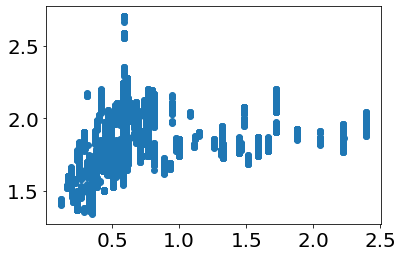

In [29]:
plt.scatter(max_mag_200_window, np.log10(10**(a_value_200_window)));

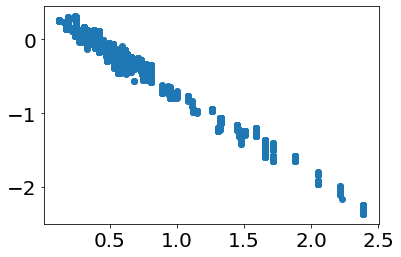

In [30]:
plt.scatter(max_mag_200_window, (AM_value_200_window));

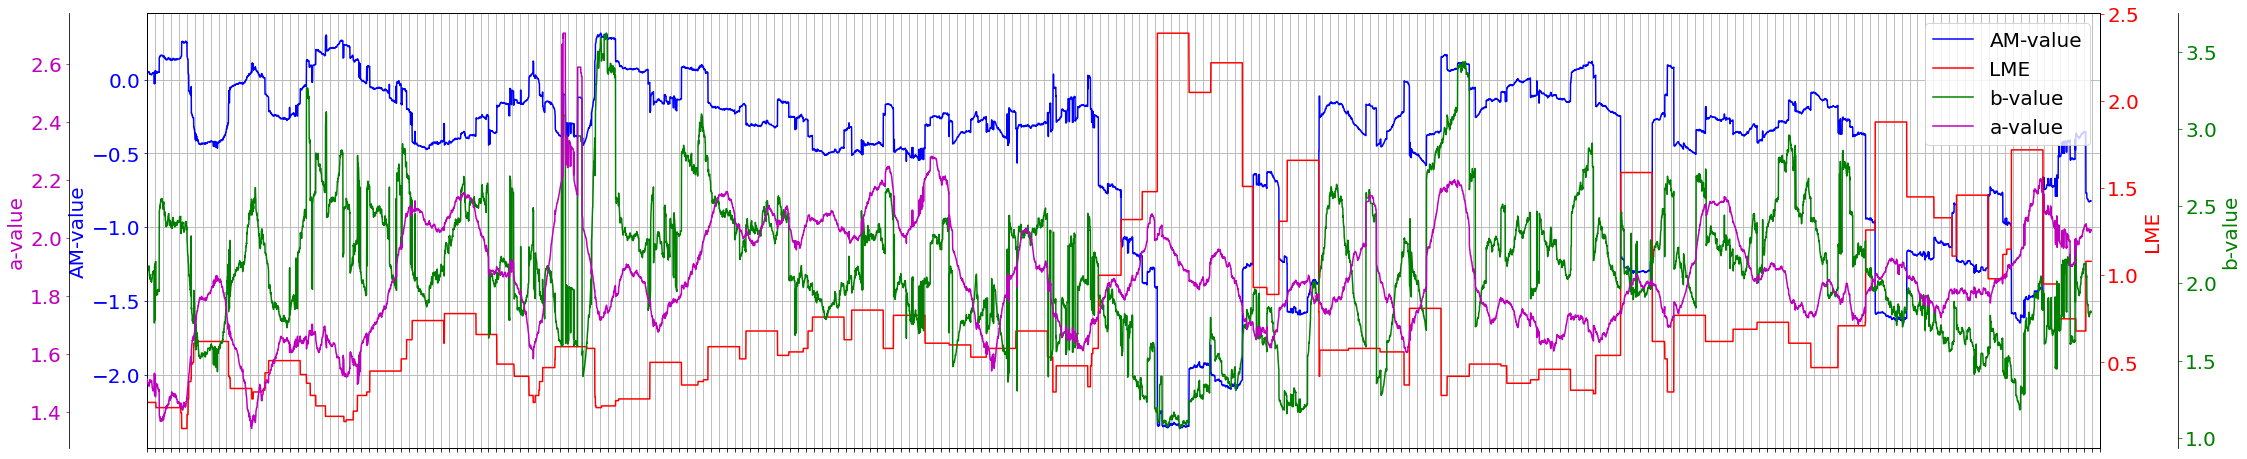

In [31]:
## Adding three axis
fig = plt.figure(figsize=(35,8)); ##dpi=100,
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx();
ax3 = ax1.twinx();
ax4 = ax1.twinx();

lns1 = ax1.plot(AM_value_200_window, 'b', label = 'AM-value');
lns2 = ax2.plot(max_mag_200_window, 'r', label = 'LME');
lns3 = ax3.plot(b_value_200_window, 'g', label = 'b-value');
lns4 = ax4.plot(a_value_200_window, 'm', label = 'a-value');
ax3.spines['right'].set_position(('axes', 1.04)); ## moving the third axis 4% to the right
ax4.spines['left'].set_position(('axes', -0.04)); ## moving the third axis 4% to the right
ax4.yaxis.set_label_position("left")
ax4.yaxis.tick_left()

ax1.set_ylabel('AM-value', color ='b');
ax1.tick_params(axis='y', colors='b');
ax2.set_ylabel('LME', color = 'r');
ax2.tick_params(axis='y', colors='r');
ax3.set_ylabel('b-value', color = 'g');
ax3.tick_params(axis='y', colors='g'); ### Changing the color of the axis tickets
ax4.set_ylabel('a-value', color = 'm');
ax4.tick_params(axis='y', colors='m'); ### Changing the color of the axis tickets

ax1.set_xticks(np.arange(0,12600, 50));
plt.setp(ax1.get_xticklabels(), rotation=270)
ax1.set_xlim(200, 12500);
ax1.set_xticklabels([]); ### only keeping the grid lines not the tickets
ax1.grid();

lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc='best');

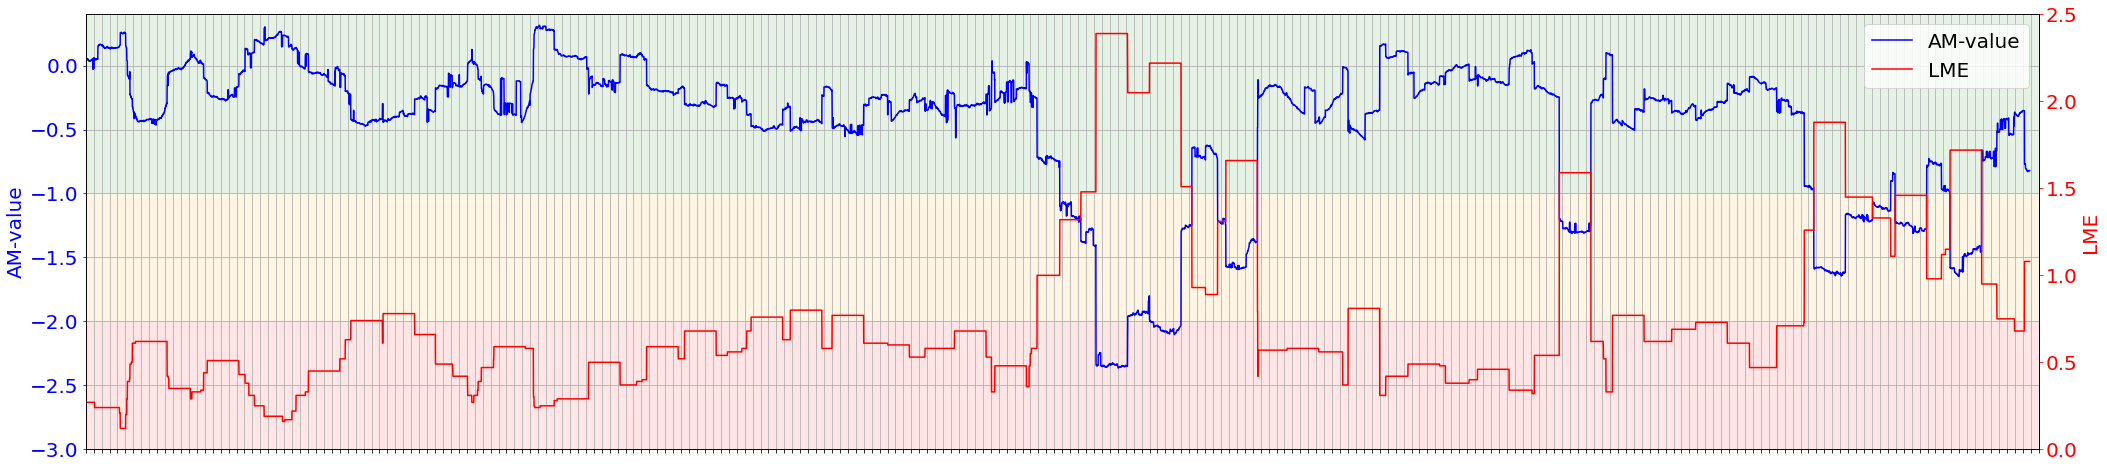

In [32]:
## Adding three axis
fig = plt.figure(figsize=(35,8)); ##dpi=100,
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx();
# ax3 = ax1.twinx();
# ax4 = ax1.twinx();

lns1 = ax1.plot(AM_value_200_window, 'b', label = 'AM-value');
lns2 = ax2.plot(max_mag_200_window, 'r', label = 'LME');
# lns3 = ax3.plot(b_value_200_window, 'g', label = 'b-value');
# lns4 = ax4.plot(a_value_200_window, 'm', label = 'a-value');
# ax3.spines['right'].set_position(('axes', 1.04)); ## moving the third axis 4% to the right
# ax4.spines['left'].set_position(('axes', -0.04)); ## moving the third axis 4% to the right
# ax4.yaxis.set_label_position("left")
# ax4.yaxis.tick_left()

ax1.set_ylabel('AM-value', color ='b');
ax1.tick_params(axis='y', colors='b');
ax2.set_ylabel('LME', color = 'r');
ax2.tick_params(axis='y', colors='r');
# ax3.set_ylabel('b-value', color = 'g');
# ax3.tick_params(axis='y', colors='g'); ### Changing the color of the axis tickets
# ax4.set_ylabel('a-value', color = 'm');
# ax4.tick_params(axis='y', colors='m'); ### Changing the color of the axis tickets

ax1.set_xticks(np.arange(0,12600, 50));
# plt.setp(ax1.get_xticklabels(), rotation=270)
ax1.set_xlim(200, 12500);
ax1.set_xticklabels([]); ### only keeping the grid lines not the tickets
ax1.grid();
ax1.axhspan(-1.0,0.5, alpha=0.1, color='green');  ax1.axhspan(-2,-1, alpha=0.1, color='orange');    ax1.axhspan(-7,-2, alpha=0.1, color='r'); ###green bcuz LME<1.0 and orange <1LME<2, red LME>2.0 
# ax2.axhspan(0,1, alpha=0.1, color='green');  ax2.axhspan(1,2, alpha=0.1, color='orange');    ax2.axhspan(2,3.5, alpha=0.1, color='r'); ###green bcuz LME<1.0 and orange <1LME<2, red LME>2.0 
ax1.set_ylim(-3,0.4)
ax2.set_ylim(0,2.5);
lns = lns1+lns2 #+lns3+lns4
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc='best');
save_results_to = 'D:/Phase_2_UBC/Papers/'
# plt.savefig(save_results_to + 'Colored_AM_value_LME_train.png',bbox_inches = "tight", dpi=100)

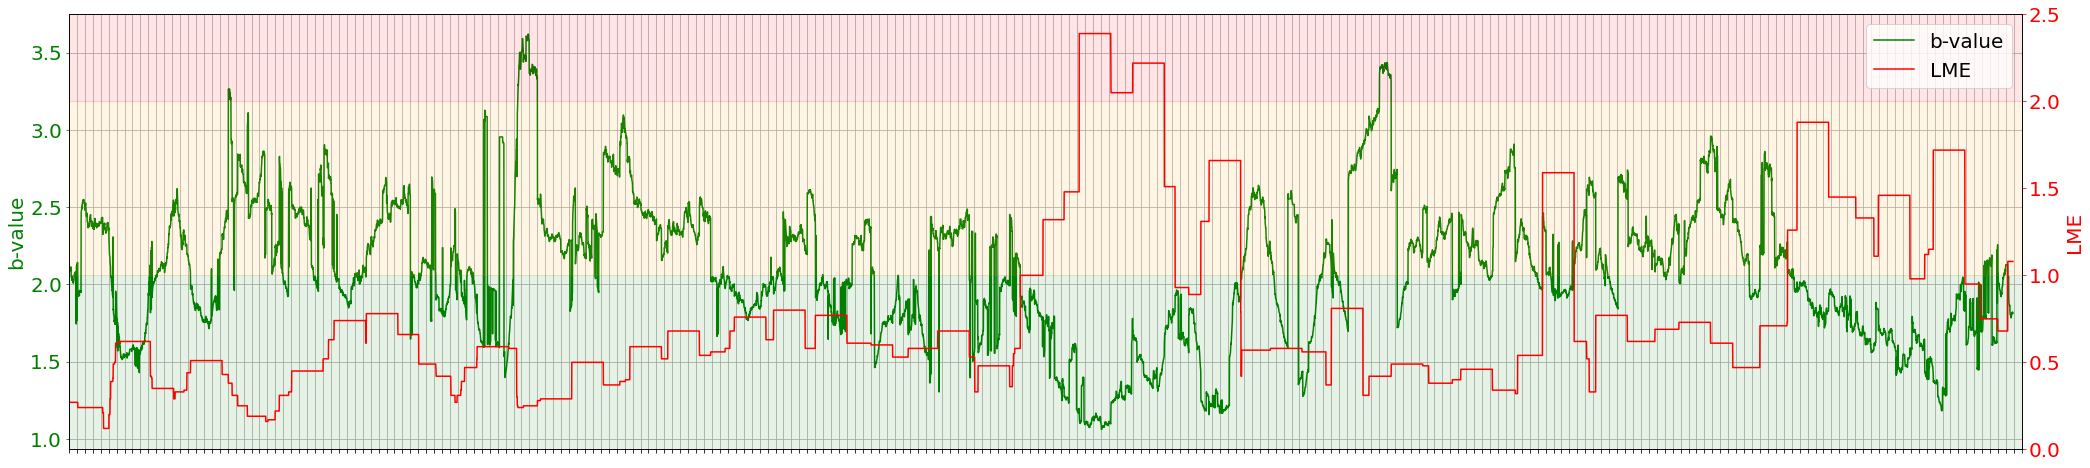

In [33]:
## Adding three axis
fig = plt.figure(figsize=(35,8)); ##dpi=100,
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx();
# ax3 = ax1.twinx();
# ax4 = ax1.twinx();

# lns1 = ax1.plot(AM_value_200_window, 'b', label = 'AM-value');
lns2 = ax2.plot(max_mag_200_window, 'r', label = 'LME');
lns1 = ax1.plot(b_value_200_window, 'g', label = 'b-value');
# lns4 = ax4.plot(a_value_200_window, 'm', label = 'a-value');
# ax3.spines['right'].set_position(('axes', 1.04)); ## moving the third axis 4% to the right
# ax4.spines['left'].set_position(('axes', -0.04)); ## moving the third axis 4% to the right
# ax4.yaxis.set_label_position("left")
# ax4.yaxis.tick_left()

ax1.set_ylabel('b-value', color ='g');
ax1.tick_params(axis='y', colors='g');
ax2.set_ylabel('LME', color = 'r');
ax2.tick_params(axis='y', colors='r');
# ax3.set_ylabel('b-value', color = 'g');
# ax3.tick_params(axis='y', colors='g'); ### Changing the color of the axis tickets
# ax4.set_ylabel('a-value', color = 'm');
# ax4.tick_params(axis='y', colors='m'); ### Changing the color of the axis tickets

ax1.set_xticks(np.arange(0,12600, 50));
plt.setp(ax1.get_xticklabels(), rotation=270)
ax1.set_xlim(200, 12500);
ax1.set_xticklabels([]); ### only keeping the grid lines not the tickets
ax1.grid();
ax2.axhspan(0,1, alpha=0.1, color='green');  ax2.axhspan(1,2, alpha=0.1, color='orange');    ax2.axhspan(2,3.5, alpha=0.1, color='r'); ###green bcuz LME<1.0 and orange <1LME<2, red LME>2.0 
# ax2.set_ylim(0,3.5);
ax2.set_ylim(0,2.5);
lns = lns1+lns2 #+lns3+lns4
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc='best');
save_results_to = 'D:/Phase_2_UBC/Papers/'
# plt.savefig(save_results_to + 'Colored_b_value_LME_train.png',bbox_inches = "tight", dpi=100)

### new differential area feature

In [36]:
import time

t0 = time.time()
mag_cat = df_train["Magnitude Mw"]
b_value_200_window = np.zeros(len(mag_cat)) + np.inf 
b_error_200_window = np.zeros(len(mag_cat)) + np.inf 
AM_value_200_window = np.zeros(len(mag_cat)) + np.inf 

cut_mag_200_window = np.zeros(len(mag_cat)) + np.inf 
a_value_200_window = np.zeros(len(mag_cat)) + np.inf

mag_range_200_window = np.zeros(len(mag_cat)) + np.inf 
max_mag_200_window = np.zeros(len(mag_cat)) + np.inf 
GR_area_200_window = np.zeros(len(mag_cat)) + np.inf
FMD_area_200_window = np.zeros(len(mag_cat)) + np.inf
diff_area_200_window = np.zeros(len(mag_cat)) + np.inf

mbin = 0.1
for i in range(200,len(mag_cat+1)):
    b_value_200_window[i-1] = computeGR_parm(mag_cat[i-200: i-1], mbin)[0][0][0] 
    b_error_200_window[i-1] = computeGR_parm(mag_cat[i-200: i-1], mbin)[0][2][0]
    cut_mag_200_window[i-1] = computeGR_parm(mag_cat[i-200: i-1], mbin)[0][3][0]
    a_value_200_window[i-1] = computeGR_parm(mag_cat[i-200: i-1], mbin)[0][1][0]
    mag_range_200_window[i-1] = computeGR_parm(mag_cat[i-200: i-1], mbin)[0][5][0]
    max_mag_200_window[i-1] = computeGR_parm(mag_cat[i-200: i-1], mbin)[0][4][0] 
    AM_value_200_window [i-1] = np.log10(computeGR_parm(mag_cat[i-200: i-1], mbin)[0][0][0]/10**(computeGR_parm(mag_cat[i-200: i-1], mbin)[0][4][0]))
    GR_area_200_window[i-1] = (b_value_200_window[i-1]/2)*((a_value_200_window[i-1]/b_value_200_window[i-1])-cut_mag_200_window[i-1])**2
    event_no = fmd_test(mag_cat[i-200: i-1][(mag_cat[i-200: i-1] > cut_mag_200_window[i-1])|(mag_cat[i-200: i-1] == cut_mag_200_window[i-1])], mbin)[2]
    FMD_area_200_window[i-1] =  (np.log10(event_no[event_no!=0])).sum()*mbin
    diff_area_200_window [i-1] = GR_area_200_window[i-1] - FMD_area_200_window[i-1]


t1 = time.time()

total = t1-t0
print(total)

37.13970685005188


## 2. Time difference between two consecutive events, $\delta t$ in hours `train`

In [37]:
time_diff_train = pd.to_datetime(df_train['Date'].astype(str)).diff(1).dt.total_seconds()
time_diff_train[0]=0
time_days_train = time_diff_train/(60*60*24) 

modifications to a method of a datetimelike object are not supported and are discarded. Change values on the original.


In [38]:
time_days_train.iloc[-1]

0.0005439814814814814

## 3. Calculating the fractal dimension, $D_C$
- Here are the steps to be taken for calculation of fractal dimension of earthquake hypocenters (maybe it is better to go with the epicenter because at the field when they are focusing on the induced seismicity location they might get the epicenter more accurate and quick):
    - For each 200 moving window, the NND (or clustering) will be performed.
    - First the time difference between each event in the window with the event j will be calculated as `tau`.
    - If `tau` is positive those events will be used to calculate the distance between them using the Northing and Easting in the dataset.
    - Then we have to compare the Euclidean distance between each pair with the R values. 
    - The R values are an array of different R values.
        - Side note: In the case of an infinite fractal distribution, the resulting plot of log C(r) against log r will be a straight line whose gradient is the fractal dimension. In practice, however, for large values of r the gradient is artificially low, whereas for small values of r the gradient is artificially high. These two conditions have been called ‘saturation’ and ‘depopulation’ (Nerenberg & Essex 1990). Whereas it is common for an estimate of the fractal dimension to be made by fitting a straight line to a subjectively chosen straight part of the curve, Nerenberg & Essex (1990) provide formulae for determining the distances of depopulation and saturation, rn and rs: $r_{n} = 2R (\frac {1}{N})^{1/d}$, $r_{s} = \frac {R}{d+1}$. Where d is the dimensionality of the data cluster (in case of hypocenters d = 3, and in case of epicenters d = 2), and 2R is the approximate length of the side of the hypercube containing the whole data. In this [paper](https://academic.oup.com/gji/article/139/2/317/553036?login=true): In practice, the values used were rn = 0.08 km and rs=0.45 km.
        
This step is necessary for the calculation of the next parameter NND.


Specifying an R vector, this is going to be the radius of our investigation sphere and the slope of the straight line portion of this would be the D value. The radius would be in km. The time for the NND analysis also has to be in days.


- To calculate the bounds of the radius of our sphere investigation we need to calculate both $r_n$ and $r_s$. Since we selected a windows of 200 events, we now only focus on the right assumption of R in 2R (2R is the approximate length of the side of the hypercube containing the whole data), and d the dimension here since we use hypocenters we go with $d = 2$. But for the largest cube to fit to all the hypocenter data, we can calculate the difference between the min and max value (range) of `Easting` and `Northing`. We should put R in km and the time in days. 


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


31.030597925186157


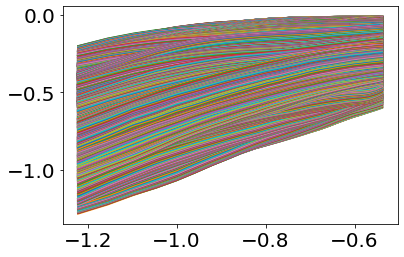

In [39]:
import numpy as np
import pandas as pd
import time
t0 = time.time()


###===converting the northing and easting to km
df_train['X'] = df_train['Easting (m)']/1000
df_train['Y'] = df_train['Northing (m)']/1000
####Let's try to see how different would it be in m
# df_train['X'] = df_train['Easting (m)']
# df_train['Y'] = df_train['Northing (m)']
####====creating upper and lower bound for the diameter of the investigation circles    
x_range =max(df_train['X']) - min(df_train['X']) 
y_range = max(df_train['Y']) - min(df_train['Y'])
R = max(x_range,y_range)/20
d = 2
N = 200 #### Number of points in each window
# r2 = 2*R*(1/N)**(1/d)  
# r1 = (R)/(1+d)
r_test = np.arange(0.06, 0.30, 0.01) ## The radius were selected after examining the values based on the paper (i.e, rn, rs) and then looking at the figures for the first data points and these numbers are similar to that for the Geysers
# r_test = np.arange(0.06*1000, 0.30*1000, 0.01*1000)
S_wind = np.zeros(len(df_train['X'])) + np.inf

for ii in range (200,len(df_train['X'])+1):
    c_10 = np.zeros(len(r_test)) +np.inf
    H = 0
    C = 0
    points = np.hstack((np.asarray(df_train['X'])[ii-N:ii-1, None], np.asarray(df_train['Y'])[ii-N:ii-1, None]))
    differences = np.subtract(points[None, :, :],  points[:, None, :]) # broadcast to 10x10x2
    squared_distances = (differences * differences).sum(axis=2)
    sqrt_distance = np.sqrt(squared_distances)
    within_range = sqrt_distance[None,:,:] < (r_test)[:, None, None]  # compare squares
    c_10 = within_range.sum(axis=(1,2)) / (N**2)

    S_wind[ii-1] = np.polyfit(np.log10(r_test), np.log10(c_10), 1)[0]
    plt.plot(np.log10(r_test), np.log10(c_10))

        
D_value_200 = S_wind        
t1 = time.time()

print(t1-t0)


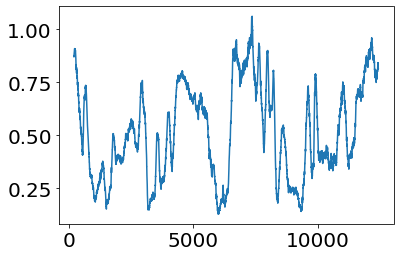

In [41]:
plt.plot(D_value_200);

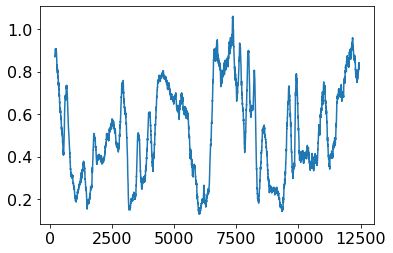

In [23]:
plt.plot(D_value_200);

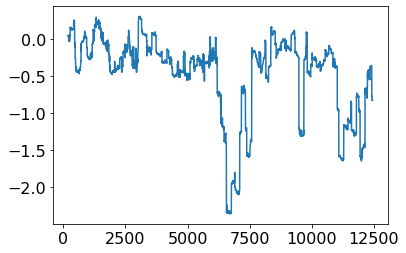

In [24]:
plt.plot(AM_value_200_window);

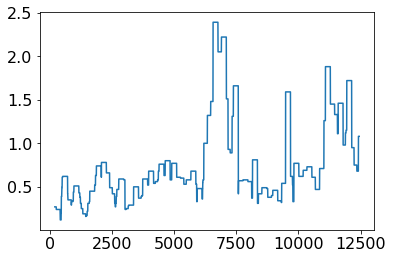

In [25]:
plt.plot(max_mag_200_window);

- Changing the values to days and meters did not change the value of DC and since we are dealing with only one pad I will focus on the m and hour time

## 4. Calculating the generalized distance $\eta$

- First we have to calculate the b-value for each event. This would not be possible for the first 199 events therefore the b-value is calculated for the 200th event. [this paper for Western HF IS](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2020JB020606)

- The NND method is a statistical approach to earthquake cluster identification and classification, first formulated by Baiesi and Paczuski (2004) and expanded significantly by Zaliapin et al. (2008) and Zaliapin and Ben‐Zion (2013a, 2013b, 2015, 2016). Its purpose is to link together and characterize event families or sequences using a rescaled interevent distance metric termed the NND η, which is defined below as space, time, and magnitude dependent [source](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2020JB020606).


        

$$log \eta_{ij} = log R_{ij} + log T_{ij}$$ <br> $T_{ij} = t_{ij} \times 10^{-bq(M_{i})}$, and $t_{ij}$ earthquake intercurrence, b/w the parent event, $M_{i}$ and $M_{j}$ offspring event, (i<j), __Note__: I could play with this rescaled time maybe instead of $q=0.5$, I could use another number as long as $q+p = 1$ <br> $R_{ij} = (r_{ij})^{D_{C}} \times 10^{-bp(M_{i})}$, $r_{ij}$ earthquake distance, b/w the parent event, $M_{i}$ and $M_{j}$ offspring event, (i<j)

To calculate the generalized distance for each window and each event, we will be using the calculated **b-value** and **D-value** up to that event (offspring event `j`), but we calculate everything for all the magnitudes in that window and if the value is positive then we find the minimum to go as the value of `eta_ij[j]`, the minimum is coming from [this](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.101.018501#fulltext) and [this](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2020JB020606) papers where this clustering algorithm has been used. 
- Maybe if could consider using different clustering algorithms and use them as the features in ML and the predictive models to see which one is the best one.

## The actual code to calculate $\eta$
- the values are pretty small, it is because the scaled time and distance are in days and km respectively.

In [42]:
import time

t0 = time.time()
df_train['X'] = df_train['Easting (m)']/1000
df_train['Y'] = df_train['Northing (m)']/1000
####Let's try to see how different would it be in m
# df_train['X'] = df_train['Easting (m)']
# df_train['Y'] = df_train['Northing (m)']

eta_ij = np.zeros(len(df_train["Magnitude Mw"])) + np.inf
N = 200
for ii in range (200,len(df_train['X'])+1):

    time_diff_200 = np.hstack((np.asarray(pd.to_datetime(df_train['Date'][ii-N:ii-1].astype(str)))))[None,:] - np.hstack((np.asarray(pd.to_datetime(df_train['Date'][ii-N:ii-1].astype(str)))))[:, None]
    time_diff_200_ns = time_diff_200 / np.timedelta64(1, 'ns')
    time_diff_200_days = time_diff_200_ns/ ((10**9) * 60*60*24) ### modified to days we convert the ns to days
    points = np.hstack((np.asarray(df_train['X'])[ii-N:ii-1, None], np.asarray(df_train['Y'])[ii-N:ii-1, None]))
    differences = np.subtract(points[None, :, :],  points[:, None, :]) # broadcast to 10x10x2
    squared_distances = (differences * differences).sum(axis=2)
    sqrt_distance = np.sqrt(squared_distances)
    aaa = (time_diff_200_days[:,-1] * ( sqrt_distance [:, -1] ** ( D_value_200[ii-1] )) * 10 ** (-1 * b_value_200_window [ii-1]* df_train["Magnitude Mw"][ii-N: ii-1]))
    bbb = aaa[aaa>0]
    eta_ij [ii-1] = min(bbb) 
t1 = time.time()

total = t1-t0

print(total)    


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


53.662121295928955


In [27]:
np.log10(eta_ij[12443])

-5.103496787384321

In [28]:
df_train.shape

(12444, 14)

- Changing the values from days to hours and m to km change the order of the numbers by a lot therefore we keep the value of km and days instead. For consistency we consider all the time and distance in days and km respectively.  

## 5. Calculating the total duration of each window, $\Delta T$ in days

In [43]:
total_time_diff_sec = pd.to_datetime(df_train['Date'].astype(str)).diff(199).dt.total_seconds()
total_time_diff_days_200 = total_time_diff_sec/(24*60*60)

In [44]:
# (np.asarray(pd.to_datetime(dates['Date'].astype(str)))[200] - np.asarray(pd.to_datetime(dates['Date'].astype(str)))[1])/np.timedelta64(1, 'ns')/(10**9)

In [45]:
Delta_T_duration_200 = total_time_diff_days_200*eta_ij
Delta_T_duration_200.iloc[199]

0.018750052301785444

In [32]:
# Delta_T_duration_200[0:200]

## 6. Moment release, $M_o$, $\frac {N.m} {day}$

- Not quiet sure why but I am going to use the $\Delta T$ suggested in [this paper](https://www.mdpi.com/2571-9394/3/1/2/htm) for the moment release.

In [46]:
Moment_release_normal = 10**((df_train["Magnitude Mw"] + 6)*3/2)/total_time_diff_days_200

In [47]:
Moment_release_paper = 10**((df_train["Magnitude Mw"] + 6)*3/2)/Delta_T_duration_200

In [48]:
Moment_release_paper.iloc[200]

933302406410.7129

In [49]:
Moment_release_normal.iloc[200]

315388031.5567223

I will probably use the `Moment_release_normal` as well as the `total_time_diff_days_200`, as I see a better logic for it and it may not make a difference once used in the ML analysis and being scaled

## 7. Shannon Entropy $H_{ent}$


The procedure consists of the following steps:
- The radiated seismic energy  for each seismic event is calculated using the relation between the seismic energy and the moment magnitude MW of [(Hanks and Kanamori 1979](https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1029/JB084iB05p02348) and [UBC notes)](https://www.eoas.ubc.ca/courses/eosc256/feb1_2012_magnitude):
    - $M_{W} = \frac {2}{3} log M_{o} - 6 $, the last terms has an accurate value of 6.07.
    - $M_{o} = A \mu d$, A is area ($m^2$), $\mu$ is shear modulus ($Pascals = N/m^2$), and d is displacement ($m$).
    - $M_{W} = \frac {2}{3} log E - 3.2$ or $log_{10}^{E} = 4.8 + 1.5 M_{W}$

- For each cell, the radiated seismic energy of all events included in the cell within a temporal interval is summed up (i.e., $e_k$) and is then divided by the total seismic energy E (i.e.,  $E_R$) radiated within the entire grid.

- The temporal variation of entropy is performed using a temporal window with a fixed number of 200 events and with one event shift. The calculated values of the Shannon entropy are associated to the time of the last event of the moving window. __Next sentece is for the natural earthquakes calculated in [this](https://www.sciencedirect.com/science/article/pii/S0031920117301206#s0015)__ The analyzed data cover the period from about 3–4 years before the mainshock to 1 year later, including the aftershock sequences.


The Shannon entropy is normalized to allow comparison between time intervals with different seismic energy and to ensure unity total probability.

The normalized entropy is $h = \frac {H_{ent}}{H_{e}}$  where $H_{e}$ is the equipartition entropy corresponding to the radiated seismic energy uniformly distributed in the cells. $H_{e}$ is calculated using $H_{ent} = -\Sigma_{k=1}^{m} \frac {e_{k}} {E_{R}} [ln \frac {e_{k}} {E_{R}}]$ with $e_{k} = \frac {E_R}{m} $ (m is the number of grids) .

The values h = 1 and h = 0 correspond, respectively, to total disorder and extreme concentration. The Shannon entropy quantifies the uncertainty about the state of a system that is also related to its predictability. A system is characterized by the lowest level of predictability when h = 1 and all states are equiprobable. As the order increases, the Shannon entropy decreases and the system has the highest predictability when h = 0.

In [37]:
M_W = -1
10**((M_W + 3.2)*(1.5))

1995.262314968881

In [38]:
10**(1.5*M_W+4.8)

1995.2623149688789

In [39]:
# fig = plt.figure(figsize=(15, 13))
# ax_0 = fig.add_subplot(131, title='imshow: square bins')
# plt.imshow(H, interpolation='nearest', origin='lower',
#         extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]]);

In [40]:
# plt.imshow(H, interpolation='nearest', origin='lower',
#         extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]]);

In [50]:
import math
import time

t0 = time.time()

### I use meters here since it only shannon entropy and I am not using the values of coordinate for nothing more than the gridding

df_train['X'] = df_train['Easting (m)']
df_train['Y'] = df_train['Northing (m)']




data =  df_train[['X','Y', 'Magnitude Mw']].to_numpy()

min_range = min(df_train['X'].min(), df_train['Y'].min()) - 1000
max_range = max(df_train['X'].max(), df_train['Y'].max()) + 1000
# # We divide the coordinate space up into 20 bins.

cells = 21
binsize = (math.ceil(max_range) - math.floor(min_range)) // cells

N = 200

h_shan = np.zeros(len(df_train['X'])) + np.inf
for ii in range (N,len(df_train['X'])+1):
    

    bins = np.zeros((cells,cells))
    counts = np.zeros((cells,cells))
    # print(math.ceil(max_range))
    for row in data[ii-N:ii-1]:
        binx = (row[0] - min_range) // binsize
        biny = (row[1] - min_range) // binsize
        #####To debug if the range is enough
        #     if binx > (cells-1) or biny > (cells-1) :
        #         print(binx, biny)
        #         print(row)

        bins[int(biny),int(binx)] += 10**(row[2]*1.5 + 4.8)
        counts[int(biny),int(binx)] += 1
    ############## Here we calculate the Shannon Entropy

    e_k = bins/np.sum(bins) #### e_k = e_k/E_R as in the formula
    H_ent = -1 * np.nansum(e_k * np.log(e_k)) 

    ### This entropy is used for normalizing the calculated entropy by dividing the whole seismic radiated energy by the number of cells therefore it just depends on the number of cells
    m_cells = cells * cells
    H_e = -1 * m_cells * (1/m_cells) * np.log(1/m_cells) #### Since it is all the energy radiated equally at all the cells it could be just divided by 1/m and we can call it e_k

    h_shan[ii-1] = H_ent / H_e


t1 = time.time()

total = t1-t0

print(total)    


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
divide by zero encountered in log
invalid value encountered in multiply


7.790993928909302


In [51]:
h_shan[199]

0.19829566456030243

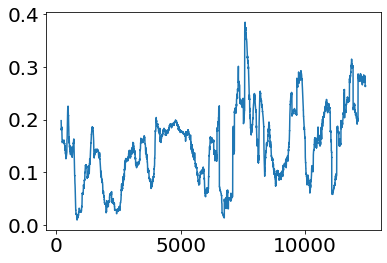

In [52]:
plt.plot(h_shan);

The next step is to merge all the calculated features into one `DataFrame` and then preprocess them for the ML analysis.

In [ ]:
# import time

# t0 = time.time()
# mag_cat = df_train["Magnitude Mw"]
# b_value_200_window = np.zeros(len(mag_cat)) + np.inf 
# b_error_200_window = np.zeros(len(mag_cat)) + np.inf 
# AM_value_200_window = np.zeros(len(mag_cat)) + np.inf 

# cut_mag_200_window = np.zeros(len(mag_cat)) + np.inf 
# a_value_200_window = np.zeros(len(mag_cat)) + np.inf

# mag_range_200_window = np.zeros(len(mag_cat)) + np.inf 
# max_mag_200_window = np.zeros(len(mag_cat)) + np.inf 
# GR_area_200_window = np.zeros(len(mag_cat)) + np.inf
# FMD_area_200_window = np.zeros(len(mag_cat)) + np.inf
# diff_area_200_window = np.zeros(len(mag_cat)) + np.inf

# mbin = 0.1
# for i in range(200,len(mag_cat+1)):
#     b_value_200_window[i-1] = computeGR_parm(mag_cat[i-200: i-1], mbin)[0][0][0] 
#     b_error_200_window[i-1] = computeGR_parm(mag_cat[i-200: i-1], mbin)[0][2][0]
#     cut_mag_200_window[i-1] = computeGR_parm(mag_cat[i-200: i-1], mbin)[0][3][0]
#     a_value_200_window[i-1] = computeGR_parm(mag_cat[i-200: i-1], mbin)[0][1][0]
#     mag_range_200_window[i-1] = computeGR_parm(mag_cat[i-200: i-1], mbin)[0][5][0]
#     max_mag_200_window[i-1] = computeGR_parm(mag_cat[i-200: i-1], mbin)[0][4][0] 
#     AM_value_200_window [i-1] = np.log10(computeGR_parm(mag_cat[i-200: i-1], mbin)[0][0][0]/10**(computeGR_parm(mag_cat[i-200: i-1], mbin)[0][4][0]))
#     GR_area_200_window[i-1] = (b_value_200_window[i-1]/2)*((a_value_200_window[i-1]/b_value_200_window[i-1])-cut_mag_200_window[i-1])**2
#     event_no = fmd_test(mag_cat[i-200: i-1][(mag_cat[i-200: i-1] > cut_mag_200_window[i-1])|(mag_cat[i-200: i-1] == cut_mag_200_window[i-1])], mbin)[2]
#     FMD_area_200_window[i-1] =  (np.log10(event_no[event_no!=0])).sum()*mbin
#     diff_area_200_window [i-1] = GR_area_200_window[i-1] - FMD_area_200_window[i-1]


# t1 = time.time()

# total = t1-t0
# print(total)

In [54]:
print(type(b_value_200_window))
print(type(b_error_200_window))
print(type(AM_value_200_window))

print(type(cut_mag_200_window))
print(type(a_value_200_window))

print(type(mag_range_200_window))
print(type(max_mag_200_window))

print(type(GR_area_200_window))
print(type(FMD_area_200_window))
print(type(diff_area_200_window))

print(type(time_days_train))

print(type(Delta_T_duration_200))

print(type(D_value_200))

print(type(h_shan))

print(type(Moment_release_paper))


print(type(eta_ij))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [103]:
df_final_train = pd.concat([pd.Series(b_value_200_window), 
           pd.Series(b_error_200_window),pd.Series(AM_value_200_window),pd.Series(cut_mag_200_window), 
           pd.Series(a_value_200_window),pd.Series(mag_range_200_window),
           pd.Series(max_mag_200_window),time_days_train,Delta_T_duration_200,
           pd.Series(D_value_200),pd.Series(h_shan),Moment_release_paper,
           pd.Series(eta_ij), pd.Series(GR_area_200_window), pd.Series(FMD_area_200_window), pd.Series(diff_area_200_window)], axis = 1)

In [104]:
df_final_train.columns = ['b-value','b-value-error','AM-value','cut-off-mag',
                          'a-value', 'mag_range','max_mag', 'delta_t_days', 'total_duration_days', 'D-value','Shannon-Entropy', 'moment_rate', 'eta',
                          'GR_area', 'FDM_area', 'diff_area']

In [105]:
df_final_train.tail()

b-value  b-value-error  AM-value  cut-off-mag   a-value  mag_range  \
12439  1.816865       0.135630 -0.820677        -0.02  2.020568        1.1   
12440  1.816865       0.135630 -0.820677        -0.02  2.020568        1.1   
12441  1.820112       0.134965 -0.819902        -0.02  2.024296        1.1   
12442  1.820020       0.133783 -0.819924        -0.02  2.028058        1.1   
12443       inf            inf       inf          inf       inf        inf   

       max_mag  delta_t_days  total_duration_days   D-value  Shannon-Entropy  \
12439     1.08      0.000174             0.000006  0.822716         0.264257   
12440     1.08      0.001042             0.000003  0.818130         0.264085   
12441     1.08      0.000313             0.000019  0.811636         0.264142   
12442     1.08      0.000104             0.000011  0.813377         0.263679   
12443      inf      0.000544                  inf  0.813648         0.263851   

        moment_rate       eta   GR_area  FDM_area  diff_area  
12439  1.457979e+14  0.000031  1.164329  1.405784  -0.241455  
12440  5.610431e+14  0.000014  1.164329  1.405784  -0.241455  
12441  9.326334e+13  0.000102  1.166543  1.407110  -0.240567  
12442  3.027077e+13  0.000061  1.170862  1.409266  -0.238403  
12443  0.000000e+00       inf       inf       inf        inf

In [106]:
# df_final_train['AM-value']

## Creating the target value
- The target value is the next magnitude of earthquake.

In [107]:
# df_train['Magnitude Mw']

We shift the maximum magnitude one upwards to be predicting the next event.

In [108]:
def lag_df(df, lag, cols):
    return df.assign(**{f"{col}-{n}": df[col].shift(-n) for n in range(1, lag +1) for col in cols})

In [109]:
df_train_mod = lag_df(df_all , 1, ['Magnitude Mw'])[df_all['Date'] <= point_spl]

In [110]:
df_final_train.head(200)

b-value  b-value-error  AM-value  cut-off-mag   a-value  mag_range  \
0         inf            inf       inf          inf       inf        inf   
1         inf            inf       inf          inf       inf        inf   
2         inf            inf       inf          inf       inf        inf   
3         inf            inf       inf          inf       inf        inf   
4         inf            inf       inf          inf       inf        inf   
..        ...            ...       ...          ...       ...        ...   
195       inf            inf       inf          inf       inf        inf   
196       inf            inf       inf          inf       inf        inf   
197       inf            inf       inf          inf       inf        inf   
198       inf            inf       inf          inf       inf        inf   
199  2.084741       0.107813  0.049052    -0.296842  1.512696       0.56   

     max_mag  delta_t_days  total_duration_days   D-value  Shannon-Entropy  \
0        inf      0.000000                  NaN       inf              inf   
1        inf      1.015868                  NaN       inf              inf   
2        inf      0.105440                  NaN       inf              inf   
3        inf      0.149097                  NaN       inf              inf   
4        inf      0.042199                  NaN       inf              inf   
..       ...           ...                  ...       ...              ...   
195      inf      0.004063                  NaN       inf              inf   
196      inf      0.005914                  NaN       inf              inf   
197      inf      0.000949                  NaN       inf              inf   
198      inf      0.009398                  NaN       inf              inf   
199     0.27      0.000625              0.01875  0.872958         0.198296   

      moment_rate       eta  GR_area  FDM_area  diff_area  
0             NaN       inf      inf       inf        inf  
1             NaN       inf      inf       inf        inf  
2             NaN       inf      inf       inf        inf  
3             NaN       inf      inf       inf        inf  
4             NaN       inf      inf       inf        inf  
..            ...       ...      ...       ...        ...  
195           NaN       inf      inf       inf        inf  
196           NaN       inf      inf       inf        inf  
197           NaN       inf      inf       inf        inf  
198           NaN       inf      inf       inf        inf  
199  5.272268e+09  0.005638  1.08969  1.035956   0.053734  

[200 rows x 16 columns]

In [61]:
df_final_train = pd.concat ([df_final_train, df_train_mod['Magnitude Mw-1']], axis = 1)

In [125]:
df_class = np.zeros(len(df_train_mod['Magnitude Mw-1']))
df_class[(df_train_mod['Magnitude Mw-1']>1.0)|(df_train_mod['Magnitude Mw-1']==1)
                                                                                  &(df_train_mod['Magnitude Mw-1']<8)]=1;
df_target_class = pd.Series(df_class, name = 'target')

In [126]:
df_final_train_class = pd.concat ([df_final_train, df_target_class], axis = 1)

In [127]:
# df_final_train= df_final_train.drop([12443]);
df_final_train_class.tail()

b-value  b-value-error  AM-value  cut-off-mag   a-value  mag_range  \
12439  1.816865       0.135630 -0.820677        -0.02  2.020568        1.1   
12440  1.816865       0.135630 -0.820677        -0.02  2.020568        1.1   
12441  1.820112       0.134965 -0.819902        -0.02  2.024296        1.1   
12442  1.820020       0.133783 -0.819924        -0.02  2.028058        1.1   
12443       inf            inf       inf          inf       inf        inf   

       max_mag  delta_t_days  total_duration_days   D-value  Shannon-Entropy  \
12439     1.08      0.000174             0.000006  0.822716         0.264257   
12440     1.08      0.001042             0.000003  0.818130         0.264085   
12441     1.08      0.000313             0.000019  0.811636         0.264142   
12442     1.08      0.000104             0.000011  0.813377         0.263679   
12443      inf      0.000544                  inf  0.813648         0.263851   

        moment_rate       eta   GR_area  FDM_area  diff_area  target  
12439  1.457979e+14  0.000031  1.164329  1.405784  -0.241455     0.0  
12440  5.610431e+14  0.000014  1.164329  1.405784  -0.241455     0.0  
12441  9.326334e+13  0.000102  1.166543  1.407110  -0.240567     0.0  
12442  3.027077e+13  0.000061  1.170862  1.409266  -0.238403     0.0  
12443  0.000000e+00       inf       inf       inf        inf     0.0

In [62]:
# del df_final_train['Magnitude Mw-1']

In [128]:
df_final_train_class= df_final_train_class.drop([12443]);
df_final_train_class.tail()

b-value  b-value-error  AM-value  cut-off-mag   a-value  mag_range  \
12438  1.816865       0.135630 -0.820677        -0.02  2.020568        1.1   
12439  1.816865       0.135630 -0.820677        -0.02  2.020568        1.1   
12440  1.816865       0.135630 -0.820677        -0.02  2.020568        1.1   
12441  1.820112       0.134965 -0.819902        -0.02  2.024296        1.1   
12442  1.820020       0.133783 -0.819924        -0.02  2.028058        1.1   

       max_mag  delta_t_days  total_duration_days   D-value  Shannon-Entropy  \
12438     1.08      0.000324             0.000011  0.828490         0.264706   
12439     1.08      0.000174             0.000006  0.822716         0.264257   
12440     1.08      0.001042             0.000003  0.818130         0.264085   
12441     1.08      0.000313             0.000019  0.811636         0.264142   
12442     1.08      0.000104             0.000011  0.813377         0.263679   

        moment_rate       eta   GR_area  FDM_area  diff_area  target  
12438  3.473857e+13  0.000056  1.164329  1.405784  -0.241455     0.0  
12439  1.457979e+14  0.000031  1.164329  1.405784  -0.241455     0.0  
12440  5.610431e+14  0.000014  1.164329  1.405784  -0.241455     0.0  
12441  9.326334e+13  0.000102  1.166543  1.407110  -0.240567     0.0  
12442  3.027077e+13  0.000061  1.170862  1.409266  -0.238403     0.0

In [67]:
df_final_train= df_final_train.drop([12443]);
df_final_train.tail()

b-value  b-value-error  AM-value  cut-off-mag   a-value  mag_range  \
12438  1.816865       0.135630 -0.820677        -0.02  2.020568        1.1   
12439  1.816865       0.135630 -0.820677        -0.02  2.020568        1.1   
12440  1.816865       0.135630 -0.820677        -0.02  2.020568        1.1   
12441  1.820112       0.134965 -0.819902        -0.02  2.024296        1.1   
12442  1.820020       0.133783 -0.819924        -0.02  2.028058        1.1   

       max_mag  delta_t_days  total_duration_days   D-value  Shannon-Entropy  \
12438     1.08      0.000324             0.000011  0.828490         0.264706   
12439     1.08      0.000174             0.000006  0.822716         0.264257   
12440     1.08      0.001042             0.000003  0.818130         0.264085   
12441     1.08      0.000313             0.000019  0.811636         0.264142   
12442     1.08      0.000104             0.000011  0.813377         0.263679   

        moment_rate       eta   GR_area  FDM_area  diff_area  Magnitude Mw-1  
12438  3.473857e+13  0.000056  1.164329  1.405784  -0.241455           -0.04  
12439  1.457979e+14  0.000031  1.164329  1.405784  -0.241455            0.12  
12440  5.610431e+14  0.000014  1.164329  1.405784  -0.241455            0.17  
12441  9.326334e+13  0.000102  1.166543  1.407110  -0.240567           -0.31  
12442  3.027077e+13  0.000061  1.170862  1.409266  -0.238403            0.31

In [65]:
#########don't run

b-value  b-value-error  AM-value  cut-off-mag   a-value  mag_range  \
12439  1.816865       0.135630 -0.820677        -0.02  2.020568        1.1   
12440  1.816865       0.135630 -0.820677        -0.02  2.020568        1.1   
12441  1.820112       0.134965 -0.819902        -0.02  2.024296        1.1   
12442  1.820020       0.133783 -0.819924        -0.02  2.028058        1.1   
12443       inf            inf       inf          inf       inf        inf   

       max_mag  delta_t_days  total_duration_days   D-value  Shannon-Entropy  \
12439     1.08      0.000174             0.000006  0.822716         0.264257   
12440     1.08      0.001042             0.000003  0.818130         0.264085   
12441     1.08      0.000313             0.000019  0.811636         0.264142   
12442     1.08      0.000104             0.000011  0.813377         0.263679   
12443      inf      0.000544                  inf  0.813648         0.263851   

        moment_rate       eta   GR_area  FDM_area  diff_area  Magnitude Mw-1  
12439  1.457979e+14  0.000031  1.164329  1.405784  -0.241455            0.12  
12440  5.610431e+14  0.000014  1.164329  1.405784  -0.241455            0.17  
12441  9.326334e+13  0.000102  1.166543  1.407110  -0.240567           -0.31  
12442  3.027077e+13  0.000061  1.170862  1.409266  -0.238403            0.31  
12443  0.000000e+00       inf       inf       inf        inf           -0.15

In [56]:
# df_all['Magnitude Mw'][df_all['Date'] <= point_spl]

- Since the last row has a `Nan` value which is actually the earthquake magnitude in the test data set.
- Now what I can do to get around this problem is to lag the original dataset before splitting and then split to train and test. 
    - Therefore, I will shift the magnitudes by one for the original `DataFrame` (i.e., `df_all`), and then cut it at the training and then merging it back to the training. 

In [73]:
# large_numer_features = [ 'moment_rate', 'eta'] ### These features should be scaled

drop_features = ['b-value-error', 'Magnitude Mw-1']

numeric_features = ['b-value','AM-value', 'cut-off-mag','a-value', 'mag_range','max_mag', 'delta_t_days', 'total_duration_days', 'D-value','Shannon-Entropy',
                    'moment_rate', 'eta',
                   'GR_area', 'FDM_area', 'diff_area']


In [101]:
#### ===== setting the target value ======#####
y_train = df_final_train ['Magnitude Mw-1'][df_final_train ['Magnitude Mw-1']>0.0][199:]


##########========== creating pipelines and columntransformer to transform the data
pipe_num = Pipeline([('num', StandardScaler())])

preprocessor = ColumnTransformer([('num', pipe_num, numeric_features)])


- Fitting on the training dataset, remember this fit has to only be on training and only be transformed on test dataset.

In [102]:
df_final_train.iloc[199:]

b-value  b-value-error  AM-value  cut-off-mag   a-value  mag_range  \
199    2.084741       0.107813  0.049052    -0.296842  1.512696       0.56   
200    2.085640       0.108735  0.049239    -0.296842  1.509108       0.56   
201    2.081028       0.108293  0.048278    -0.296842  1.510445       0.56   
202    2.108226       0.110005  0.053917    -0.296842  1.502558       0.56   
203    2.099063       0.109515  0.052025    -0.296842  1.501861       0.56   
...         ...            ...       ...          ...       ...        ...   
12438  1.816865       0.135630 -0.820677    -0.020000  2.020568       1.10   
12439  1.816865       0.135630 -0.820677    -0.020000  2.020568       1.10   
12440  1.816865       0.135630 -0.820677    -0.020000  2.020568       1.10   
12441  1.820112       0.134965 -0.819902    -0.020000  2.024296       1.10   
12442  1.820020       0.133783 -0.819924    -0.020000  2.028058       1.10   

       max_mag  delta_t_days  total_duration_days   D-value  Shannon-Entropy  \
199       0.27      0.000625             0.018750  0.872958         0.198296   
200       0.27      0.013507             0.000785  0.869251         0.193305   
201       0.27      0.000972             0.007987  0.872598         0.192958   
202       0.27      0.011088             0.000583  0.876182         0.183579   
203       0.27      0.017338             0.009447  0.877447         0.183071   
...        ...           ...                  ...       ...              ...   
12438     1.08      0.000324             0.000011  0.828490         0.264706   
12439     1.08      0.000174             0.000006  0.822716         0.264257   
12440     1.08      0.001042             0.000003  0.818130         0.264085   
12441     1.08      0.000313             0.000019  0.811636         0.264142   
12442     1.08      0.000104             0.000011  0.813377         0.263679   

        moment_rate       eta   GR_area  FDM_area  diff_area  Magnitude Mw-1  
199    5.272268e+09  0.005638  1.089690  1.035956   0.053734           -0.09  
200    9.333024e+11  0.000338  1.085828  1.034751   0.051077           -0.25  
201    5.279772e+10  0.003599  1.088202  1.035629   0.052574           -0.61  
202    2.087582e+11  0.000280  1.074351  1.026287   0.048065           -0.53  
203    1.697125e+10  0.004594  1.075580  1.025616   0.049964           -0.64  
...             ...       ...       ...       ...        ...             ...  
12438  3.473857e+13  0.000056  1.164329  1.405784  -0.241455           -0.04  
12439  1.457979e+14  0.000031  1.164329  1.405784  -0.241455            0.12  
12440  5.610431e+14  0.000014  1.164329  1.405784  -0.241455            0.17  
12441  9.326334e+13  0.000102  1.166543  1.407110  -0.240567           -0.31  
12442  3.027077e+13  0.000061  1.170862  1.409266  -0.238403            0.31  

[12244 rows x 17 columns]

In [76]:
X_train_enc = preprocessor.fit_transform(df_final_train.iloc[199:]) #### I started from 200 events since before that there are inf values

In [77]:
pd.DataFrame(data = X_train_enc, columns = numeric_features)

b-value  AM-value  cut-off-mag   a-value  mag_range   max_mag  \
0     -0.029128  0.916345    -1.561649 -1.852765  -0.651423 -1.026963   
1     -0.027115  0.916677    -1.561649 -1.871977  -0.651423 -1.026963   
2     -0.037438  0.914971    -1.561649 -1.864816  -0.651423 -1.026963   
3      0.023433  0.924974    -1.561649 -1.907039  -0.651423 -1.026963   
4      0.002926  0.921618    -1.561649 -1.910768  -0.651423 -1.026963   
...         ...       ...          ...       ...        ...       ...   
12239 -0.628652 -0.626259     0.920680  0.866015   0.391467  0.607032   
12240 -0.628652 -0.626259     0.920680  0.866015   0.391467  0.607032   
12241 -0.628652 -0.626259     0.920680  0.866015   0.391467  0.607032   
12242 -0.621386 -0.624884     0.920680  0.885972   0.391467  0.607032   
12243 -0.621590 -0.624922     0.920680  0.906111   0.391467  0.607032   

       delta_t_days  total_duration_days   D-value  Shannon-Entropy  \
0         -0.209161             3.022377  1.604515         0.685476   
1          1.691142             0.015459  1.587728         0.615072   
2         -0.157940             1.220885  1.602885         0.610178   
3          1.334301            -0.018454  1.619115         0.477862   
4          2.256281             1.465225  1.624842         0.470708   
...             ...                  ...       ...              ...   
12239     -0.253553            -0.114195  1.403153         1.622330   
12240     -0.275748            -0.114965  1.377007         1.615994   
12241     -0.147696            -0.115514  1.356239         1.613566   
12242     -0.255260            -0.112737  1.326832         1.614369   
12243     -0.285993            -0.114070  1.334717         1.607834   

       moment_rate       eta   GR_area  FDM_area  diff_area  
0        -0.068473  2.105264 -0.063676 -0.334168   0.715696  
1        -0.068433 -0.100745 -0.075774 -0.337414   0.697357  
2        -0.068471  1.256795 -0.068336 -0.335050   0.707690  
3        -0.068465 -0.124883 -0.111723 -0.360221   0.676569  
4        -0.068473  1.670987 -0.107875 -0.362028   0.689677  
...            ...       ...       ...       ...        ...  
12239    -0.066956 -0.218296  0.170125  0.662276  -1.321628  
12240    -0.062104 -0.228349  0.170125  0.662276  -1.321628  
12241    -0.043961 -0.235502  0.170125  0.662276  -1.321628  
12242    -0.064399 -0.198826  0.177058  0.665849  -1.315505  
12243    -0.067151 -0.216105  0.190590  0.671657  -1.300568  

[12244 rows x 15 columns]

In [78]:
ds = pd.DataFrame(data = X_train_enc, columns = numeric_features).isin([np.inf, -np.inf])
ds.value_counts()

b-value  AM-value  cut-off-mag  a-value  mag_range  max_mag  delta_t_days  total_duration_days  D-value  Shannon-Entropy  moment_rate  eta    GR_area  FDM_area  diff_area
False    False     False        False    False      False    False         False                False    False            False        False  False    False     False        12244
dtype: int64

In [79]:
# ds = pd.DataFrame(data = y_train).isin([np.inf, -np.inf])
# ds.value_counts()

In [80]:
# ds = pd.DataFrame(data = df_final_train.iloc[199:], columns = numeric_features).isin([np.inf, -np.inf])
# ds.value_counts()

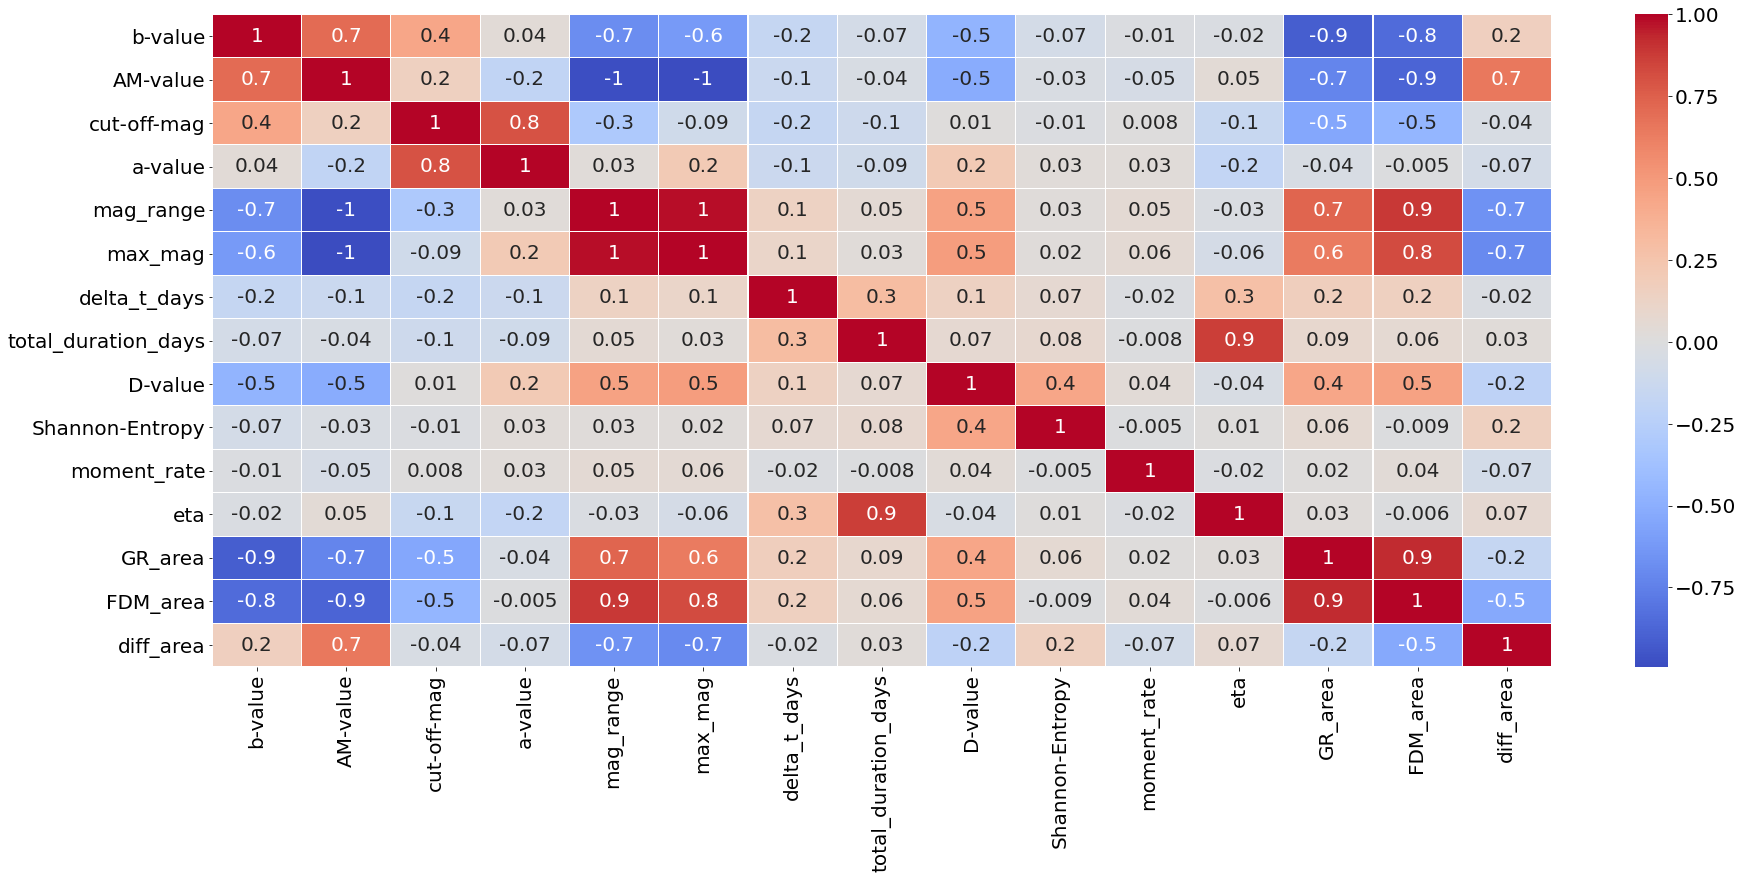

In [92]:
import seaborn as sns
f, ax = plt.subplots(1, figsize = (30,12) )
ax = sns.heatmap(pd.DataFrame(data = X_train_enc, columns = numeric_features).corr(),cmap='coolwarm', annot =True ,linewidths=0.1, fmt = '.1g');

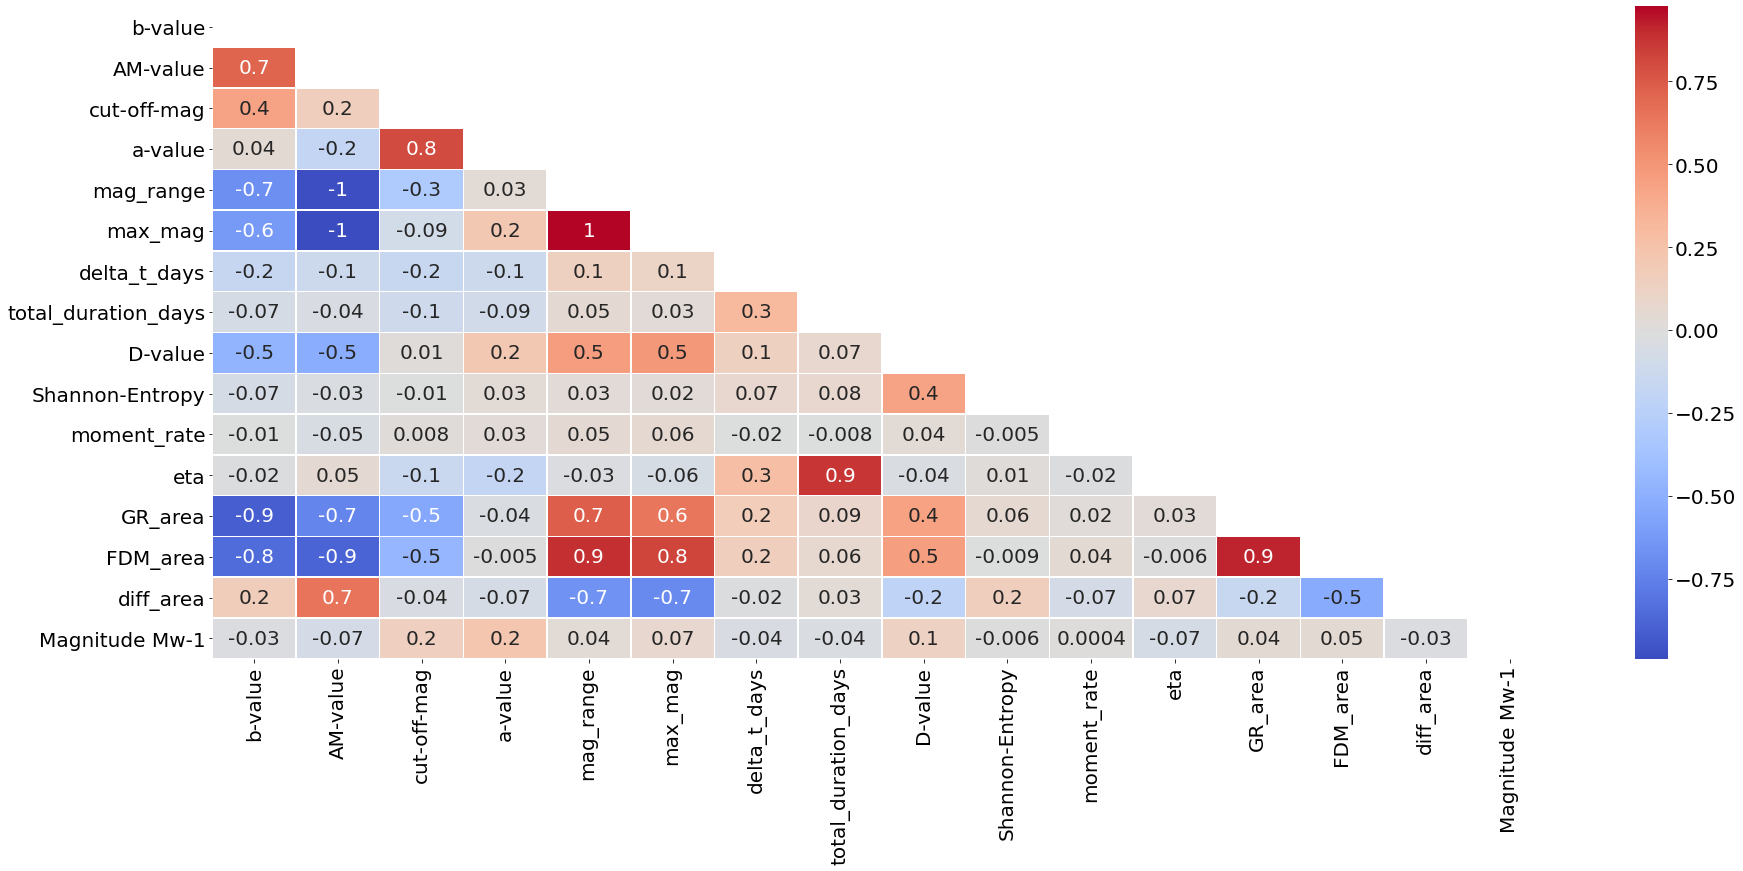

In [100]:
import seaborn as sns
f, ax = plt.subplots(1, figsize = (30,12) )
corr = pd.concat([pd.DataFrame(data = X_train_enc, columns = numeric_features), y_train], axis=1).corr()
mask = np.triu(np.ones_like(corr))
ax = sns.heatmap(corr, mask = mask, cmap='coolwarm', annot =True ,linewidths=.5, fmt='.1g');

## Creating class target

In [107]:
# df_train['Magnitude Mw']

We shift the maximum magnitude one upwards to be predicting the next event. And call the new target value a class. With 1 showing events with magnitude larger than or equal to Mw1.0, otherwise the class is zero for smaller magnitudes

In [108]:
def lag_df(df, lag, cols):
    return df.assign(**{f"{col}-{n}": df[col].shift(-n) for n in range(1, lag +1) for col in cols})

In [109]:
df_train_mod = lag_df(df_all , 1, ['Magnitude Mw'])[df_all['Date'] <= point_spl]

In [110]:
df_final_train.head(200)

b-value  b-value-error  AM-value  cut-off-mag   a-value  mag_range  \
0         inf            inf       inf          inf       inf        inf   
1         inf            inf       inf          inf       inf        inf   
2         inf            inf       inf          inf       inf        inf   
3         inf            inf       inf          inf       inf        inf   
4         inf            inf       inf          inf       inf        inf   
..        ...            ...       ...          ...       ...        ...   
195       inf            inf       inf          inf       inf        inf   
196       inf            inf       inf          inf       inf        inf   
197       inf            inf       inf          inf       inf        inf   
198       inf            inf       inf          inf       inf        inf   
199  2.084741       0.107813  0.049052    -0.296842  1.512696       0.56   

     max_mag  delta_t_days  total_duration_days   D-value  Shannon-Entropy  \
0        inf      0.000000                  NaN       inf              inf   
1        inf      1.015868                  NaN       inf              inf   
2        inf      0.105440                  NaN       inf              inf   
3        inf      0.149097                  NaN       inf              inf   
4        inf      0.042199                  NaN       inf              inf   
..       ...           ...                  ...       ...              ...   
195      inf      0.004063                  NaN       inf              inf   
196      inf      0.005914                  NaN       inf              inf   
197      inf      0.000949                  NaN       inf              inf   
198      inf      0.009398                  NaN       inf              inf   
199     0.27      0.000625              0.01875  0.872958         0.198296   

      moment_rate       eta  GR_area  FDM_area  diff_area  
0             NaN       inf      inf       inf        inf  
1             NaN       inf      inf       inf        inf  
2             NaN       inf      inf       inf        inf  
3             NaN       inf      inf       inf        inf  
4             NaN       inf      inf       inf        inf  
..            ...       ...      ...       ...        ...  
195           NaN       inf      inf       inf        inf  
196           NaN       inf      inf       inf        inf  
197           NaN       inf      inf       inf        inf  
198           NaN       inf      inf       inf        inf  
199  5.272268e+09  0.005638  1.08969  1.035956   0.053734  

[200 rows x 16 columns]

In [129]:
df_class = np.zeros(len(df_train_mod['Magnitude Mw-1']))
class_trigger = 1
df_class[(df_train_mod['Magnitude Mw-1']>class_trigger)|(df_train_mod['Magnitude Mw-1']==class_trigger)&(df_train_mod['Magnitude Mw-1']<8)]=1;
df_target_class = pd.Series(df_class, name = 'target')

In [130]:
df_final_train_class = pd.concat ([df_final_train, df_target_class], axis = 1)

In [131]:
# df_final_train= df_final_train.drop([12443]);
df_final_train_class.tail()

b-value  b-value-error  AM-value  cut-off-mag   a-value  mag_range  \
12439  1.816865       0.135630 -0.820677        -0.02  2.020568        1.1   
12440  1.816865       0.135630 -0.820677        -0.02  2.020568        1.1   
12441  1.820112       0.134965 -0.819902        -0.02  2.024296        1.1   
12442  1.820020       0.133783 -0.819924        -0.02  2.028058        1.1   
12443       inf            inf       inf          inf       inf        inf   

       max_mag  delta_t_days  total_duration_days   D-value  Shannon-Entropy  \
12439     1.08      0.000174             0.000006  0.822716         0.264257   
12440     1.08      0.001042             0.000003  0.818130         0.264085   
12441     1.08      0.000313             0.000019  0.811636         0.264142   
12442     1.08      0.000104             0.000011  0.813377         0.263679   
12443      inf      0.000544                  inf  0.813648         0.263851   

        moment_rate       eta   GR_area  FDM_area  diff_area  target  
12439  1.457979e+14  0.000031  1.164329  1.405784  -0.241455     0.0  
12440  5.610431e+14  0.000014  1.164329  1.405784  -0.241455     0.0  
12441  9.326334e+13  0.000102  1.166543  1.407110  -0.240567     0.0  
12442  3.027077e+13  0.000061  1.170862  1.409266  -0.238403     0.0  
12443  0.000000e+00       inf       inf       inf        inf     0.0

In [132]:
# del df_final_train['Magnitude Mw-1']

In [133]:
df_final_train_class= df_final_train_class.drop([12443]);
df_final_train_class.tail()

b-value  b-value-error  AM-value  cut-off-mag   a-value  mag_range  \
12438  1.816865       0.135630 -0.820677        -0.02  2.020568        1.1   
12439  1.816865       0.135630 -0.820677        -0.02  2.020568        1.1   
12440  1.816865       0.135630 -0.820677        -0.02  2.020568        1.1   
12441  1.820112       0.134965 -0.819902        -0.02  2.024296        1.1   
12442  1.820020       0.133783 -0.819924        -0.02  2.028058        1.1   

       max_mag  delta_t_days  total_duration_days   D-value  Shannon-Entropy  \
12438     1.08      0.000324             0.000011  0.828490         0.264706   
12439     1.08      0.000174             0.000006  0.822716         0.264257   
12440     1.08      0.001042             0.000003  0.818130         0.264085   
12441     1.08      0.000313             0.000019  0.811636         0.264142   
12442     1.08      0.000104             0.000011  0.813377         0.263679   

        moment_rate       eta   GR_area  FDM_area  diff_area  target  
12438  3.473857e+13  0.000056  1.164329  1.405784  -0.241455     0.0  
12439  1.457979e+14  0.000031  1.164329  1.405784  -0.241455     0.0  
12440  5.610431e+14  0.000014  1.164329  1.405784  -0.241455     0.0  
12441  9.326334e+13  0.000102  1.166543  1.407110  -0.240567     0.0  
12442  3.027077e+13  0.000061  1.170862  1.409266  -0.238403     0.0

- Since the last row has a `Nan` value which is actually the earthquake magnitude in the test data set.
- Now what I can do to get around this problem is to lag the original dataset before splitting and then split to train and test. 
    - Therefore, I will shift the magnitudes by one for the original `DataFrame` (i.e., `df_all`), and then cut it at the training and then merging it back to the training. 

In [134]:
# large_numer_features = [ 'moment_rate', 'eta'] ### These features should be scaled

drop_features = ['b-value-error', 'target']

numeric_features = ['b-value','AM-value', 'cut-off-mag','a-value', 'mag_range','max_mag', 'delta_t_days', 'total_duration_days', 'D-value','Shannon-Entropy',
                    'moment_rate', 'eta',
                   'GR_area', 'FDM_area', 'diff_area']


In [135]:
#### ===== setting the target value ======#####
y_train = df_final_train_class ['target'][199:]


##########========== creating pipelines and columntransformer to transform the data
pipe_num = Pipeline([('num', StandardScaler())])

preprocessor = ColumnTransformer([('num', pipe_num, numeric_features)])


- Fitting on the training dataset, remember this fit has to only be on training and only be transformed on test dataset.

In [136]:
df_final_train_class.iloc[199:]

b-value  b-value-error  AM-value  cut-off-mag   a-value  mag_range  \
199    2.084741       0.107813  0.049052    -0.296842  1.512696       0.56   
200    2.085640       0.108735  0.049239    -0.296842  1.509108       0.56   
201    2.081028       0.108293  0.048278    -0.296842  1.510445       0.56   
202    2.108226       0.110005  0.053917    -0.296842  1.502558       0.56   
203    2.099063       0.109515  0.052025    -0.296842  1.501861       0.56   
...         ...            ...       ...          ...       ...        ...   
12438  1.816865       0.135630 -0.820677    -0.020000  2.020568       1.10   
12439  1.816865       0.135630 -0.820677    -0.020000  2.020568       1.10   
12440  1.816865       0.135630 -0.820677    -0.020000  2.020568       1.10   
12441  1.820112       0.134965 -0.819902    -0.020000  2.024296       1.10   
12442  1.820020       0.133783 -0.819924    -0.020000  2.028058       1.10   

       max_mag  delta_t_days  total_duration_days   D-value  Shannon-Entropy  \
199       0.27      0.000625             0.018750  0.872958         0.198296   
200       0.27      0.013507             0.000785  0.869251         0.193305   
201       0.27      0.000972             0.007987  0.872598         0.192958   
202       0.27      0.011088             0.000583  0.876182         0.183579   
203       0.27      0.017338             0.009447  0.877447         0.183071   
...        ...           ...                  ...       ...              ...   
12438     1.08      0.000324             0.000011  0.828490         0.264706   
12439     1.08      0.000174             0.000006  0.822716         0.264257   
12440     1.08      0.001042             0.000003  0.818130         0.264085   
12441     1.08      0.000313             0.000019  0.811636         0.264142   
12442     1.08      0.000104             0.000011  0.813377         0.263679   

        moment_rate       eta   GR_area  FDM_area  diff_area  target  
199    5.272268e+09  0.005638  1.089690  1.035956   0.053734     0.0  
200    9.333024e+11  0.000338  1.085828  1.034751   0.051077     0.0  
201    5.279772e+10  0.003599  1.088202  1.035629   0.052574     0.0  
202    2.087582e+11  0.000280  1.074351  1.026287   0.048065     0.0  
203    1.697125e+10  0.004594  1.075580  1.025616   0.049964     0.0  
...             ...       ...       ...       ...        ...     ...  
12438  3.473857e+13  0.000056  1.164329  1.405784  -0.241455     0.0  
12439  1.457979e+14  0.000031  1.164329  1.405784  -0.241455     0.0  
12440  5.610431e+14  0.000014  1.164329  1.405784  -0.241455     0.0  
12441  9.326334e+13  0.000102  1.166543  1.407110  -0.240567     0.0  
12442  3.027077e+13  0.000061  1.170862  1.409266  -0.238403     0.0  

[12244 rows x 17 columns]

In [137]:
X_train_enc = preprocessor.fit_transform(df_final_train_class.iloc[199:]) #### I started from 200 events since before that there are inf values

In [138]:
pd.DataFrame(data = X_train_enc, columns = numeric_features)

b-value  AM-value  cut-off-mag   a-value  mag_range   max_mag  \
0     -0.029128  0.916345    -1.561649 -1.852765  -0.651423 -1.026963   
1     -0.027115  0.916677    -1.561649 -1.871977  -0.651423 -1.026963   
2     -0.037438  0.914971    -1.561649 -1.864816  -0.651423 -1.026963   
3      0.023433  0.924974    -1.561649 -1.907039  -0.651423 -1.026963   
4      0.002926  0.921618    -1.561649 -1.910768  -0.651423 -1.026963   
...         ...       ...          ...       ...        ...       ...   
12239 -0.628652 -0.626259     0.920680  0.866015   0.391467  0.607032   
12240 -0.628652 -0.626259     0.920680  0.866015   0.391467  0.607032   
12241 -0.628652 -0.626259     0.920680  0.866015   0.391467  0.607032   
12242 -0.621386 -0.624884     0.920680  0.885972   0.391467  0.607032   
12243 -0.621590 -0.624922     0.920680  0.906111   0.391467  0.607032   

       delta_t_days  total_duration_days   D-value  Shannon-Entropy  \
0         -0.209161             3.022377  1.604515         0.685476   
1          1.691142             0.015459  1.587728         0.615072   
2         -0.157940             1.220885  1.602885         0.610178   
3          1.334301            -0.018454  1.619115         0.477862   
4          2.256281             1.465225  1.624842         0.470708   
...             ...                  ...       ...              ...   
12239     -0.253553            -0.114195  1.403153         1.622330   
12240     -0.275748            -0.114965  1.377007         1.615994   
12241     -0.147696            -0.115514  1.356239         1.613566   
12242     -0.255260            -0.112737  1.326832         1.614369   
12243     -0.285993            -0.114070  1.334717         1.607834   

       moment_rate       eta   GR_area  FDM_area  diff_area  
0        -0.068473  2.105264 -0.063676 -0.334168   0.715696  
1        -0.068433 -0.100745 -0.075774 -0.337414   0.697357  
2        -0.068471  1.256795 -0.068336 -0.335050   0.707690  
3        -0.068465 -0.124883 -0.111723 -0.360221   0.676569  
4        -0.068473  1.670987 -0.107875 -0.362028   0.689677  
...            ...       ...       ...       ...        ...  
12239    -0.066956 -0.218296  0.170125  0.662276  -1.321628  
12240    -0.062104 -0.228349  0.170125  0.662276  -1.321628  
12241    -0.043961 -0.235502  0.170125  0.662276  -1.321628  
12242    -0.064399 -0.198826  0.177058  0.665849  -1.315505  
12243    -0.067151 -0.216105  0.190590  0.671657  -1.300568  

[12244 rows x 15 columns]

In [139]:
ds = pd.DataFrame(data = X_train_enc, columns = numeric_features).isin([np.inf, -np.inf])
ds.value_counts()

b-value  AM-value  cut-off-mag  a-value  mag_range  max_mag  delta_t_days  total_duration_days  D-value  Shannon-Entropy  moment_rate  eta    GR_area  FDM_area  diff_area
False    False     False        False    False      False    False         False                False    False            False        False  False    False     False        12244
dtype: int64

In [140]:
# ds = pd.DataFrame(data = y_train).isin([np.inf, -np.inf])
# ds.value_counts()

In [141]:
# ds = pd.DataFrame(data = df_final_train.iloc[199:], columns = numeric_features).isin([np.inf, -np.inf])
# ds.value_counts()

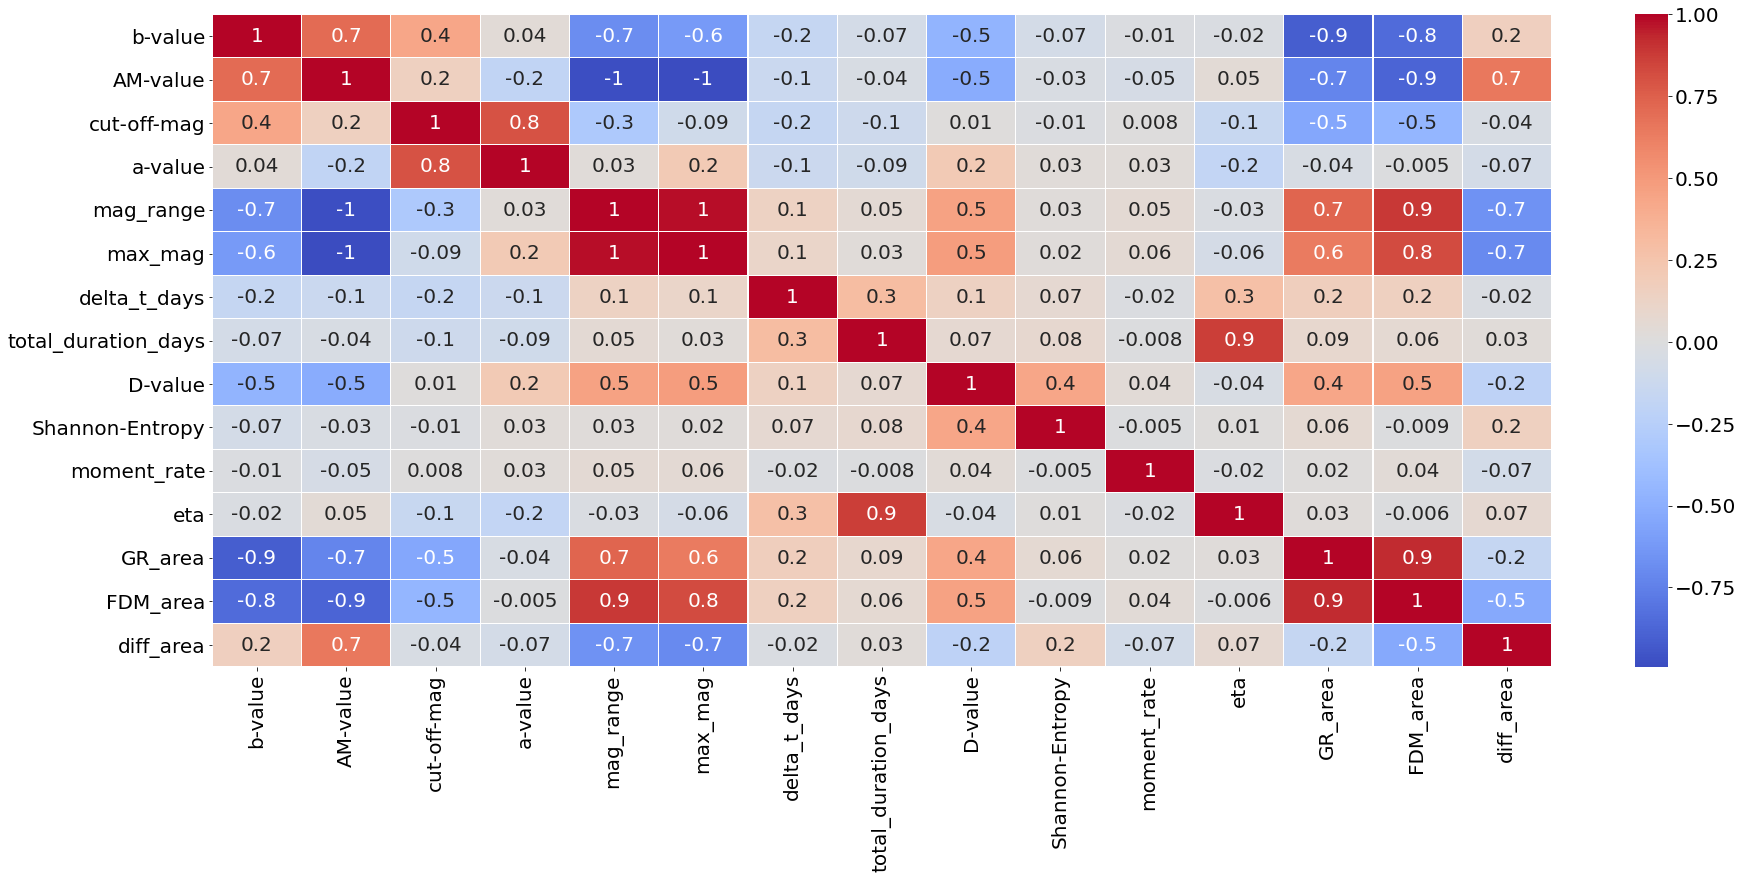

In [142]:
import seaborn as sns
f, ax = plt.subplots(1, figsize = (30,12) )
ax = sns.heatmap(pd.DataFrame(data = X_train_enc, columns = numeric_features).corr(),cmap='coolwarm', annot =True ,linewidths=0.1, fmt = '.1g');

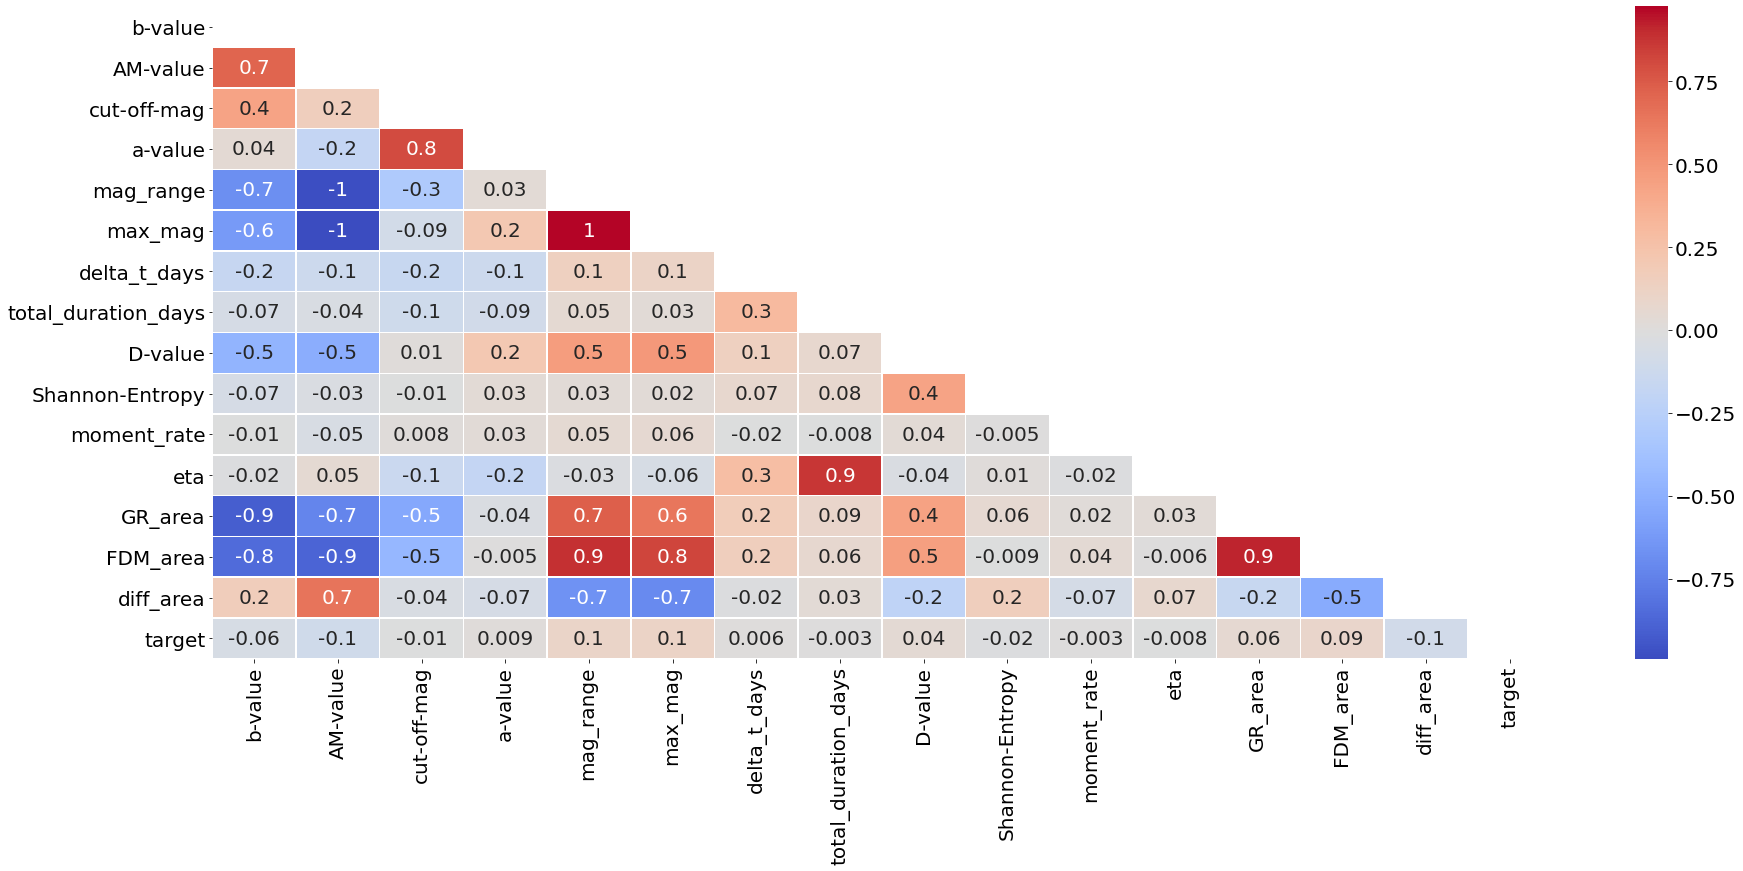

In [143]:
import seaborn as sns
f, ax = plt.subplots(1, figsize = (30,12) )
corr = pd.concat([pd.DataFrame(data = X_train_enc, columns = numeric_features), y_train], axis=1).corr()
mask = np.triu(np.ones_like(corr))
ax = sns.heatmap(corr, mask = mask, cmap='coolwarm', annot =True ,linewidths=.5, fmt='.1g');

## Let's start with `DummyRegressor`

In [214]:
dummy = DummyRegressor()
dummy.fit(X_train_enc, 2**(y_train))
dummy.score(X_train_enc,2** (y_train))

0.0

In [216]:
mape(y_train, np.log2(dummy.predict(X_train_enc)))

inf

The scores are negative since we are dealing with a regression problem therefore the default metric is R squared.
- The default score is not good, therefore we have to get to use mean percentage absolute error.

In [217]:
from sklearn.model_selection import TimeSeriesSplit
# cv=ShuffleSplit()

- Looking into the distribution of the `y_train` vs. its logged value.

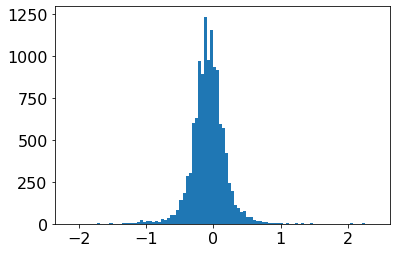

In [218]:
plt.hist(y_train, bins=100);

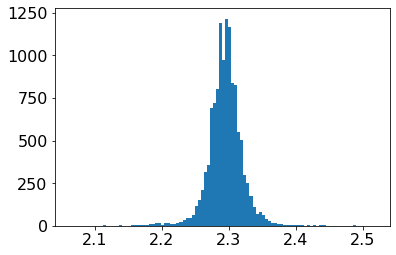

In [219]:
plt.hist(np.log(y_train+10), bins=100);

# Processing the `Test` dataset

## 1. First b-value, a-value, cut-off magnitude-Mc, Magnitude Range, Maximum magnitude calculations for every 200 events.

#### processing the `test` dataset.

In [108]:
import time

t0 = time.time()

b_value_200_window_t = np.zeros(len(df_test["Magnitude Mw"])) + np.inf 
b_error_200_window_t = np.zeros(len(df_test["Magnitude Mw"])) + np.inf 
AM_value_200_window_t = np.zeros(len(df_test["Magnitude Mw"])) + np.inf
cut_mag_200_window_t = np.zeros(len(df_test["Magnitude Mw"])) + np.inf 
a_value_200_window_t = np.zeros(len(df_test["Magnitude Mw"])) + np.inf

mag_range_200_window_t = np.zeros(len(df_test["Magnitude Mw"])) + np.inf 
max_mag_200_window_t = np.zeros(len(df_test["Magnitude Mw"])) + np.inf 

mbin = 0.1
for i in range(200,len(df_test["Magnitude Mw"])+1):
    b_value_200_window_t[i-1] = computeGR_parm(df_test["Magnitude Mw"][i-200: i-1], mbin)[0][0][0] 
    b_error_200_window_t[i-1] = computeGR_parm(df_test["Magnitude Mw"][i-200: i-1], mbin)[0][2][0]
    cut_mag_200_window_t[i-1] = computeGR_parm(df_test["Magnitude Mw"][i-200: i-1], mbin)[0][3][0]
    a_value_200_window_t[i-1] = computeGR_parm(df_test["Magnitude Mw"][i-200: i-1], mbin)[0][1][0]
    mag_range_200_window_t[i-1] = computeGR_parm(df_test["Magnitude Mw"][i-200: i-1], mbin)[0][5][0]
    max_mag_200_window_t[i-1] = computeGR_parm(df_test["Magnitude Mw"][i-200: i-1], mbin)[0][4][0]
    AM_value_200_window_t [i-1] = np.log10(b_value_200_window_t[i-1] / 10**(max_mag_200_window_t[i-1]))

t1 = time.time()

total = t1-t0
print(total)

9.734559059143066


divide by zero encountered in log10


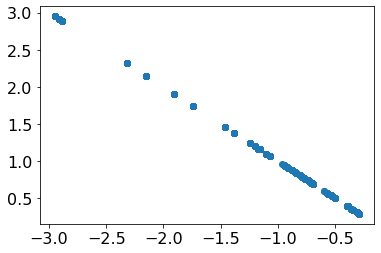

In [129]:
plt.scatter(np.log10(1/10**(max_mag_200_window_t)), max_mag_200_window_t);

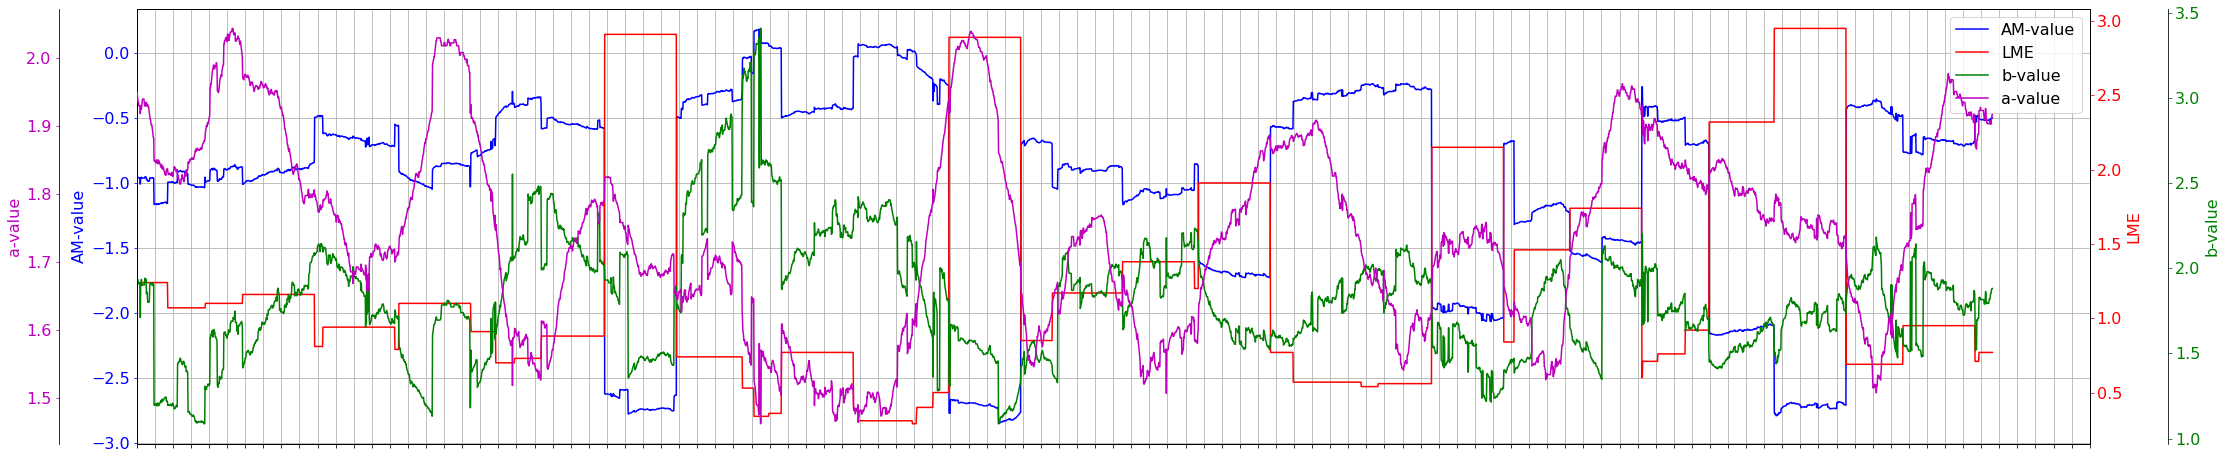

In [115]:
## Adding three axis
fig = plt.figure(figsize=(35,8)); ##dpi=100,
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx();
ax3 = ax1.twinx();
ax4 = ax1.twinx();

lns1 = ax1.plot(AM_value_200_window_t, 'b', label = 'AM-value');
lns2 = ax2.plot(max_mag_200_window_t, 'r', label = 'LME');
lns3 = ax3.plot(b_value_200_window_t, 'g', label = 'b-value');
lns4 = ax4.plot(a_value_200_window_t, 'm', label = 'a-value');
ax3.spines['right'].set_position(('axes', 1.04)); ## moving the third axis 4% to the right
ax4.spines['left'].set_position(('axes', -0.04)); ## moving the third axis 4% to the right
ax4.yaxis.set_label_position("left")
ax4.yaxis.tick_left()

ax1.set_ylabel('AM-value', color ='b');
ax1.tick_params(axis='y', colors='b');
ax2.set_ylabel('LME', color = 'r');
ax2.tick_params(axis='y', colors='r');
ax3.set_ylabel('b-value', color = 'g');
ax3.tick_params(axis='y', colors='g'); ### Changing the color of the axis tickets
ax4.set_ylabel('a-value', color = 'm');
ax4.tick_params(axis='y', colors='m'); ### Changing the color of the axis tickets

ax1.set_xticks(np.arange(0,12600, 50));
plt.setp(ax1.get_xticklabels(), rotation=270)
ax1.set_xlim(200, 5600);
ax1.set_xticklabels([]); ### only keeping the grid lines not the tickets
ax1.grid();

lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc='best');

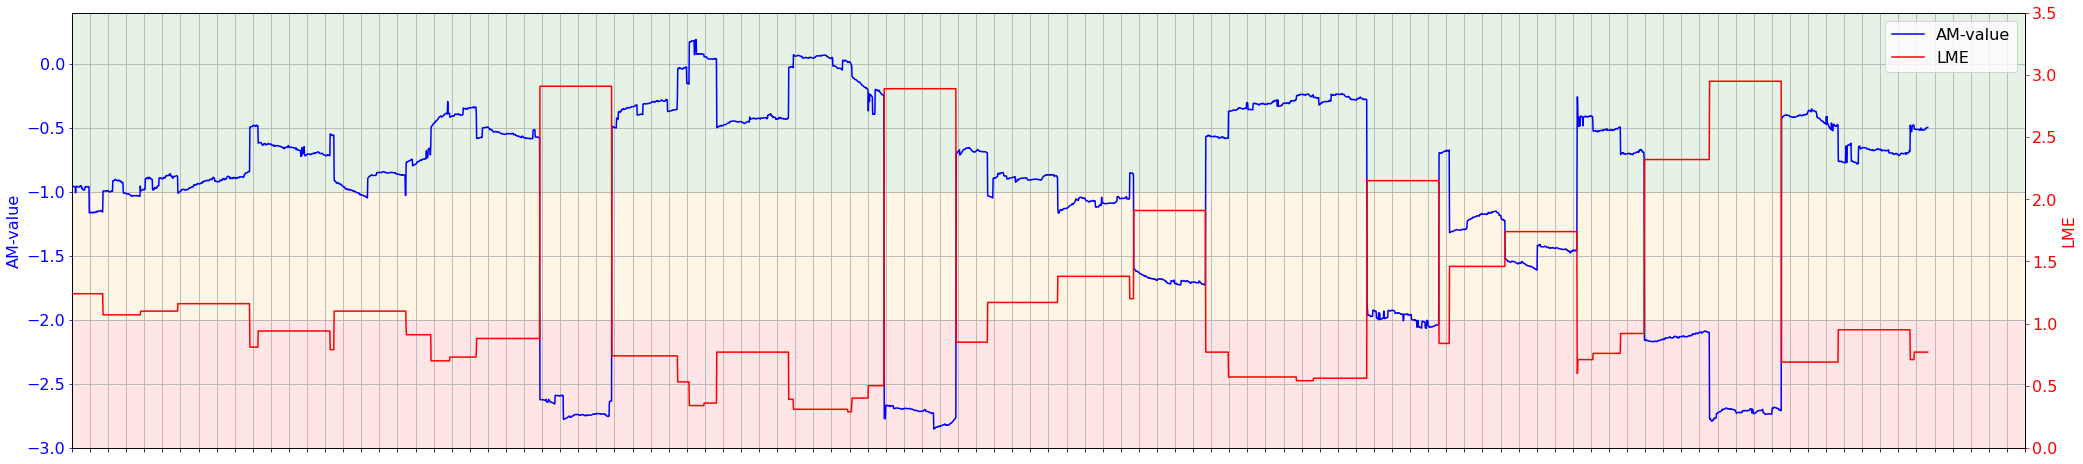

In [199]:
## Adding three axis
fig = plt.figure(figsize=(35,8)); ##dpi=100,
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx();
# ax3 = ax1.twinx();
# ax4 = ax1.twinx();

lns1 = ax1.plot(AM_value_200_window_t, 'b', label = 'AM-value');
lns2 = ax2.plot(max_mag_200_window_t, 'r', label = 'LME');
# lns3 = ax3.plot(b_value_200_window, 'g', label = 'b-value');
# lns4 = ax4.plot(a_value_200_window, 'm', label = 'a-value');
# ax3.spines['right'].set_position(('axes', 1.04)); ## moving the third axis 4% to the right
# ax4.spines['left'].set_position(('axes', -0.04)); ## moving the third axis 4% to the right
# ax4.yaxis.set_label_position("left")
# ax4.yaxis.tick_left()

ax1.set_ylabel('AM-value', color ='b');
ax1.tick_params(axis='y', colors='b');
ax2.set_ylabel('LME', color = 'r');
ax2.tick_params(axis='y', colors='r');
# ax3.set_ylabel('b-value', color = 'g');
# ax3.tick_params(axis='y', colors='g'); ### Changing the color of the axis tickets
# ax4.set_ylabel('a-value', color = 'm');
# ax4.tick_params(axis='y', colors='m'); ### Changing the color of the axis tickets

ax1.set_xticks(np.arange(0,12600, 50));
# plt.setp(ax1.get_xticklabels(), rotation=270)
ax1.set_xlim(200, 5600);
ax1.set_xticklabels([]); ### only keeping the grid lines not the tickets
ax1.grid();
ax1.axhspan(-1.0,0.5, alpha=0.1, color='green');  ax1.axhspan(-2,-1, alpha=0.1, color='orange');    ax1.axhspan(-7,-2, alpha=0.1, color='r'); ###green bcuz LME<1.0 and orange <1LME<2, red LME>2.0 
ax1.set_ylim(-3,0.4);
ax2.set_ylim(0,3.5);
lns = lns1+lns2 #+lns3+lns4
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc='best');
save_results_to = 'D:/Phase_2_UBC/Papers/'
# plt.savefig(save_results_to + 'Colored_AM_value_LME_test.png',bbox_inches = "tight", dpi=100)

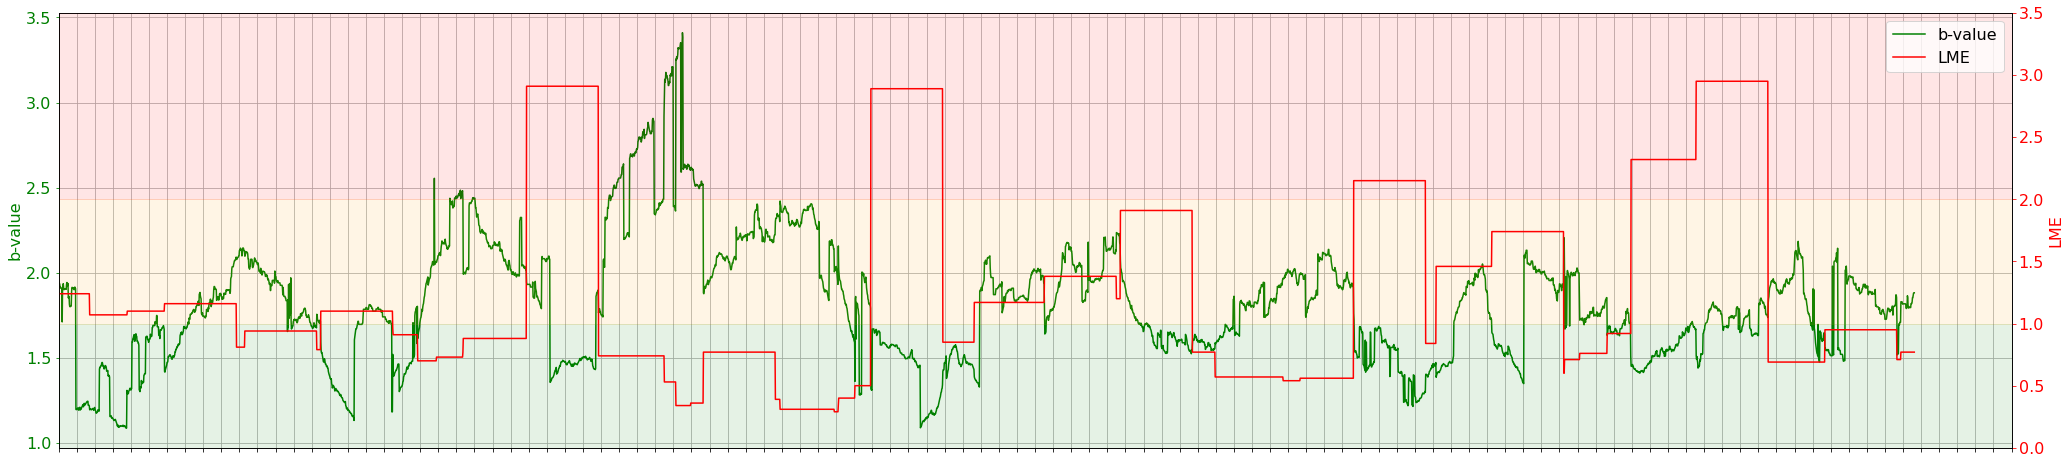

In [201]:
## Adding three axis
fig = plt.figure(figsize=(35,8)); ##dpi=100,
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx();
# ax3 = ax1.twinx();
# ax4 = ax1.twinx();

# lns1 = ax1.plot(AM_value_200_window, 'b', label = 'AM-value');
lns2 = ax2.plot(max_mag_200_window_t, 'r', label = 'LME');
lns1 = ax1.plot(b_value_200_window_t, 'g', label = 'b-value');
# lns4 = ax4.plot(a_value_200_window, 'm', label = 'a-value');
# ax3.spines['right'].set_position(('axes', 1.04)); ## moving the third axis 4% to the right
# ax4.spines['left'].set_position(('axes', -0.04)); ## moving the third axis 4% to the right
# ax4.yaxis.set_label_position("left")
# ax4.yaxis.tick_left()

ax1.set_ylabel('b-value', color ='g');
ax1.tick_params(axis='y', colors='g');
ax2.set_ylabel('LME', color = 'r');
ax2.tick_params(axis='y', colors='r');
# ax3.set_ylabel('b-value', color = 'g');
# ax3.tick_params(axis='y', colors='g'); ### Changing the color of the axis tickets
# ax4.set_ylabel('a-value', color = 'm');
# ax4.tick_params(axis='y', colors='m'); ### Changing the color of the axis tickets

ax1.set_xticks(np.arange(0,12600, 50));
plt.setp(ax1.get_xticklabels(), rotation=270)
ax1.set_xlim(200, 5600);
ax1.set_xticklabels([]); ### only keeping the grid lines not the tickets
ax1.grid();
ax2.axhspan(0,1, alpha=0.1, color='green');  ax2.axhspan(1,2, alpha=0.1, color='orange');    ax2.axhspan(2,3.5, alpha=0.1, color='r'); ###green bcuz LME<1.0 and orange <1LME<2, red LME>2.0 
ax2.set_ylim(0,3.5);
lns = lns1+lns2 #+lns3+lns4
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc='best');
save_results_to = 'D:/Phase_2_UBC/Papers/'
# plt.savefig(save_results_to + 'Colored_b_value_LME_test.png',bbox_inches = "tight", dpi=100)

## 2. Time difference between two consecutive events, $\delta t$ in hours `train`

In [382]:
time_diff_test = pd.to_datetime(df_test['Date'].astype(str)).diff(1).dt.total_seconds()
# time_diff_test[0]=0
time_days_test = time_diff_test/(60*60*24) 

In [383]:
time_days_test

12444         NaN
12445    0.000069
12446    0.004641
12447    0.000220
12448    0.000104
           ...   
17771    0.000417
17772    0.005764
17773    0.003287
17774    0.003333
17775    0.002604
Name: Date, Length: 5332, dtype: float64

## 3. Calculating the fractal dimension, $D_C$
- Here are the steps to be taken for calculation of fractal dimension of earthquake hypocenters (maybe it is better to go with the epicenter because at the field when they are focusing on the induced seismicity location they might get the epicenter more accurate and quick):
    - For each 200 moving window, the NND (or clustering) will be performed.
    - First the time difference between each event in the window with the event j will be calculated as `tau`.
    - If `tau` is positive those events will be used to calculate the distance between them using the Northing and Easting in the dataset.
    - Then we have to compare the Euclidean distance between each pair with the R values. 
    - The R values are an array of different R values.
        - Side note: In the case of an infinite fractal distribution, the resulting plot of log C(r) against log r will be a straight line whose gradient is the fractal dimension. In practice, however, for large values of r the gradient is artificially low, whereas for small values of r the gradient is artificially high. These two conditions have been called ‘saturation’ and ‘depopulation’ (Nerenberg & Essex 1990). Whereas it is common for an estimate of the fractal dimension to be made by fitting a straight line to a subjectively chosen straight part of the curve, Nerenberg & Essex (1990) provide formulae for determining the distances of depopulation and saturation, rn and rs: $r_{n} = 2R (\frac {1}{N})^{1/d}$, $r_{s} = \frac {R}{d+1}$. Where d is the dimensionality of the data cluster (in case of hypocenters d = 3, and in case of epicenters d = 2), and 2R is the approximate length of the side of the hypercube containing the whole data. In this [paper](https://academic.oup.com/gji/article/139/2/317/553036?login=true): In practice, the values used were rn = 0.08 km and rs=0.45 km.
        
This step is necessary for the calculation of the next parameter NND.


Specifying an R vector, this is going to be the radius of our investigation sphere and the slope of the straight line portion of this would be the D value. The radius would be in km. The time for the NND analysis also has to be in days.


- To calculate the bounds of the radius of our sphere investigation we need to calculate both $r_n$ and $r_s$. Since we selected a windows of 200 events, we now only focus on the right assumption of R in 2R (2R is the approximate length of the side of the hypercube containing the whole data), and d the dimension here since we use hypocenters we go with $d = 2$. But for the largest cube to fit to all the hypocenter data, we can calculate the difference between the min and max value (range) of `Easting` and `Northing`. We should put R in km and the time in days. 


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


13.235914945602417


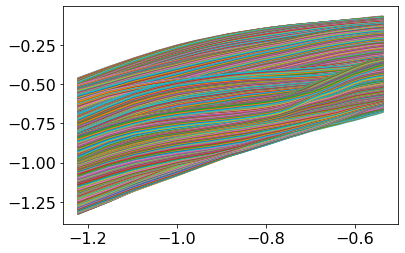

In [384]:
import numpy as np
import pandas as pd
import time
t0 = time.time()


###===converting the northing and easting to km
df_test['X'] = df_test['Easting (m)']/1000
df_test['Y'] = df_test['Northing (m)']/1000
####Let's try to see how different would it be in m
# df_train['X'] = df_train['Easting (m)']
# df_train['Y'] = df_train['Northing (m)']
####====creating upper and lower bound for the diameter of the investigation circles    
x_range =max(df_test['X']) - min(df_test['X']) 
y_range = max(df_test['Y']) - min(df_test['Y'])
R = max(x_range,y_range)/20
d = 2
N = 200 #### Number of points in each window
# r2 = 2*R*(1/N)**(1/d)  
# r1 = (R)/(1+d)
r_test = np.arange(0.06, 0.30, 0.01) ## The radius were selected after examining the values based on the paper (i.e, rn, rs) and then looking at the figures for the first data points and these numbers are similar to that for the Geysers
# r_test = np.arange(0.06*1000, 0.30*1000, 0.01*1000)
S_wind_t = np.zeros(len(df_test['X'])) + np.inf

for ii in range (200,len(df_test['X'])+1):
    c_10 = np.zeros(len(r_test)) +np.inf
    H = 0
    C = 0
    points = np.hstack((np.asarray(df_test['X'])[ii-N:ii-1, None], np.asarray(df_test['Y'])[ii-N:ii-1, None]))
    differences = np.subtract(points[None, :, :],  points[:, None, :]) # broadcast to 10x10x2
    squared_distances = (differences * differences).sum(axis=2)
    sqrt_distance = np.sqrt(squared_distances)
    within_range = sqrt_distance[None,:,:] < (r_test)[:, None, None]  # compare squares
    c_10 = within_range.sum(axis=(1,2)) / (N**2)

    S_wind_t[ii-1] = np.polyfit(np.log10(r_test), np.log10(c_10), 1)[0]
    plt.plot(np.log10(r_test), np.log10(c_10))

        
D_value_200_t = S_wind_t        
t1 = time.time()

print(t1-t0)


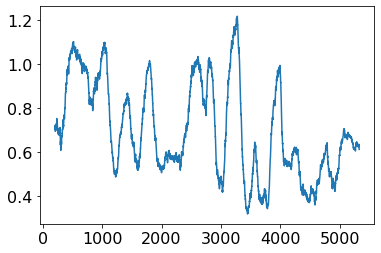

In [385]:
plt.plot(D_value_200_t);

- Changing the values to days and meters did not change the value of DC and since we are dealing with only one pad I will focus on the m and hour time

## 4. Calculating the generalized distance $\eta$

- First we have to calculate the b-value for each event. This would not be possible for the first 199 events therefore the b-value is calculated for the 200th event. [this paper for Western HF IS](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2020JB020606)

- The NND method is a statistical approach to earthquake cluster identification and classification, first formulated by Baiesi and Paczuski (2004) and expanded significantly by Zaliapin et al. (2008) and Zaliapin and Ben‐Zion (2013a, 2013b, 2015, 2016). Its purpose is to link together and characterize event families or sequences using a rescaled interevent distance metric termed the NND η, which is defined below as space, time, and magnitude dependent [source](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2020JB020606).


        

$$log \eta_{ij} = log R_{ij} + log T_{ij}$$ <br> $T_{ij} = t_{ij} \times 10^{-bq(M_{i})}$, and $t_{ij}$ earthquake intercurrence, b/w the parent event, $M_{i}$ and $M_{j}$ offspring event, (i<j), __Note__: I could play with this rescaled time maybe instead of $q=0.5$, I could use another number as long as $q+p = 1$ <br> $R_{ij} = (r_{ij})^{D_{C}} \times 10^{-bp(M_{i})}$, $r_{ij}$ earthquake distance, b/w the parent event, $M_{i}$ and $M_{j}$ offspring event, (i<j)

To calculate the generalized distance for each window and each event, we will be using the calculated **b-value** and **D-value** up to that event (offspring event `j`), but we calculate everything for all the magnitudes in that window and if the value is positive then we find the minimum to go as the value of `eta_ij[j]`, the minimum is coming from [this](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.101.018501#fulltext) and [this](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2020JB020606) papers where this clustering algorithm has been used. 
- Maybe if could consider using different clustering algorithms and use them as the features in ML and the predictive models to see which one is the best one.

## The actual code to calculate $\eta$
- the values are pretty small, it is because the scaled time and distance are in days and km respectively.

In [386]:
import time

t0 = time.time()
df_test['X'] = df_test['Easting (m)']/1000
df_test['Y'] = df_test['Northing (m)']/1000
####Let's try to see how different would it be in m
# df_train['X'] = df_train['Easting (m)']
# df_train['Y'] = df_train['Northing (m)']

eta_ij_t = np.zeros(len(df_test["Magnitude Mw"])) + np.inf
N = 200
for ii in range (200,len(df_test['X'])+1):

    time_diff_200 = np.hstack((np.asarray(pd.to_datetime(df_test['Date'][ii-N:ii-1].astype(str)))))[None,:] - np.hstack((np.asarray(pd.to_datetime(df_test['Date'][ii-N:ii-1].astype(str)))))[:, None]
    time_diff_200_ns = time_diff_200 / np.timedelta64(1, 'ns')
    time_diff_200_days = time_diff_200_ns/ ((10**9) * 60*60*24) ### modified to days we convert the ns to days
    points = np.hstack((np.asarray(df_test['X'])[ii-N:ii-1, None], np.asarray(df_test['Y'])[ii-N:ii-1, None]))
    differences = np.subtract(points[None, :, :],  points[:, None, :]) # broadcast to 10x10x2
    squared_distances = (differences * differences).sum(axis=2)
    sqrt_distance = np.sqrt(squared_distances)
    aaa = (time_diff_200_days[:,-1] * ( sqrt_distance [:, -1] ** ( D_value_200_t[ii-1] )) * 10 ** (-1 * b_value_200_window_t [ii-1]* df_test["Magnitude Mw"][ii-N: ii-1]))
    bbb = aaa[aaa>0]
    eta_ij_t [ii-1] = min(bbb) 
t1 = time.time()

total = t1-t0

print(total)    


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


22.641590356826782


In [387]:
np.log10(eta_ij_t[-1])

-3.629901514391055

In [388]:
eta_ij_t.shape

(5332,)

- Changing the values from days to hours and m to km change the order of the numbers by a lot therefore we keep the value of km and days instead. For consistency we consider all the time and distance in days and km respectively.  

## 5. Calculating the total duration of each window, $\Delta T$ in days

In [389]:
total_time_diff_sec_t = pd.to_datetime(df_test['Date'].astype(str)).diff(199).dt.total_seconds()
total_time_diff_days_200_t = total_time_diff_sec_t /(24*60*60)

In [390]:
# (np.asarray(pd.to_datetime(dates['Date'].astype(str)))[200] - np.asarray(pd.to_datetime(dates['Date'].astype(str)))[1])/np.timedelta64(1, 'ns')/(10**9)

In [391]:
Delta_T_duration_200_t = total_time_diff_days_200_t*eta_ij_t
Delta_T_duration_200_t.iloc[199]

6.68484152547124e-05

In [392]:
# Delta_T_duration_200[0:200]

## 6. Moment release, $M_o$, $\frac {N.m} {day}$

- Not quiet sure why but I am going to use the $\Delta T$ suggested in [this paper](https://www.mdpi.com/2571-9394/3/1/2/htm) for the moment release.

In [393]:
Moment_release_normal_t = 10**((df_test["Magnitude Mw"] + 6)*3/2)/total_time_diff_days_200_t

In [394]:
Moment_release_paper_t = 10**((df_test["Magnitude Mw"] + 6)*3/2)/Delta_T_duration_200_t

In [395]:
Moment_release_paper_t.iloc[200]

39048501926510.586

In [396]:
Moment_release_normal_t.iloc[200]

1475574831.942549

I will probably use the `Moment_release_normal` as well as the `total_time_diff_days_200`, as I see a better logic for it and it may not make a difference once used in the ML analysis and being scaled

## 7. Shannon Entropy $H_{ent}$


The procedure consists of the following steps:
- The radiated seismic energy  for each seismic event is calculated using the relation between the seismic energy and the moment magnitude MW of [(Hanks and Kanamori 1979](https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1029/JB084iB05p02348) and [UBC notes)](https://www.eoas.ubc.ca/courses/eosc256/feb1_2012_magnitude):
    - $M_{W} = \frac {2}{3} log M_{o} - 6 $, the last terms has an accurate value of 6.07.
    - $M_{o} = A \mu d$, A is area ($m^2$), $\mu$ is shear modulus ($Pascals = N/m^2$), and d is displacement ($m$).
    - $M_{W} = \frac {2}{3} log E - 3.2$ or $log_{10}^{E} = 4.8 + 1.5 M_{W}$

- For each cell, the radiated seismic energy of all events included in the cell within a temporal interval is summed up (i.e., $e_k$) and is then divided by the total seismic energy E (i.e.,  $E_R$) radiated within the entire grid.

- The temporal variation of entropy is performed using a temporal window with a fixed number of 200 events and with one event shift. The calculated values of the Shannon entropy are associated to the time of the last event of the moving window. __Next sentece is for the natural earthquakes calculated in [this](https://www.sciencedirect.com/science/article/pii/S0031920117301206#s0015)__ The analyzed data cover the period from about 3–4 years before the mainshock to 1 year later, including the aftershock sequences.


The Shannon entropy is normalized to allow comparison between time intervals with different seismic energy and to ensure unity total probability.

The normalized entropy is $h = \frac {H_{ent}}{H_{e}}$  where $H_{e}$ is the equipartition entropy corresponding to the radiated seismic energy uniformly distributed in the cells. $H_{e}$ is calculated using $H_{ent} = -\Sigma_{k=1}^{m} \frac {e_{k}} {E_{R}} [ln \frac {e_{k}} {E_{R}}]$ with $e_{k} = \frac {E_R}{m} $ (m is the number of grids) .

The values h = 1 and h = 0 correspond, respectively, to total disorder and extreme concentration. The Shannon entropy quantifies the uncertainty about the state of a system that is also related to its predictability. A system is characterized by the lowest level of predictability when h = 1 and all states are equiprobable. As the order increases, the Shannon entropy decreases and the system has the highest predictability when h = 0.

In [397]:
M_W = -1
10**((M_W + 3.2)*(1.5))

1995.262314968881

In [398]:
10**(1.5*M_W+4.8)

1995.2623149688789

In [399]:
# fig = plt.figure(figsize=(15, 13))
# ax_0 = fig.add_subplot(131, title='imshow: square bins')
# plt.imshow(H, interpolation='nearest', origin='lower',
#         extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]]);

In [400]:
# plt.imshow(H, interpolation='nearest', origin='lower',
#         extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]]);

In [401]:
import math
import time

t0 = time.time()

### I use meters here since it only shannon entropy and I am not using the values of coordinate for nothing more than the gridding

df_test['X'] = df_test['Easting (m)']
df_test['Y'] = df_test['Northing (m)']




data =  df_test[['X','Y', 'Magnitude Mw']].to_numpy()

min_range = min(df_test['X'].min(), df_test['Y'].min()) - 1000
max_range = max(df_test['X'].max(), df_test['Y'].max()) + 1000
# # We divide the coordinate space up into 20 bins.

cells = 21
binsize = (math.ceil(max_range) - math.floor(min_range)) // cells

N = 200

h_shan_t = np.zeros(len(df_test['X'])) + np.inf
for ii in range (N,len(df_test['X'])+1):
    

    bins = np.zeros((cells,cells))
    counts = np.zeros((cells,cells))
    # print(math.ceil(max_range))
    for row in data[ii-N:ii-1]:
        binx = (row[0] - min_range) // binsize
        biny = (row[1] - min_range) // binsize
        #####To debug if the range is enough
        #     if binx > (cells-1) or biny > (cells-1) :
        #         print(binx, biny)
        #         print(row)

        bins[int(biny),int(binx)] += 10**(row[2]*1.5 + 4.8)
        counts[int(biny),int(binx)] += 1
    ############## Here we calculate the Shannon Entropy

    e_k = bins/np.sum(bins) #### e_k = e_k/E_R as in the formula
    H_ent = -1 * np.nansum(e_k * np.log(e_k)) 

    ### This entropy is used for normalizing the calculated entropy by dividing the whole seismic radiated energy by the number of cells therefore it just depends on the number of cells
    m_cells = cells * cells
    H_e = -1 * m_cells * (1/m_cells) * np.log(1/m_cells) #### Since it is all the energy radiated equally at all the cells it could be just divided by 1/m and we can call it e_k

    h_shan_t[ii-1] = H_ent / H_e


t1 = time.time()

total = t1-t0

print(total)    


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
divide by zero encountered in log
invalid value encountered in multiply


3.887922763824463


In [402]:
h_shan_t[199]

0.2722976963698576

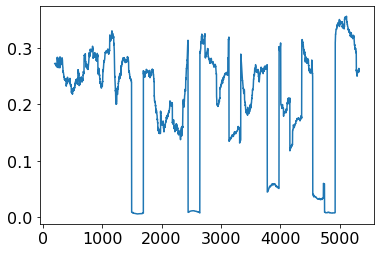

In [403]:
plt.plot(h_shan_t);

The next step is to merge all the calculated features into one `DataFrame` and then preprocess them for the ML analysis.

In [357]:
print(type(b_value_200_window_t))
print(type(b_error_200_window_t))
print(type(AM_value_200_window_t))
print(type(cut_mag_200_window_t))
print(type(a_value_200_window_t))

print(type(mag_range_200_window_t))
print(type(max_mag_200_window_t))
print('')

print(type(time_days_test))
print('')
print(type(Delta_T_duration_200_t))
print('')
print(type(D_value_200_t))

print(type(h_shan_t))
print('')
print(type(Moment_release_paper_t))
print('')

print(type(eta_ij_t))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>

<class 'pandas.core.series.Series'>

<class 'pandas.core.series.Series'>

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>

<class 'pandas.core.series.Series'>

<class 'numpy.ndarray'>


In [264]:
print(b_value_200_window_t.shape)
print(b_error_200_window_t.shape)
print(AM_value_200_window_t.shape)
print(cut_mag_200_window_t.shape)
print(a_value_200_window_t.shape)

print((mag_range_200_window_t.shape))
print((max_mag_200_window_t.shape))


print((time_days_test.shape))

print((Delta_T_duration_200_t.shape))

print((D_value_200_t.shape))

print((h_shan_t.shape))

print((Moment_release_paper_t.shape))


print((eta_ij_t.shape))

(5332,)
(5332,)
(5332,)
(5332,)
(5332,)
(5332,)
(5332,)
(5333,)
(5332,)
(5332,)
(5332,)
(5332,)
(5332,)


In [418]:
# time_days_test = time_days_test.reset_index(drop = True)
Delta_T_duration_200_t = Delta_T_duration_200_t.reset_index(drop = True)
Moment_release_paper_t = Moment_release_paper_t.reset_index(drop = True)

In [413]:
time_days_test = time_days_test.reset_index()

In [415]:
del time_days_test['index']

In [420]:
Moment_release_paper_t

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
5327    6.664026e+12
5328    1.137476e+13
5329    2.576886e+13
5330    2.997853e+12
5331    1.215909e+13
Length: 5332, dtype: float64

In [421]:
# time_days_test = time_days_test.reset_index()
# Delta_T_duration_200_t = Delta_T_duration_200_t.reset_index()
# Moment_release_paper_t = Moment_release_paper_t.reset_index()

df_final_test = pd.concat([pd.Series(b_value_200_window_t), 
           pd.Series(b_error_200_window_t),pd.Series(AM_value_200_window_t),pd.Series(cut_mag_200_window_t), 
           pd.Series(a_value_200_window_t),pd.Series(mag_range_200_window_t),
           pd.Series(max_mag_200_window_t),time_days_test,Delta_T_duration_200_t,
           pd.Series(D_value_200_t),pd.Series(h_shan_t),Moment_release_paper_t,
           pd.Series(eta_ij_t)], axis = 1)

In [422]:
df_final_test.columns = ['b-value','b-value-error','AM-value','cut-off-mag','a-value', 'mag_range','max_mag', 'delta_t_days', 'total_duration_days', 'D-value','Shannon-Entropy', 'moment_rate', 'eta']

In [423]:
df_final_test

b-value  b-value-error  AM-value  cut-off-mag   a-value  mag_range  \
0          inf            inf       inf          inf       inf        inf   
1          inf            inf       inf          inf       inf        inf   
2          inf            inf       inf          inf       inf        inf   
3          inf            inf       inf          inf       inf        inf   
4          inf            inf       inf          inf       inf        inf   
...        ...            ...       ...          ...       ...        ...   
5327  1.853047       0.155087 -0.502114    -0.020526  1.902458       0.79   
5328  1.867933       0.156507 -0.498639    -0.020526  1.907124       0.79   
5329  1.879971       0.157206 -0.495849    -0.020526  1.911791       0.79   
5330  1.881873       0.155776 -0.495410    -0.020526  1.916605       0.79   
5331  1.881873       0.155776 -0.495410    -0.020526  1.916605       0.79   

      max_mag  delta_t_days  total_duration_days   D-value  Shannon-Entropy  \
0         inf           NaN                  NaN       inf              inf   
1         inf      0.000069                  NaN       inf              inf   
2         inf      0.004641                  NaN       inf              inf   
3         inf      0.000220                  NaN       inf              inf   
4         inf      0.000104                  NaN       inf              inf   
...       ...           ...                  ...       ...              ...   
5327     0.77      0.000417             0.000150  0.634127         0.263485   
5328     0.77      0.005764             0.000098  0.624680         0.262855   
5329     0.77      0.003287             0.000063  0.620440         0.261174   
5330     0.77      0.003333             0.000118  0.617201         0.259946   
5331     0.77      0.002604             0.000082  0.613568         0.259563   

       moment_rate       eta  
0              NaN       inf  
1              NaN       inf  
2              NaN       inf  
3              NaN       inf  
4              NaN       inf  
...            ...       ...  
5327  6.664026e+12  0.000441  
5328  1.137476e+13  0.000284  
5329  2.576886e+13  0.000182  
5330  2.997853e+12  0.000339  
5331  1.215909e+13  0.000234  

[5332 rows x 13 columns]

## Creating the target value
- The target value is the next magnitude of earthquake.

In [426]:
# y_test_pre = df_test['Magnitude Mw'].reset_index()
# del y_test_pre['index']

In [432]:
# y_test_pre

In [428]:
def lag_df(df, lag, cols):
    return df.assign(**{f"{col}-{n}": df[col].shift(-n) for n in range(1, lag +1) for col in cols})

In [429]:
df_test_mod = lag_df(df_all , 1, ['Magnitude Mw'])[df_all['Date'] > point_spl]

In [430]:
df_final_test.head(200)

b-value  b-value-error  AM-value  cut-off-mag  a-value  mag_range  \
0         inf            inf       inf          inf      inf        inf   
1         inf            inf       inf          inf      inf        inf   
2         inf            inf       inf          inf      inf        inf   
3         inf            inf       inf          inf      inf        inf   
4         inf            inf       inf          inf      inf        inf   
..        ...            ...       ...          ...      ...        ...   
195       inf            inf       inf          inf      inf        inf   
196       inf            inf       inf          inf      inf        inf   
197       inf            inf       inf          inf      inf        inf   
198       inf            inf       inf          inf      inf        inf   
199  1.943299       0.184655  -0.95146          0.0  1.94939       1.24   

     max_mag  delta_t_days  total_duration_days   D-value  Shannon-Entropy  \
0        inf           NaN                  NaN       inf              inf   
1        inf      0.000069                  NaN       inf              inf   
2        inf      0.004641                  NaN       inf              inf   
3        inf      0.000220                  NaN       inf              inf   
4        inf      0.000104                  NaN       inf              inf   
..       ...           ...                  ...       ...              ...   
195      inf      0.000069                  NaN       inf              inf   
196      inf      0.000868                  NaN       inf              inf   
197      inf      0.001470                  NaN       inf              inf   
198      inf      0.000613                  NaN       inf              inf   
199     1.24      0.001875             0.000067  0.707933         0.272298   

      moment_rate       eta  
0             NaN       inf  
1             NaN       inf  
2             NaN       inf  
3             NaN       inf  
4             NaN       inf  
..            ...       ...  
195           NaN       inf  
196           NaN       inf  
197           NaN       inf  
198           NaN       inf  
199  1.215931e+13  0.000344  

[200 rows x 13 columns]

In [433]:
y_test_pre = df_test_mod['Magnitude Mw-1']

In [436]:
y_test_pre = y_test_pre.reset_index()
del y_test_pre['index']

In [437]:
y_test_pre

Magnitude Mw-1
0              -0.16
1               0.09
2               0.17
3               0.00
4              -0.45
...              ...
5327            0.03
5328            0.14
5329           -0.30
5330            0.00
5331             NaN

[5332 rows x 1 columns]

In [438]:
df_final_test = pd.concat ([df_final_test, y_test_pre], axis = 1)

In [249]:
# del df_final_train['Magnitude Mw-1']

In [439]:
df_final_test

b-value  b-value-error  AM-value  cut-off-mag   a-value  mag_range  \
0          inf            inf       inf          inf       inf        inf   
1          inf            inf       inf          inf       inf        inf   
2          inf            inf       inf          inf       inf        inf   
3          inf            inf       inf          inf       inf        inf   
4          inf            inf       inf          inf       inf        inf   
...        ...            ...       ...          ...       ...        ...   
5327  1.853047       0.155087 -0.502114    -0.020526  1.902458       0.79   
5328  1.867933       0.156507 -0.498639    -0.020526  1.907124       0.79   
5329  1.879971       0.157206 -0.495849    -0.020526  1.911791       0.79   
5330  1.881873       0.155776 -0.495410    -0.020526  1.916605       0.79   
5331  1.881873       0.155776 -0.495410    -0.020526  1.916605       0.79   

      max_mag  delta_t_days  total_duration_days   D-value  Shannon-Entropy  \
0         inf           NaN                  NaN       inf              inf   
1         inf      0.000069                  NaN       inf              inf   
2         inf      0.004641                  NaN       inf              inf   
3         inf      0.000220                  NaN       inf              inf   
4         inf      0.000104                  NaN       inf              inf   
...       ...           ...                  ...       ...              ...   
5327     0.77      0.000417             0.000150  0.634127         0.263485   
5328     0.77      0.005764             0.000098  0.624680         0.262855   
5329     0.77      0.003287             0.000063  0.620440         0.261174   
5330     0.77      0.003333             0.000118  0.617201         0.259946   
5331     0.77      0.002604             0.000082  0.613568         0.259563   

       moment_rate       eta  Magnitude Mw-1  
0              NaN       inf           -0.16  
1              NaN       inf            0.09  
2              NaN       inf            0.17  
3              NaN       inf            0.00  
4              NaN       inf           -0.45  
...            ...       ...             ...  
5327  6.664026e+12  0.000441            0.03  
5328  1.137476e+13  0.000284            0.14  
5329  2.576886e+13  0.000182           -0.30  
5330  2.997853e+12  0.000339            0.00  
5331  1.215909e+13  0.000234             NaN  

[5332 rows x 14 columns]

- Since the last row has a `Nan` value which is actually the earthquake magnitude in the test data set.
- Now what I can do to get around this problem is to lag the original dataset before splitting and then split to train and test. 
    - Therefore, I will shift the magnitudes by one for the original `DataFrame` (i.e., `df_all`), and then cut it at the training and then merging it back to the training. 

In [442]:
# # large_numer_features = [ 'moment_rate', 'eta'] ### These features should be scaled

# drop_features = ['b-value-error', 'Magnitude Mw-1']

# numeric_features = ['b-value', 'AM-value','cut-off-mag','a-value', 'mag_range','max_mag', 'delta_t_days', 'total_duration_days', 'D-value','Shannon-Entropy', 'moment_rate', 'eta']


In [441]:
# #### ===== setting the target value ======#####
# y_test = df_final_test ['Magnitude Mw-1'][199:]


# ##########========== creating pipelines and columntransformer to transform the data
# pipe_num = Pipeline([('num', StandardScaler())])

# preprocessor = ColumnTransformer([('num', pipe_num, numeric_features)])


- Preprocessing has been already fit on the training data and therefore we must use that for the transformation in out test set data. That is what we are going to do.

In [449]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('num', StandardScaler())]),
                                 ['b-value', 'AM-value', 'cut-off-mag',
                                  'a-value', 'mag_range', 'max_mag',
                                  'delta_t_days', 'total_duration_days',
                                  'D-value', 'Shannon-Entropy', 'moment_rate',
                                  'eta'])])

In [466]:
X_test_enc = preprocessor.transform(df_final_test.iloc[199:5331]) #### I started from 200 events since before that there are inf values
pd.DataFrame(data = X_test_enc, columns = numeric_features)

b-value  AM-value  cut-off-mag   a-value  mag_range   max_mag  \
0    -0.345641 -0.858194     1.099943  0.484913   0.661837  0.929771   
1    -0.345641 -0.858194     1.099943  0.484913   0.661837  0.929771   
2    -0.345641 -0.858194     1.099943  0.484913   0.661837  0.929771   
3    -0.364026 -0.861457     1.099943  0.458642   0.661837  0.929771   
4    -0.365008 -0.861631     1.099943  0.432071   0.661837  0.929771   
...        ...       ...          ...       ...        ...       ...   
5127 -0.547636 -0.061186     0.915891  0.233672  -0.207268 -0.018374   
5128 -0.547636 -0.061186     0.915891  0.233672  -0.207268 -0.018374   
5129 -0.514318 -0.055022     0.915891  0.258649  -0.207268 -0.018374   
5130 -0.487375 -0.050074     0.915891  0.283630  -0.207268 -0.018374   
5131 -0.483119 -0.049295     0.915891  0.309404  -0.207268 -0.018374   

      delta_t_days  total_duration_days   D-value  Shannon-Entropy  \
0        -0.024748            -0.104771  0.857104         1.729175   
1        -0.139146            -0.114724  0.911742         1.724809   
2        -0.284278            -0.101316  0.920116         1.725007   
3        -0.272326            -0.115156  0.876471         1.725619   
4        -0.255252            -0.113185  0.863328         1.724536   
...            ...                  ...       ...              ...   
5127      0.089650            -0.108727  0.532384         1.609003   
5128     -0.239885            -0.090843  0.522904         1.604861   
5129      0.548951            -0.099638  0.480123         1.595982   
5130      0.183559            -0.105426  0.460927         1.572258   
5131      0.190389            -0.096149  0.446258         1.554936   

      moment_rate       eta  
0       -0.067947 -0.098271  
1       -0.066772 -0.225670  
2       -0.068267 -0.050647  
3       -0.065363 -0.230917  
4       -0.066479 -0.205283  
...           ...       ...  
5127    -0.068224 -0.188644  
5128    -0.068187 -0.057883  
5129    -0.067981 -0.123120  
5130    -0.067352 -0.165707  
5131    -0.068347 -0.100264  

[5132 rows x 12 columns]

In [452]:
# X_test_enc

- Fitting on the training dataset, remember this fit has to only be on training and only be transformed on test dataset.

In [453]:
# df_final_test.iloc[199:]

In [ ]:
# X_test_enc = preprocessor.transform(df_final_test.iloc[199:]) #### I started from 200 events since before that there are inf values

In [ ]:
# pd.DataFrame(data = X_test_enc, columns = numeric_features)

- `RandomForestRegressor` without any hyper parameter optimization

- Based on the target values of energy

In [ ]:
# # rf = make_pipeline(preprocessor, RandomForestRegressor(random_state=111))
# rf = RandomForestRegressor(random_state=999)
# rf.fit(X_train_enc, 10**(1.5*y_train + 4.8));

In [ ]:
# rf.score(X_train_enc, 10**(1.5*y_train + 4.8))

In [ ]:
# plt.scatter(10**(1.5*y_train + 4.8), rf.predict(X_train_enc), alpha=0.3)
# grid = np.linspace(10**(1.5*y_train + 4.8).min(), 10**(1.5*y_train + 4.8).max(), 1000)
# plt.plot(grid, grid, '--k');
# plt.xlabel("true Magnitude");
# plt.ylabel("predicted Magnitude");

In [ ]:
# np.sqrt(mean_squared_error(y_train, rf.predict(X_train_enc)))

In [ ]:
# mape(y_train, rf.predict(X_train_enc))

# Transforming the target 
- The values which contain negative and positive numbers and 0 to positive numbers using power to the 10.
- This has significantly improved the prediction at large magnitudes

In [454]:
# rf = make_pipeline(preprocessor, RandomForestRegressor(random_state=111))
rf = RandomForestRegressor(random_state=999)
rf.fit(X_train_enc, 10**(y_train));

In [455]:
rf.score(X_train_enc, 10**(y_train))

0.849506744374233

In [67]:
# plt.scatter(np.log(y_train+10), rf.predict(X_train_enc), alpha=0.3) ## IF u want this code to run you have to also run the rf.fir using the np.log(y_train + 10)
# grid = np.linspace(np.log(y_train+10).min(), np.log(y_train+10).max(), 1000)
# plt.plot(grid, grid, '--k');
# plt.xlabel("true Magnitude");
# plt.ylabel("predicted Magnitude");

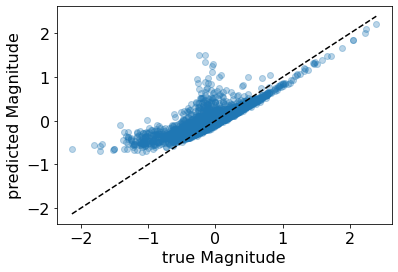

In [456]:
plt.scatter(y_train, np.log10(rf.predict(X_train_enc)), alpha=0.3)
grid = np.linspace(y_train.min(), y_train.max(), 1000)
plt.plot(grid, grid, '--k');
plt.xlabel("true Magnitude");
plt.ylabel("predicted Magnitude");

In [457]:
np.sqrt(mean_squared_error(y_train, np.log10(rf.predict(X_train_enc))))

0.13712994402266268

In [458]:
mape(10**(y_train), (rf.predict(X_train_enc)))

26.245338718957395

In [459]:
# mape((y_train), np.log10(rf.predict(X_train_enc)))

In [460]:
rf_importances = pd.DataFrame(data=rf[1].feature_importances_, index=numeric_features, columns=["Importance"])
rf_importances.sort_values(by="Importance", ascending=False)

Importance
a-value                0.679250
AM-value               0.121622
Shannon-Entropy        0.059671
moment_rate            0.040162
D-value                0.030885
eta                    0.022767
delta_t_days           0.018333
b-value                0.015823
total_duration_days    0.005016
cut-off-mag            0.002944
mag_range              0.002094
max_mag                0.001431

- `cross_val_score`

In [89]:
rf_pipe= make_pipeline(preprocessor, RandomForestRegressor(random_state=999))
cross_val_score(rf_pipe, df_final_train.iloc[199:], 10**(y_train), cv=TimeSeriesSplit()).mean()

-1.7664858901881406

Seems that the `cross_val_score` does not really help.

# Test results

In [470]:
y_test = y_test_pre[199:5331]
y_test

Magnitude Mw-1
199            -0.36
200            -0.25
201            -0.31
202            -0.08
203            -0.53
...              ...
5326            0.00
5327            0.03
5328            0.14
5329           -0.30
5330            0.00

[5132 rows x 1 columns]

In [472]:
rf.score(X_test_enc, 10**(y_test))

-0.042546682881673625

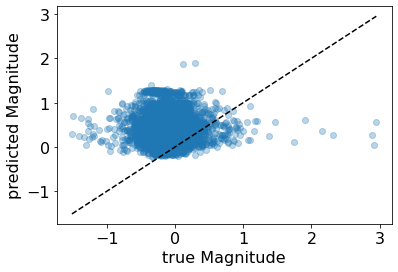

In [473]:
plt.scatter(y_test, np.log10(rf.predict(X_test_enc)), alpha=0.3)
grid = np.linspace(y_test.min(), y_test.max(), 1000)
plt.plot(grid, grid, '--k');
plt.xlabel("true Magnitude");
plt.ylabel("predicted Magnitude");

# Transforming the target 
- The values which contain negative and positive numbers and 0 to positive numbers using power to the 2.
- This has significantly improved the prediction at large magnitudes

In [474]:
# rf = make_pipeline(preprocessor, RandomForestRegressor(random_state=111))
rf = RandomForestRegressor(random_state=999)
rf.fit(X_train_enc, 2**(y_train));

In [475]:
rf.score(X_train_enc, 2**(y_train))

0.8705821945740949

In [67]:
# plt.scatter(np.log(y_train+10), rf.predict(X_train_enc), alpha=0.3) ## IF u want this code to run you have to also run the rf.fir using the np.log(y_train + 10)
# grid = np.linspace(np.log(y_train+10).min(), np.log(y_train+10).max(), 1000)
# plt.plot(grid, grid, '--k');
# plt.xlabel("true Magnitude");
# plt.ylabel("predicted Magnitude");

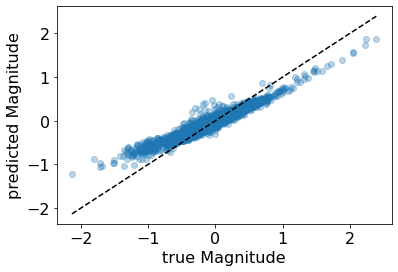

In [476]:
plt.scatter(y_train, np.log2(rf.predict(X_train_enc)), alpha=0.3)
grid = np.linspace(y_train.min(), y_train.max(), 1000)
plt.plot(grid, grid, '--k');
plt.xlabel("true Magnitude");
plt.ylabel("predicted Magnitude");

In [477]:
np.sqrt(mean_squared_error(y_train, np.log2(rf.predict(X_train_enc))))

0.09504996204192576

In [478]:
mape(2**(y_train), (rf.predict(X_train_enc)))

4.436421875754249

In [479]:
# mape((y_train), np.log10(rf.predict(X_train_enc)))

In [480]:
rf_importances = pd.DataFrame(data=rf[1].feature_importances_, index=numeric_features, columns=["Importance"])
rf_importances.sort_values(by="Importance", ascending=False)

Importance
a-value                0.150103
b-value                0.135926
D-value                0.116524
moment_rate            0.116186
Shannon-Entropy        0.100000
delta_t_days           0.084869
AM-value               0.082603
total_duration_days    0.081923
eta                    0.064389
cut-off-mag            0.034021
mag_range              0.017324
max_mag                0.016135

- `cross_val_score`

In [89]:
rf_pipe= make_pipeline(preprocessor, RandomForestRegressor(random_state=999))
cross_val_score(rf_pipe, df_final_train.iloc[199:], 10**(y_train), cv=TimeSeriesSplit()).mean()

-1.7664858901881406

Seems that the `cross_val_score` does not really help.

# Test dataset

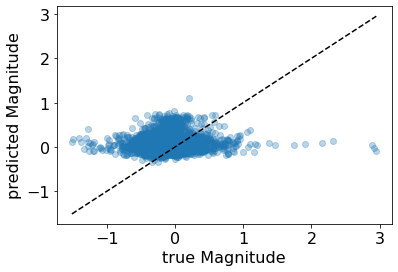

In [481]:
plt.scatter(y_test, np.log2(rf.predict(X_test_enc)), alpha=0.3)
grid = np.linspace(y_test.min(), y_test.max(), 1000)
plt.plot(grid, grid, '--k');
plt.xlabel("true Magnitude");
plt.ylabel("predicted Magnitude");

# Transforming the target 
- The values which contain negative and positive numbers and 0 to positive numbers using power to the exp.
- This has significantly improved the prediction at large magnitudes

In [102]:
# rf = make_pipeline(preprocessor, RandomForestRegressor(random_state=111))
rf = RandomForestRegressor(random_state=999)
rf.fit(X_train_enc, np.exp(y_train));

In [103]:
rf.score(X_train_enc, np.exp(y_train))

0.8657639112740376

In [104]:
# plt.scatter(np.log(y_train+10), rf.predict(X_train_enc), alpha=0.3) ## IF u want this code to run you have to also run the rf.fir using the np.log(y_train + 10)
# grid = np.linspace(np.log(y_train+10).min(), np.log(y_train+10).max(), 1000)
# plt.plot(grid, grid, '--k');
# plt.xlabel("true Magnitude");
# plt.ylabel("predicted Magnitude");

In [105]:
np.exp(1)

2.718281828459045

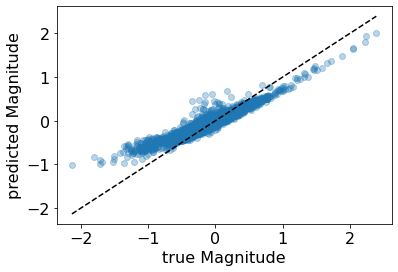

In [106]:
plt.scatter(y_train, np.log(rf.predict(X_train_enc)), alpha=0.3)
grid = np.linspace(y_train.min(), y_train.max(), 1000)
plt.plot(grid, grid, '--k');
plt.xlabel("true Magnitude");
plt.ylabel("predicted Magnitude");

In [107]:
np.sqrt(mean_squared_error(y_train, np.log(rf.predict(X_train_enc))))

0.10000165986428093

In [108]:
mape(np.exp(y_train), (rf.predict(X_train_enc)))

6.752403658707181

In [109]:
# mape((y_train), np.log10(rf.predict(X_train_enc)))

In [110]:
rf_importances = pd.DataFrame(data=rf[1].feature_importances_, index=numeric_features, columns=["Importance"])
rf_importances.sort_values(by="Importance", ascending=False)

Importance
AM-value               0.177950
moment_rate            0.141394
D-value                0.117391
Shannon-Entropy        0.115890
a-value                0.107872
b-value                0.081155
delta_t_days           0.071084
total_duration_days    0.058435
eta                    0.056645
cut-off-mag            0.046505
mag_range              0.016702
max_mag                0.008977

- `cross_val_score`

In [89]:
rf_pipe= make_pipeline(preprocessor, RandomForestRegressor(random_state=999))
cross_val_score(rf_pipe, df_final_train.iloc[199:], 10**(y_train), cv=TimeSeriesSplit()).mean()

-1.7664858901881406

Seems that the `cross_val_score` does not really help.

# `KNN`

In [482]:
from sklearn import neighbors
from math import sqrt
from sklearn import metrics
from sklearn.metrics import mean_squared_error

Knn = neighbors.KNeighborsRegressor(n_neighbors=1)
Knn.fit(X_train_enc, (y_train))  
error = sqrt(metrics.mean_squared_error( y_train, (Knn.predict(X_train_enc)))) 
print('RMSE value of the KNN Model is:', error)

RMSE value of the KNN Model is: 0.0


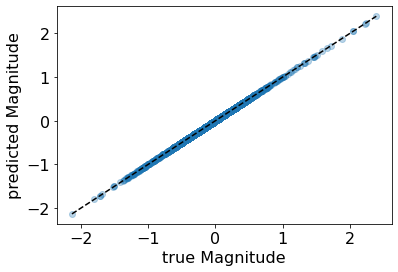

In [483]:
plt.scatter(y_train, Knn.predict(X_train_enc), alpha=0.3)
grid = np.linspace(y_train.min(), y_train.max(), 1000)
plt.plot(grid, grid, '--k');
plt.xlabel("true Magnitude");
plt.ylabel("predicted Magnitude");

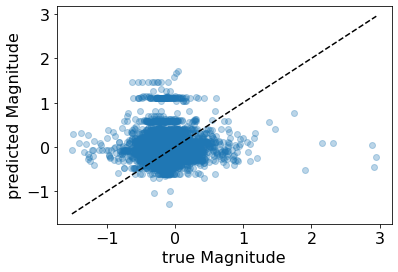

In [485]:
plt.scatter(y_test, Knn.predict(X_test_enc), alpha=0.3)
grid = np.linspace(y_test.min(), y_test.max(), 1000)
plt.plot(grid, grid, '--k');
plt.xlabel("true Magnitude");
plt.ylabel("predicted Magnitude");

In [114]:
from sklearn import neighbors
from math import sqrt
from sklearn import metrics
from sklearn.metrics import mean_squared_error

Knn = neighbors.KNeighborsRegressor(n_neighbors=1)
Knn.fit(X_train_enc, 2**(y_train))  
error = sqrt(metrics.mean_squared_error( y_train, np.log(Knn.predict(X_train_enc)))) 
print('RMSE value of the KNN Model is:', error)

RMSE value of the KNN Model is: 0.08248496641157936


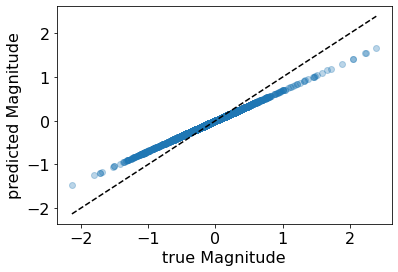

In [115]:
plt.scatter(y_train, np.log(Knn.predict(X_train_enc)), alpha=0.3)
grid = np.linspace(y_train.min(), y_train.max(), 1000)
plt.plot(grid, grid, '--k');
plt.xlabel("true Magnitude");
plt.ylabel("predicted Magnitude");

# `SVR`

In [116]:
from sklearn import svm
from sklearn.svm import SVR

Svr=SVR(kernel='rbf', C=1, gamma= 0.5)   # Parameter Tuning to get the best accuracy

# Intuitively, the gamma defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’.
# The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. 
# For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. 
# A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. 
# In other words C behaves as a regularization parameter in the SVM.

Svr.fit(X_train_enc,y_train)
print(Svr.score(X_train_enc,y_train))

0.24082537398617887


In [117]:
error = sqrt(metrics.mean_squared_error(y_train,Svr.predict(X_train_enc))) #calculate rmse
print('RMSE value of the SVR Model is:', error)

RMSE value of the SVR Model is: 0.224612855927978


In [118]:
from sklearn.linear_model import LinearRegression
LR_not_tuned = LinearRegression()
LR_not_tuned.fit(X_train_enc, y_train)  
error = sqrt(metrics.mean_squared_error( y_train, LR_not_tuned.predict(X_train_enc))) 
print('RMSE value of the LinearRegression Model is:', error)

RMSE value of the LinearRegression Model is: 0.24999485374424452


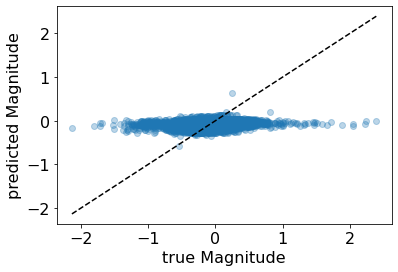

In [119]:
plt.scatter(y_train, LR_not_tuned.predict(X_train_enc), alpha=0.3)
grid = np.linspace(y_train.min(), y_train.max(), 1000)
plt.plot(grid, grid, '--k');
plt.xlabel("true Magnitude");
plt.ylabel("predicted Magnitude");

In [120]:
from sklearn import svm
from sklearn.svm import SVR

Svr=SVR(kernel='rbf', C=1, gamma= 0.5)   # Parameter Tuning to get the best accuracy

# Intuitively, the gamma defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’.
# The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. 
# For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. 
# A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. 
# In other words C behaves as a regularization parameter in the SVM.

Svr.fit(X_train_enc,2**(y_train))
print(Svr.score(X_train_enc,2**(y_train)))

0.20928914934065268


In [121]:
error = sqrt(metrics.mean_squared_error(y_train,np.log(Svr.predict(X_train_enc)))) #calculate rmse
print('RMSE value of the SVR Model is:', error)

RMSE value of the SVR Model is: 0.23036840076850962


In [122]:
from sklearn.linear_model import LinearRegression
LR_not_tuned = LinearRegression()
LR_not_tuned.fit(X_train_enc, 2**(y_train))  
error = sqrt(metrics.mean_squared_error(y_train, np.log2(LR_not_tuned.predict(X_train_enc)))) 
print('RMSE value of the LinearRegression Model is:', error)

RMSE value of the LinearRegression Model is: 0.25114266793942586


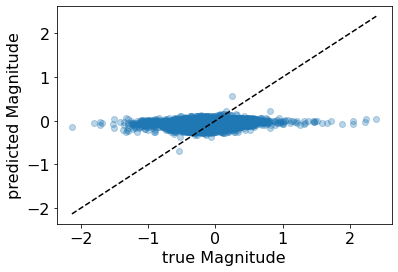

In [123]:
plt.scatter(y_train, np.log2(LR_not_tuned.predict(X_train_enc)), alpha=0.3)
grid = np.linspace(y_train.min(), y_train.max(), 1000)
plt.plot(grid, grid, '--k');
plt.xlabel("true Magnitude");
plt.ylabel("predicted Magnitude");

# `DecisionTreeRegressor`

In [491]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(random_state=999) ## max_depth over 40 will do the job
DTR.fit(X_train_enc, (y_train))  
error = sqrt(metrics.mean_squared_error( y_train, (DTR.predict(X_train_enc)))) 
print('RMSE value of the Desicions Tree Regressor Model is:', error)

RMSE value of the Desicions Tree Regressor Model is: 9.530525383098196e-19


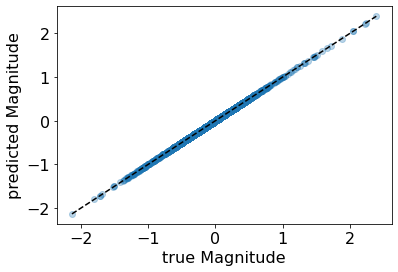

In [492]:
plt.scatter(y_train, (DTR.predict(X_train_enc)), alpha=0.3)
grid = np.linspace(y_train.min(), y_train.max(), 1000)
plt.plot(grid, grid, '--k');
plt.xlabel("true Magnitude");
plt.ylabel("predicted Magnitude");

In [494]:
mape((y_train), (rf.predict(X_train_enc)))

inf

In [495]:
DTR_importances = pd.DataFrame(data=DTR.feature_importances_, index=numeric_features, columns=["Importance"])
DTR_importances.sort_values(by="Importance", ascending=False)

Importance
moment_rate            0.153389
a-value                0.144810
D-value                0.118948
Shannon-Entropy        0.113163
total_duration_days    0.084059
AM-value               0.082807
delta_t_days           0.080993
eta                    0.079088
b-value                0.076094
cut-off-mag            0.043795
mag_range              0.012889
max_mag                0.009965

In [529]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(max_depth = 8,random_state=999) ## max_depth over 40 will do the job
DTR.fit(X_train_enc, 2**(y_train))  
error = sqrt(metrics.mean_squared_error( y_train, np.log2(DTR.predict(X_train_enc)))) 
print('RMSE value of the Desicions Tree Regressor Model is:', error)

RMSE value of the Desicions Tree Regressor Model is: 0.22872659282617994


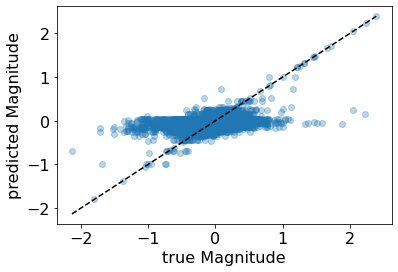

In [530]:
plt.scatter(y_train, np.log2(DTR.predict(X_train_enc)), alpha=0.3)
grid = np.linspace(y_train.min(), y_train.max(), 1000)
plt.plot(grid, grid, '--k');
plt.xlabel("true Magnitude");
plt.ylabel("predicted Magnitude");

In [531]:
mape(2**(y_train), (rf.predict(X_train_enc)))

4.436421875754249

In [532]:
DTR_importances = pd.DataFrame(data=DTR.feature_importances_, index=numeric_features, columns=["Importance"])
DTR_importances.sort_values(by="Importance", ascending=False)

Importance
a-value                0.334725
moment_rate            0.188525
Shannon-Entropy        0.117964
D-value                0.109851
total_duration_days    0.073215
b-value                0.050484
AM-value               0.046908
delta_t_days           0.031209
cut-off-mag            0.026736
max_mag                0.011288
eta                    0.007921
mag_range              0.001174

In [504]:
DTR_importances = pd.DataFrame(data=DTR.feature_importances_, index=numeric_features, columns=["Importance"])
DTR_importances.sort_values(by="Importance", ascending=False)

Importance
a-value                0.177788
D-value                0.130966
Shannon-Entropy        0.127465
moment_rate            0.125081
delta_t_days           0.098553
AM-value               0.088646
total_duration_days    0.079653
b-value                0.062988
eta                    0.053626
max_mag                0.022915
cut-off-mag            0.022376
mag_range              0.009944

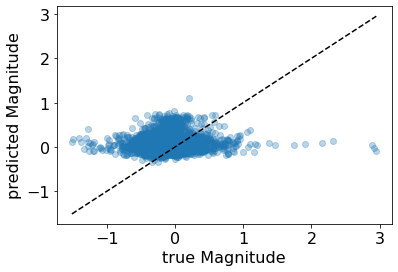

In [534]:
plt.scatter(y_test, np.log2(rf.predict(X_test_enc)), alpha=0.3)
grid = np.linspace(y_test.min(), y_test.max(), 1000)
plt.plot(grid, grid, '--k');
plt.xlabel("true Magnitude");
plt.ylabel("predicted Magnitude");

In [519]:
# columns = [
#     'mean_test_score', 'mean_train_score', 'mean_fit_time', 'rank_test_score', 'param_classifier__C', 'param_classifier__class_weight'
# ]
# pd.DataFrame(searcher.cv_results_)[columns].sort_values(by=['rank_test_score'])

In [145]:
from sklearn.metrics import make_scorer
def rmse(true, pred):
    """
    Compute the Root Mean Squared Error (RMSE)
    given true target values and predictions.    
    """
    return sqrt(metrics.mean_squared_error(true, pred))
   
     
rmse_scorer = make_scorer(mape, greater_is_better=False)

In [ ]:
DecisionTreeRegressor()

In [159]:

preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), numeric_features)])

pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('Regress', DecisionTreeRegressor(random_state=999))
])

hypers = {
    'Regress__max_depth' : np.arange(1,1000)
#     'classifier__class_weight'  : ['balanced', 'None']
}

# criterions = ["mse","mae"]
# param_grid = dict(criterion=criterions) 

searcher = RandomizedSearchCV(pipe, hypers, n_iter = 120,scoring=rmse_scorer, cv=TimeSeriesSplit(n_splits=100), n_jobs=-1, verbose=1, return_train_score=True)

searcher.fit(df_final_train.iloc[199:], 2**(y_train));

Fitting 100 folds for each of 120 candidates, totalling 12000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 1480 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 2380 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 3480 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 4780 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done 6280 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 7980 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 9880 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 12000 out of 12000 | elapsed:  1.3min finished


In [161]:
best_score = searcher.best_score_
best_parameters = searcher.best_params_
print("Best Score:",best_score)
print("Best Parameters:",best_parameters)

Best Score: -17.538954112435
Best Parameters: {'Regress__max_depth': 8}


In [162]:
DTR_pipe= make_pipeline(preprocessor, DecisionTreeRegressor(random_state=999))
cross_val_score(rf_pipe, df_final_train.iloc[199:], 2**(y_train), cv=TimeSeriesSplit(n_splits=5))

array([-0.2066688 ,  0.01710981, -0.14184095, -0.1571946 , -0.50432095])

## Hyper parameter optimization for `DecisionTreeRegressor`

In [177]:
from skopt import BayesSearchCV


preprocessor_DTR = ColumnTransformer([('scale', StandardScaler(), numeric_features)])
pipe_DTR = Pipeline([
    ('preprocessing', preprocessor_DTR),
    ('Regress', DecisionTreeRegressor(random_state=999))
])



hypers = {
    'Regress__max_depth' : np.arange(1,1000)
#     'classifier__class_weight'  : ['balanced', 'None']
}


# score_method = 'average_precision'

In [178]:
# Tuning Decision Tree Model
# criterions = ["mse","mae"]
# param_grid = dict(criterion=criterions) 

In [518]:
# dtr = DecisionTreeRegressor()
# gs = GridSearchCV(preprocessor_DTR, cv=TimeSeriesSplit(n_splits = 20), param_grid=hypers , scoring=rmse_scorer, verbose=2, n_jobs=-1)
# grid_search = gs.fit(df_final_train.iloc[199:], 2**(y_train))

In [ ]:
best_score = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Score:",best_score)
print("Best Parameters:",best_parameters)

In [ ]:
from sklearn.linear_model import Lasso 
from sklearn.linear_model import ElasticNet 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR 
#
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB 

In [ ]:
classic_models = [] 
classic_models.append(('LR', LinearRegression())) 
classic_models.append(('LASSO', Lasso())) 
classic_models.append(('EN', ElasticNet())) 
classic_models.append(('KNN', KNeighborsRegressor())) 
classic_models.append(('DTR', DecisionTreeRegressor())) 
classic_models.append(('SVR', SVR()))

In [ ]:
classic_results = [] 
classic_names = []
for name, model in classic_models:
#     kfold = KFold(n_splits=10, random_state=42) 
    cv_results = cross_val_score(model, df_final_train.iloc[199:], y_train, cv=TimeSeriesSplit(), scoring='r2') 
    classic_results.append(cv_results) 
    classic_names.append(name) 
    print("Model Name:{} Model Score:{:.3f} Model Std:{:.3f}".format(name, cv_results.mean(), cv_results.std()))

In [ ]:
df_classic_results = pd.DataFrame({"Names" : classic_names,
                   "Values" : classic_results})

In [ ]:
result = df_classic_results.explode('Values').reset_index(drop=True)
result = result.assign(Names=result['Names'].astype('category'), 
                       Values=result['Values'].astype(np.float32))

In [ ]:
classic_names

In [ ]:
# Compare Model's Scores
f,ax = plt.subplots(figsize = (10,7))
sns.boxplot(x='Names', y='Values', data=result,palette="viridis");
plt.title("Compare Model's Scores",fontsize = 20,color='blue')
plt.xlabel('Models',fontsize = 15,color='blue')
plt.ylabel('Scores',fontsize = 15,color='blue')

- `Ridge`

In [506]:
lr = Ridge()
lr.fit(X_train_enc, y_train);

In [507]:
lr.score(X_train_enc, y_train)

0.058786631749301654

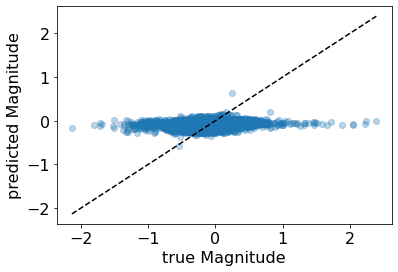

In [508]:
plt.scatter(y_train, lr.predict(X_train_enc), alpha=0.3)
grid = np.linspace(y_train.min(), y_train.max(), 1000)
plt.plot(grid, grid, '--k');
plt.xlabel("true Magnitude");
plt.ylabel("predicted Magnitude");

In [509]:
import lightgbm as lgb
lgb_reg = lgb.LGBMRegressor(random_state=999, verbose = -1)
lgb_reg.fit(X_train_enc, y_train);

In [510]:
lgb_reg.score(X_train_enc, y_train)

0.3570011084979893

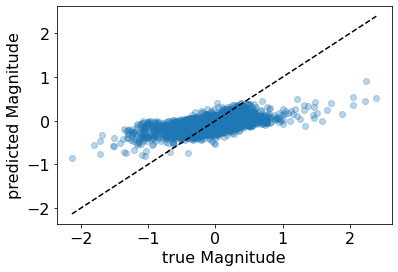

In [511]:
plt.scatter(y_train, lgb_reg.predict(X_train_enc), alpha=0.3)
grid = np.linspace(y_train.min(), y_train.max(), 1000)
plt.plot(grid, grid, '--k');
plt.xlabel("true Magnitude");
plt.ylabel("predicted Magnitude");

In [512]:
from catboost import Pool, CatBoostRegressor
cbt = CatBoostRegressor(random_state=999, verbose = False)
cbt.fit(X_train_enc, y_train);

In [513]:
cbt.score(X_train_enc, y_train)

0.44875089129180146

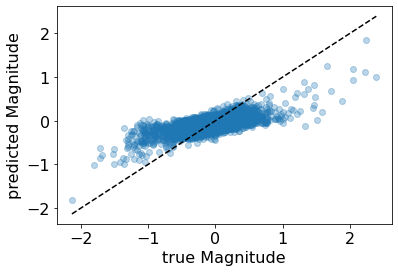

In [514]:
plt.scatter(y_train, cbt.predict(X_train_enc), alpha=0.3)
grid = np.linspace(y_train.min(), y_train.max(), 1000)
plt.plot(grid, grid, '--k');
plt.xlabel("true Magnitude");
plt.ylabel("predicted Magnitude");

In [515]:
xgb = XGBRegressor(random_state=999)
xgb.fit(X_train_enc, y_train);
xgb.score(X_train_enc, y_train)

0.6274644524285136

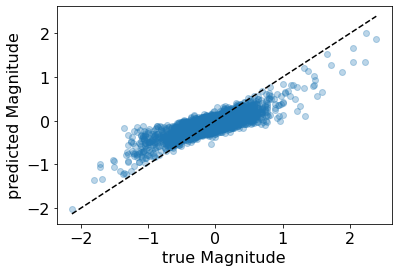

In [516]:
plt.scatter(y_train, xgb.predict(X_train_enc), alpha=0.3)
grid = np.linspace(y_train.min(), y_train.max(), 1000)
plt.plot(grid, grid, '--k');
plt.xlabel("true Magnitude");
plt.ylabel("predicted Magnitude");

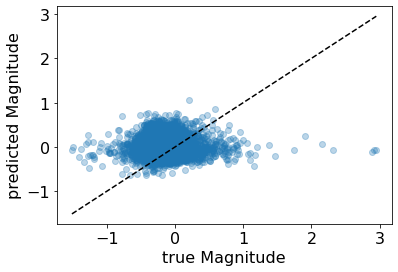

In [517]:
plt.scatter(y_test, xgb.predict(X_test_enc), alpha=0.3)
grid = np.linspace(y_test.min(), y_test.max(), 1000)
plt.plot(grid, grid, '--k');
plt.xlabel("true Magnitude");
plt.ylabel("predicted Magnitude");

### 12. The analysis on the `Regressor`s using `VotingRegressor`

In [ ]:
Identity_features = ['Name', 'Location']

# numeric_features = ['Seismogenic index', 'Number of earthquakes', 'Mc', 'SH', 'Sh', 'Sv', 'Pore pressure', 'S1-S3',
#                     'S2-S3', 'Average Injection Rate [m3/min]'
#                     , 'Temperature [C]','depth [km]']


numeric_features = ['Pore pressure', 'S1-S3',
                    'S2-S3'
                    ,'depth [km]']
target = 'b-value'


In [ ]:
from sklearn.compose import ColumnTransformer


y_train = df_all_nan [target]

pipe_num = Pipeline([
    ('impute', SimpleImputer(strategy='mean')),
    ('num', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('num', pipe_num, numeric_features)
])


rf = make_pipeline(preprocessor, RandomForestRegressor(random_state=111))
rf.fit(df_all_nan, y_train);



In [ ]:
from catboost import Pool, CatBoostRegressor

In [ ]:
# ??CatBoostRegressor

In [ ]:
import lightgbm as lgb

In [ ]:
# ??lgb.LGBMRegressor

In [ ]:
regressors = {
    'linear regression' : make_pipeline(preprocessor, Ridge()),
    'decision tree' : make_pipeline(preprocessor, DecisionTreeRegressor()),
    'random forest' : make_pipeline(preprocessor, RandomForestRegressor(random_state=999)),
    'XGBoost' : make_pipeline(preprocessor, XGBRegressor(random_state=999)),
    'catboost regressor' : make_pipeline(preprocessor, CatBoostRegressor(random_state=999, verbose = False)),
    'lgb regressor' : make_pipeline(preprocessor, lgb.LGBMRegressor(random_state=999, verbose = -1))
}

In [ ]:
# regressors = {
#     'linear regression' : make_pipeline(preprocessor, Ridge()),
#     'decision tree' : make_pipeline(preprocessor, DecisionTreeRegressor()),
#     'random forest' : make_pipeline(preprocessor, RandomForestRegressor(random_state=999)),
#     'XGBoost' : make_pipeline(preprocessor, XGBRegressor(random_state=999)),
#     'catboost regressor' : make_pipeline(preprocessor, CatBoostRegressor(random_state=999, verbose = False)),
#     'lgb regressor' : make_pipeline(preprocessor, lgb.LGBMRegressor(objective='regression', 
#                        num_leaves=6,
#                        learning_rate=0.01, 
#                        n_estimators=7000,
#                        max_bin=200, 
#                        bagging_fraction=0.8,
#                        bagging_freq=4, 
#                        bagging_seed=8,
#                        feature_fraction=0.2,
#                        feature_fraction_seed=8,
#                        min_sum_hessian_in_leaf = 11, random_state=999, verbose =-1))
# }

In [ ]:
from sklearn.model_selection import LeaveOneOut

In [ ]:
results_dict = {name: cross_validate_std(regressor, df_all_nan, y_train, return_train_score=True, cv = LeaveOneOut()) for name, regressor in regressors.items()}

In [ ]:
results_df = pd.DataFrame(results_dict).T.sort_values(by=["test_score"], ascending=False)
results_df

In [ ]:
averaging_model = VotingRegressor(list(regressors.items()))

In [ ]:
averaging_model.fit(df_all_nan, y_train);

In [ ]:
cross_validate_std(averaging_model, df_all_nan, y_train, return_train_score=True)

In [ ]:
averaging_model.predict(df_all_nan[:5])[0]

In [ ]:
y_train[5]

In [ ]:
ex_num = 10
r = {name : regressor.predict(df_all_nan[:ex_num])[0] for name, regressor in averaging_model.named_estimators_.items()}
r = pd.DataFrame(r, index=["Prediction"]).T
r-y_train[ex_num]

### 13. The analysis on the `Regressor`s using `StackingRegressor`

In [ ]:
stacking_model = StackingRegressor(list(regressors.items()))

In [ ]:
stacking_model.fit(df_all_nan, y_train);

In [ ]:
cross_validate_std(stacking_model, df_all_nan, y_train, return_train_score=True)

In [ ]:
pd.DataFrame(data=stacking_model.final_estimator_.coef_, index=regressors.keys(), columns=["Coefficient"])

# DOTO
- Planning to use `pysurvival` analysis or `RandomSurvivalForest`, `CoxProportionalHazard` (the last one is a linear model). The first package is using `pytorch`.

In [231]:
pwd

'C:\\Users\\ali\\Desktop\\HW_CPSC330\\ToC2ME-master\\ToC2ME-master\\Igonin'

## Synthetic catalog

## Creating challenging FMD 

In [11]:
import numpy as np
import numpy as np

def omori_times(ncat, nevents, tmin, tmax, b, p=1., detectprob = None):
    """
    creates ncat synthetic realizations of an Omori decay in seismicity
    parameters are nevents (number of events), tmin (minimum catalog time, main shock is t=0)
    tmax (maximum catalog time), b (Omori time offset, R \propto 1/(b+t)^p)
    Inputs:
    ncat = number of realizations
    nevents = number of events per realization
    tmin = catalog start time (t=0 is main shock)
    tmax = catalog end time (t=0 is main shock)
    b, p = Omori parameters
    detectprob = function mapping event time to detection probability
    returns numpy array with shape (ncat, nevents)
    """

    assert(ncat > 0)
    assert(nevents > 0)
    assert(tmin > 0.)
    assert(tmax > tmin)
    assert(b > 0.)
    assert(p > 0.)

    if detectprob is None:
        detectprob = lambda x: 1.

    acceptedtimes = []

    for i in range(nevents*ncat):

        while True:

            times = np.random.random()

            if p == 1.:
                times = tmin + (b+tmin)*(((b+tmax)/(b+tmin))**times - 1.)
            else:
                times = -b + ((1.-times)/(b+tmin)**(p-1.)+times/(b+tmax)**(p-1.))**(-1./(p-1.))

            detect = detectprob(times)

            if detect >= np.random.random():
                acceptedtimes.append(times)
                break

    times = np.reshape(np.array(acceptedtimes), (ncat, nevents))

    times = np.sort(times)

    return times

def random_times(nevents, tmin = 0., tmax = 100.):
    "generates a random sequence of nevents events"

    times = tmin + (tmax-tmin)*np.random.random(nevents)
    times = np.sort(times)

    return times

def random_magnitudes(nevents, mmin, mmax, b = 1.):
    "generates array of length nevents of magnitude values for a GR distribution given min and max magnitudes and b"

    return mmin-1./b*np.log(1.-np.random.random(nevents)*(1.-10.**(-b*(mmax-mmin))))/np.log(10.)


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def fmd_mod(mag, mbin):
    '''
    This function gets the vector of the magnitudes as the first argument and bin size of the magniutde as the second argument.
    It returns a tuple of three elements.
    Each element is a numpy array. 
    The first array is the the magnitude range vector according to the bin size and max and min magnitude.
    The second one is the cummulative number of magnitudes based on the last element.
    The third one is the non-cummulative number of events based on the magnitude vector.
    
    
    '''
    magnitudes_sorted = np.array( sorted( mag ) )
    mag_start = magnitudes_sorted[0] - mbin
    mag_end = magnitudes_sorted[-1] + mbin
    mag_bin_count = int( np.ceil( ( mag_end - mag_start ) / mbin ) )
    hist_n, hist_bins = np.histogram( magnitudes_sorted, 
            mag_bin_count, (mag_start, mag_end) )
    
    # combine fmd output
        # row 0: M bin values, 
        # row 1: histogram numbers,
        # row 2: cumulated histogram numbers
    fmd = np.vstack( ( hist_bins[:-1], hist_n, 
            hist_n[::-1].cumsum()[::-1] ) )
    return fmd

def computeGR_parm(mag, mbin):
    """Compute Gutenberg-Richter statistics."""

        # set completeness magnitude using maximumcurvature method
        # get largest value from non-cumulative FMD
            # left edge of bin
    fmd = fmd_mod(mag, mbin)
    binsize = mbin
    max_frequency_idx = np.argmax( fmd[1, :] )
    Mc = fmd[0, max_frequency_idx]
    magnitudes_sorted = np.array( sorted( mag ) )
    # select only events with magnitudes above completeness
    sel = ( magnitudes_sorted[:] >= Mc )
    magAboveCompleteness = magnitudes_sorted[sel.T]
    # abscissae for G-R fit, magnitudes above completeness
    sel = ( fmd[0, :] >= Mc )
    magnitudes_fit = fmd[0, sel.T]
    
    """This function computes Gutenberg-Richter a, b parameters, and the
    standard deviation of b.
    Adapted from the ZMAP function calc_bmemag:
    Matlab Format

    % Calculate the minimum and mean magnitude, length of catalog
    nLen = length(vMag);
    fMinMag = min(vMag);
    fMeanMag = mean(vMag);
    
    % Calculate the b-value (maximum likelihood)
    fBValue = (1/(fMeanMag-(fMinMag-(fBinning/2))))*log10(exp(1));
    
    % Calculate the standard deviation 
    fStdDev = (sum((vMag-fMeanMag).^2))/(nLen*(nLen-1));
    fStdDev = 2.30 * sqrt(fStdDev) * fBValue^2;
    
    % Calculate the a-value
    fAValue = log10(nLen) + fBValue * fMinMag;

    Input: 
        magnitudes      numpy array of sorted magnitudes (already cut at completeness
                        magnitude value)
        magnitudes_fit  magnitude array on which the fit is computed            
        binsize         size of magnitude bins
        timeSpan        time span of events in years (for normalizing a value to 
                        annual rate)

    Returns dict gr.
    """
    Mmean = magAboveCompleteness.mean()
    binsize = mbin
    magCtr = len(magAboveCompleteness )
    Mmin = magAboveCompleteness[0]
    Mmax = magAboveCompleteness[-1]
    Mrange = Mmax - Mmin
    ### Computing the values
    bValue = np.log10(np.e)/ (Mmean - (Mmin - 0.5*binsize))
    aValue = np.log10(magCtr) + bValue * Mmin
    
    StdDev = 2.3 * np.power( bValue, 2) * np.sqrt (sum(np.power( ( magAboveCompleteness - Mmean) , 2 ) ) / (magCtr * (magCtr -1)))
    
    gr_fit = np.power(10,( ( -bValue * magnitudes_fit) + aValue ) )
    
    gr = np.vstack( ( bValue, aValue, StdDev, Mc, Mmax, Mrange) ) 
    return gr, gr_fit
    
def GR_plot (mag, mbin, vinj):
    """
    This function plots the Gutenberg-Richter evaluation of the catalog magnitude distribution
    vinj is the total injected volume (cubic m) used for the calculation of the seismogenic index
    
    """
    fmd_mod(mag, mbin)
    computeGR_parm(mag, mbin)
    binsize = mbin
    import matplotlib as mpl
    mpl.rcParams["font.size"] = 16
    f, ax = plt.subplots(1, figsize = (15,10) )
    ax.semilogy(fmd_mod(mag, binsize) [0][fmd_mod(mag, binsize) [0] >= computeGR_parm(mag, binsize)[0][3][0] ], computeGR_parm(mag, binsize)[-1], label='GR fit line');
    ax.semilogy(fmd_mod(mag, binsize) [0], fmd_mod(mag, binsize) [1],'rs', label = 'Discrete number of events')
    ax.semilogy(fmd_mod(mag, binsize) [0], fmd_mod(mag, binsize) [2],'gs', label = 'Cummulative number of events')
    nn_d = 2
    GR_parameters = '$b$-value = ' + str(round(computeGR_parm(mag,binsize)[0][0][0],nn_d)) + ' ± ' + str(round(computeGR_parm(mag,binsize)[0][2][0],nn_d)) \
    + '\n \n a-value = ' + str(round(computeGR_parm(mag,binsize)[0][1][0],nn_d)) \
    + '\n \n $\Sigma$ = ' + str(round((computeGR_parm(mag,binsize)[0][1][0]) - np.log10(vinj),nn_d)) \
    + '\n \n maximum curvature method Mc =' + str(round(computeGR_parm(mag,binsize)[0][3][0],nn_d)) \
    + '\n \n $AM$-value =' + str(round(np.log10(computeGR_parm(mag,binsize)[0][0][0]/ 10 **(computeGR_parm(mag,binsize)[0][4][0])),nn_d)) \
    + '\n \n maximum magnitude =' + str(round(computeGR_parm(mag,binsize)[0][4][0],nn_d)) \
    + '\n \n magnitude range =' + str(round(computeGR_parm(mag,binsize)[0][5][0],nn_d))

    ax.text(0.5, -0.15,GR_parameters , horizontalalignment='center',
         verticalalignment='center',  bbox=dict(facecolor='w', alpha=0.5), transform=plt.gcf().transFigure) # The first two number of text is controling the location of the box which represents the b-value a-value
    plt.grid(True, which="both", ls="-")
    plt.ylim(1)
    plt.xlabel("Magnitude [Mw]")
    plt.ylabel("Number of Events")
    plt.legend(loc='upper right')
#     plt.show() It would not allow to save the figure so I have to use plt.show() to print the figure when using this fucntion
    return ax

In [215]:
catalog_1 = random_magnitudes(1000, -1, 6, 0.8)

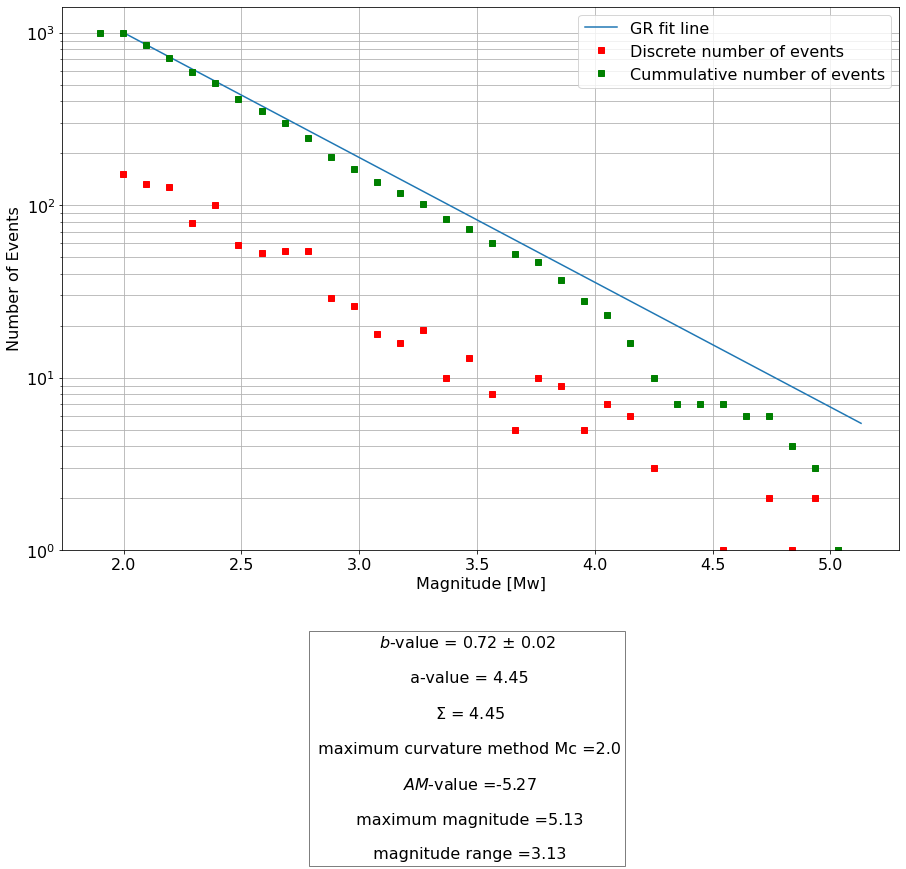

In [223]:
GR_plot(catalog,0.1, 1);
save_results_to = 'C:/Users/ali/Desktop/GSBC_analysis/Data_SS_R_analysis/Montney/plots/'
# plt.savefig(save_results_to + 'R_FMD_D80_S45.png',bbox_inches = 'tight', dpi=300)

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit, cross_validate
pd.set_option('display.max_rows', 6)
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16,
                     'axes.labelweight': 'bold',
                     'figure.figsize': (8,6)})

#### required functions for timeseries

In [19]:
# Custom functions
def lag_df(df, lag, cols):
    return df.assign(**{f"{col}-{n}": df[col].shift(n) for n in range(1, lag + 1) for col in cols})


def ts_predict(input_data, model, n=20, responses=1):
    predictions = []
    n_features = input_data.size
    for _ in range(n):

        predictions = np.append(predictions,
                                model.predict(input_data.reshape(1, -1)))  # make prediction
        input_data = np.append(predictions[-responses:],
                               input_data[:n_features-responses])  # new input data
    return predictions.reshape((-1, responses))


def plot_ts(ax, df_train, df_test, predictions, xlim, response_cols):
    col_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    for i, col in enumerate(response_cols):
        ax.plot(df_train[col], '-', c=col_cycle[i], label = f'Train {col}')
        ax.plot(df_test[col], '--', c=col_cycle[i], label = f'Validation {col}')
        ax.plot(np.arange(df_train.index[-1] + 1,
                          df_train.index[-1] + 1 + len(predictions)),
                predictions[:,i], c=col_cycle[-i-2], label = f'Prediction {col}')
    ax.set_xlim(0, xlim+1)
    ax.set_title(f"Train Shape = {len(df_train)}, Validation Shape = {len(df_test)}",
                fontsize=16)
    ax.set_ylabel(df_train.columns[0])

        
def plot_forecast(ax, df_train, predictions, xlim, response_cols):
    col_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    for i, col in enumerate(response_cols):
        ax.plot(df_train[col], '-', c=col_cycle[i], label = f'Train {col}')
        ax.plot(np.arange(df_train.index[-1] + 1,
                          df_train.index[-1] + 1 + len(predictions)),
                predictions[:,i], '-', c=col_cycle[-i-2], label = f'Prediction {col}') ### I added alpha to see if the predictions are more visible
    ax.set_xlim(0, xlim+len(predictions))
    ax.set_title(f"{len(predictions)}-step forecast",
                    fontsize=16)
    ax.set_ylabel(response_cols)
    
def create_rolling_features(df, columns, windows=[6, 12]):
    for window in windows:
        df["rolling_mean_" + str(window)] = df[columns].rolling(window=window).mean()
        df["rolling_std_" + str(window)] = df[columns].rolling(window=window).std()
        df["rolling_var_" + str(window)] = df[columns].rolling(window=window).var()
        df["rolling_min_" + str(window)] = df[columns].rolling(window=window).min()
        df["rolling_max_" + str(window)] = df[columns].rolling(window=window).max()
        df["rolling_min_max_ratio_" + str(window)] = df["rolling_min_" + str(window)] / df["rolling_max_" + str(window)]
        df["rolling_min_max_diff_" + str(window)] = df["rolling_max_" + str(window)] - df["rolling_min_" + str(window)]

    df = df.replace([np.inf, -np.inf], np.nan)    
    df.fillna(0, inplace=True)
    return df

## Splitting the data into `train` (70%) and `test` (30%)

In [20]:
split = int(len(df_B['Time Since First Event (Hours)'])* 0.7)
# df_B['Time Since First Event (Hours)']
df_train, df_test = df_B.iloc[:split], df_B.iloc[split:]

## How to manually split the data for cross validation

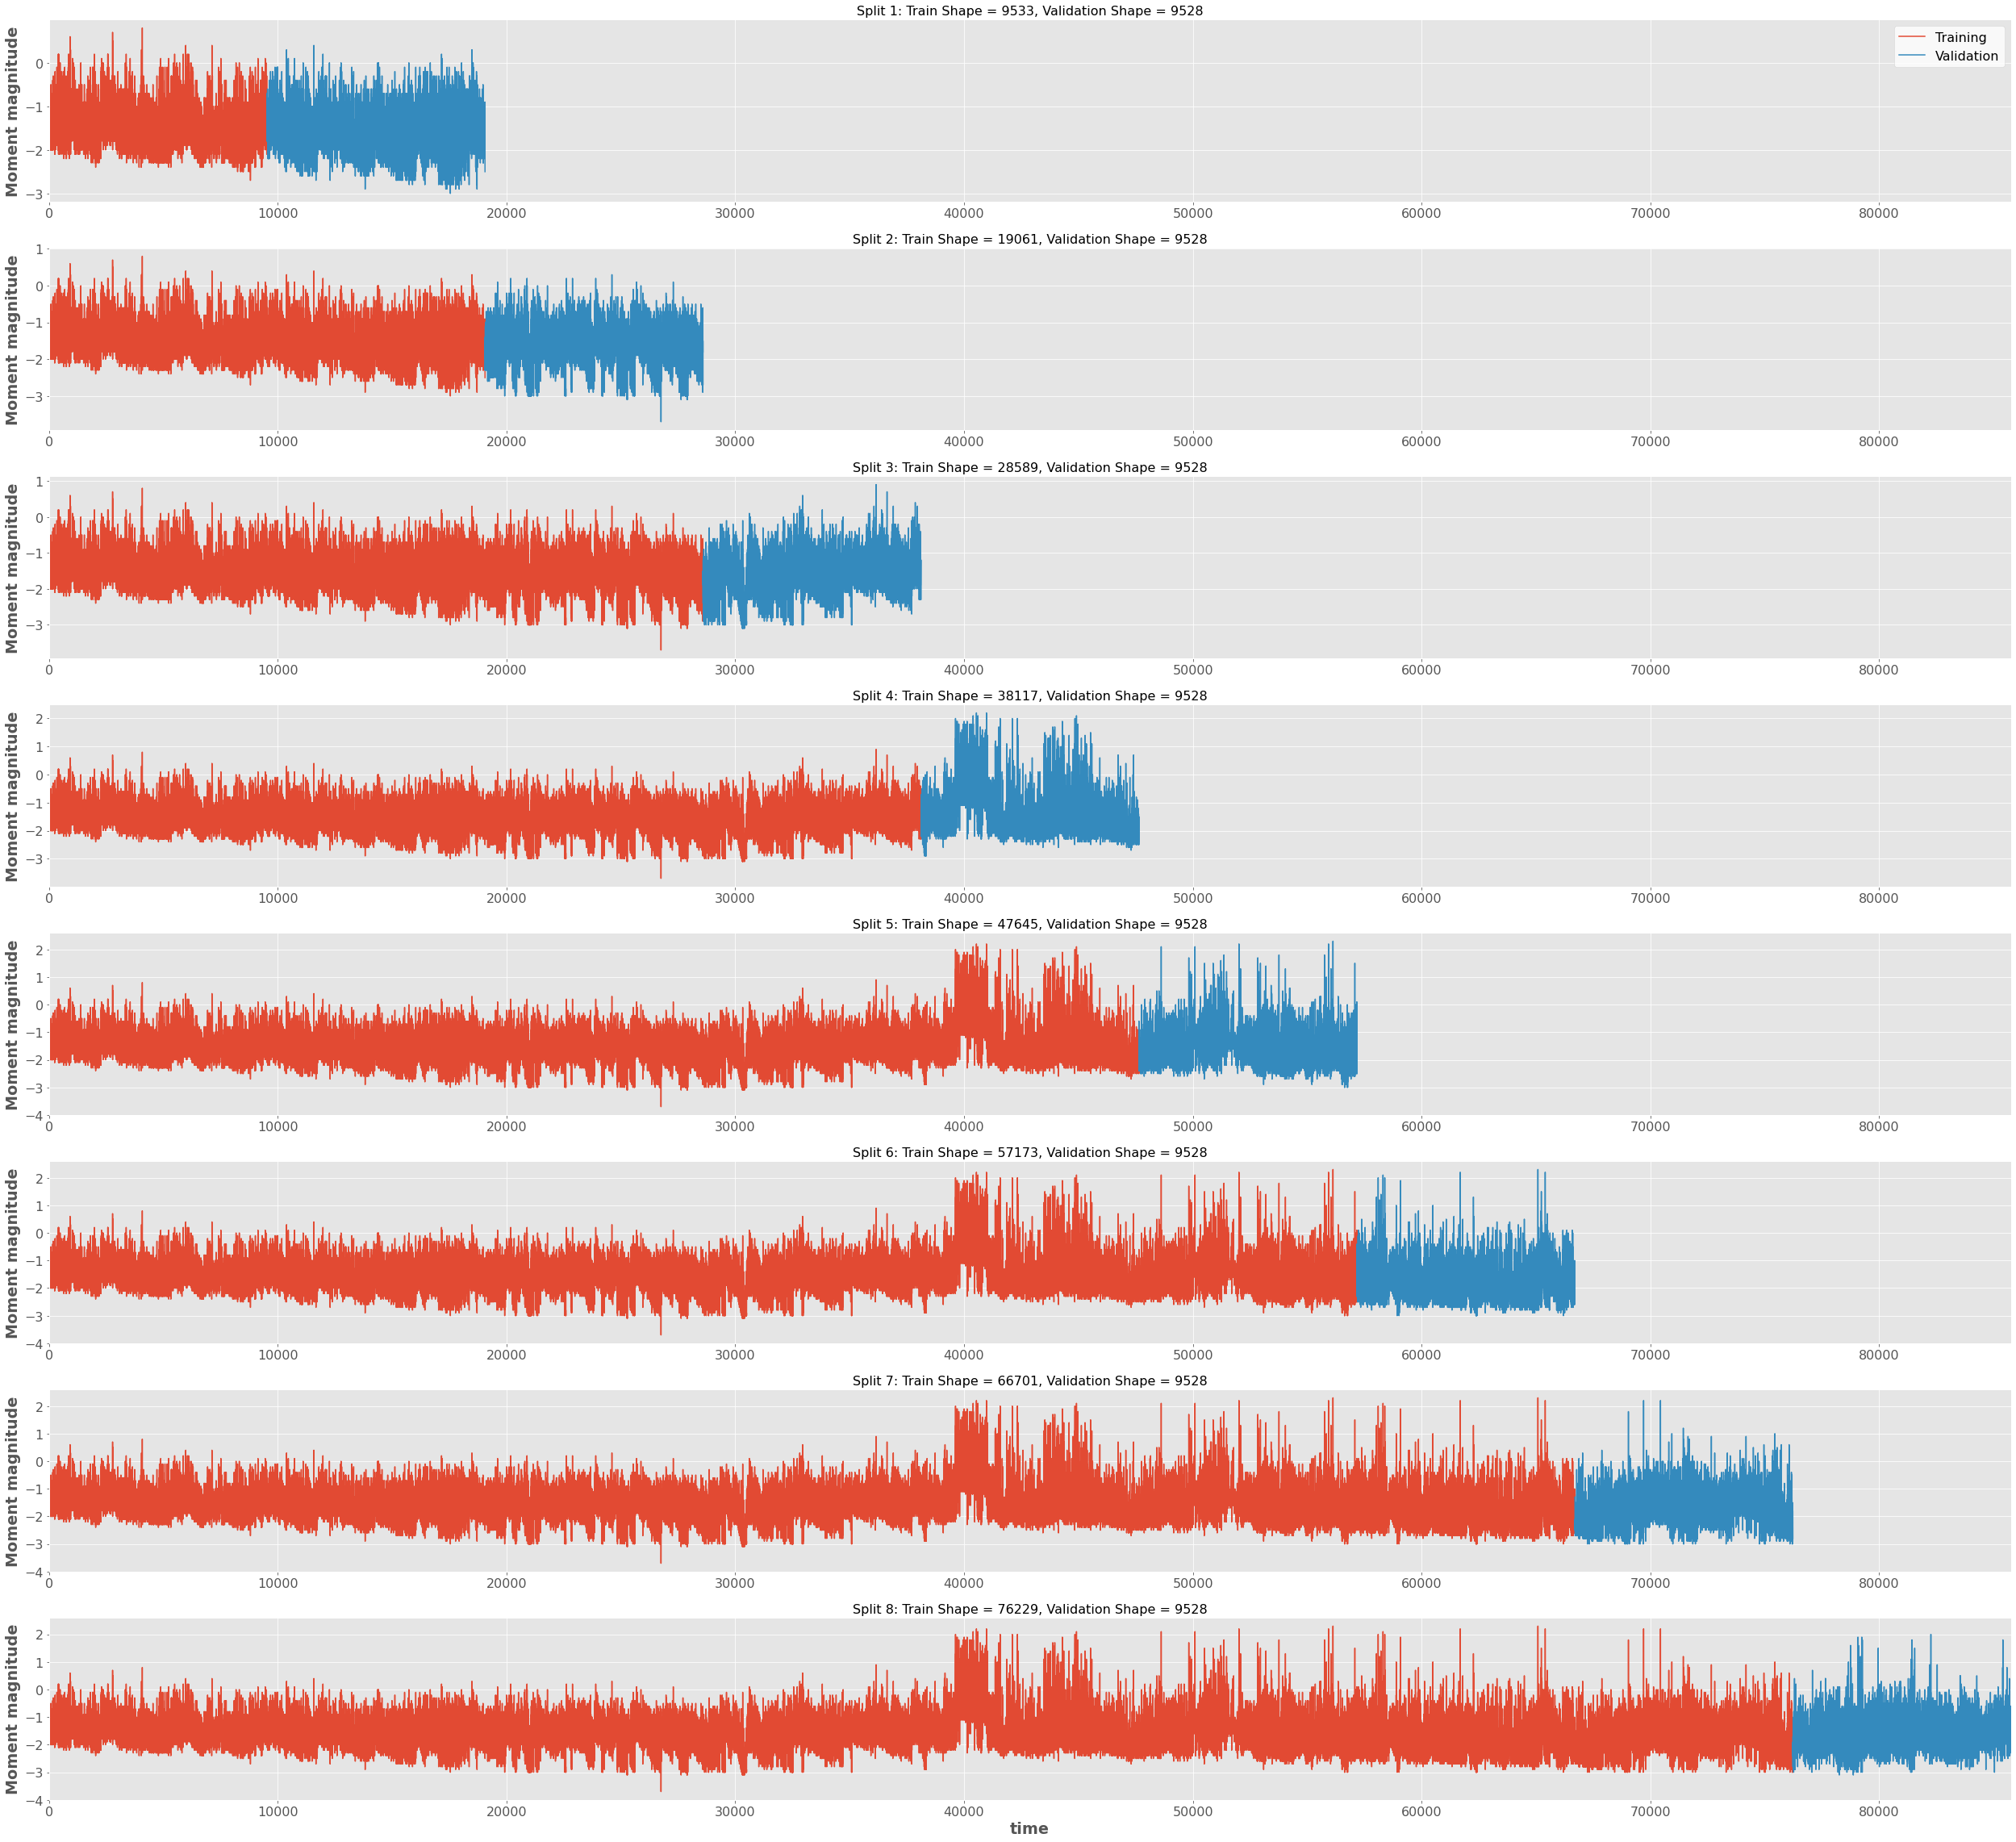

In [21]:
n_splits = 8
fig, ax = plt.subplots(n_splits, 1, figsize=(35,4*n_splits))
tscv = TimeSeriesSplit(n_splits=n_splits)
for i, (train_index, test_index) in enumerate(tscv.split(df_train)):
    df_valid_train, df_valid_test = df_train.iloc[train_index], df_train.iloc[test_index]
    ax[i].plot(df_valid_train['Moment_Magnitude'], label = 'Training')
    ax[i].plot(df_valid_test['Moment_Magnitude'], label = 'Validation')
    ax[i].set_xlim(0, len(df_train))
    ax[i].set_title(f"Split {i+1}: Train Shape = {len(train_index)}, Validation Shape = {len(test_index)}",
                    fontsize=16)
    ax[i].set_ylabel('Moment magnitude')
ax[0].legend(facecolor='w')
ax[i].set_xlabel('time')
fig.tight_layout()

### Preparing the data

In [22]:
import time

t0 = time.time()
mag_cat = df_train['Moment_Magnitude']
b_value_200_window = np.zeros(len(mag_cat)) + np.inf 
b_error_200_window = np.zeros(len(mag_cat)) + np.inf 
AM_value_200_window = np.zeros(len(mag_cat)) + np.inf 

cut_mag_200_window = np.zeros(len(mag_cat)) + np.inf 
a_value_200_window = np.zeros(len(mag_cat)) + np.inf

mag_range_200_window = np.zeros(len(mag_cat)) + np.inf 
max_mag_200_window = np.zeros(len(mag_cat)) + np.inf 

mbin = 0.1
for i in range(200,len(mag_cat+2)):
    b_value_200_window[i-1] = computeGR_parm(mag_cat[i-200: i-1], mbin)[0][0][0] 
    b_error_200_window[i-1] = computeGR_parm(mag_cat[i-200: i-1], mbin)[0][2][0]
    cut_mag_200_window[i-1] = computeGR_parm(mag_cat[i-200: i-1], mbin)[0][3][0]
    a_value_200_window[i-1] = computeGR_parm(mag_cat[i-200: i-1], mbin)[0][1][0]
    mag_range_200_window[i-1] = computeGR_parm(mag_cat[i-200: i-1], mbin)[0][5][0]
    max_mag_200_window[i-1] = computeGR_parm(mag_cat[i-200: i-1], mbin)[0][4][0] 
    AM_value_200_window [i-1] = np.log10(computeGR_parm(mag_cat[i-200: i-1], mbin)[0][0][0]/10**(computeGR_parm(mag_cat[i-200: i-1], mbin)[0][4][0]))

t1 = time.time()

total = t1-t0
print(total)

214.45013308525085


### creating `dataframe` out of the generated `np.array`

In [521]:
df_train_enc = pd.DataFrame(AM_value_200_window, columns = ['AM-value'])

In [522]:
def lag_df(df, lag, cols):
    '''
    shift back lag time period
    '''
    return df.assign(**{f"{col}-{n}": df[col].shift(n) for n in range(1, lag +1) for col in cols})

In [523]:
pd.DataFrame(AM_value_200_window)
lag = 200 ### What was happening 200 AM-value before
df_train_enc_lag = lag_df(df_train_enc, lag=lag, cols=['AM-value'])
df_train_enc_lag

AM-value  AM-value-1  AM-value-2  AM-value-3  AM-value-4  AM-value-5  \
0           inf         NaN         NaN         NaN         NaN         NaN   
1           inf         inf         NaN         NaN         NaN         NaN   
2           inf         inf         inf         NaN         NaN         NaN   
...         ...         ...         ...         ...         ...         ...   
85754 -0.876825   -0.883229   -0.885949   -0.886760   -0.888101   -0.886088   
85755 -0.867652   -0.876825   -0.883229   -0.885949   -0.886760   -0.888101   
85756       inf   -0.867652   -0.876825   -0.883229   -0.885949   -0.886760   

       AM-value-6  AM-value-7  AM-value-8  AM-value-9  ...  AM-value-191  \
0             NaN         NaN         NaN         NaN  ...           NaN   
1             NaN         NaN         NaN         NaN  ...           NaN   
2             NaN         NaN         NaN         NaN  ...           NaN   
...           ...         ...         ...         ...  ...           ...   
85754   -0.887556   -0.891525   -0.885558   -0.884221  ...     -1.870019   
85755   -0.886088   -0.887556   -0.891525   -0.885558  ...     -1.871405   
85756   -0.888101   -0.886088   -0.887556   -0.891525  ...     -1.868510   

       AM-value-192  AM-value-193  AM-value-194  AM-value-195  AM-value-196  \
0               NaN           NaN           NaN           NaN           NaN   
1               NaN           NaN           NaN           NaN           NaN   
2               NaN           NaN           NaN           NaN           NaN   
...             ...           ...           ...           ...           ...   
85754     -1.864150     -1.866839     -1.864741     -1.862660     -1.858519   
85755     -1.870019     -1.864150     -1.866839     -1.864741     -1.862660   
85756     -1.871405     -1.870019     -1.864150     -1.866839     -1.864741   

       AM-value-197  AM-value-198  AM-value-199  AM-value-200  
0               NaN           NaN           NaN           NaN  
1               NaN           NaN           NaN           NaN  
2               NaN           NaN           NaN           NaN  
...             ...           ...           ...           ...  
85754     -1.859706     -1.854592     -1.845435     -1.843581  
85755     -1.858519     -1.859706     -1.854592     -1.845435  
85756     -1.862660     -1.858519     -1.859706     -1.854592  

[85757 rows x 201 columns]

#### Replacing the `inf` with `Nan`  

In [524]:
df_train_enc_lag= df_train_enc_lag.replace(np.inf, np.nan);
df_train_enc_lag

AM-value  AM-value-1  AM-value-2  AM-value-3  AM-value-4  AM-value-5  \
0           NaN         NaN         NaN         NaN         NaN         NaN   
1           NaN         NaN         NaN         NaN         NaN         NaN   
2           NaN         NaN         NaN         NaN         NaN         NaN   
...         ...         ...         ...         ...         ...         ...   
85754 -0.876825   -0.883229   -0.885949   -0.886760   -0.888101   -0.886088   
85755 -0.867652   -0.876825   -0.883229   -0.885949   -0.886760   -0.888101   
85756       NaN   -0.867652   -0.876825   -0.883229   -0.885949   -0.886760   

       AM-value-6  AM-value-7  AM-value-8  AM-value-9  ...  AM-value-191  \
0             NaN         NaN         NaN         NaN  ...           NaN   
1             NaN         NaN         NaN         NaN  ...           NaN   
2             NaN         NaN         NaN         NaN  ...           NaN   
...           ...         ...         ...         ...  ...           ...   
85754   -0.887556   -0.891525   -0.885558   -0.884221  ...     -1.870019   
85755   -0.886088   -0.887556   -0.891525   -0.885558  ...     -1.871405   
85756   -0.888101   -0.886088   -0.887556   -0.891525  ...     -1.868510   

       AM-value-192  AM-value-193  AM-value-194  AM-value-195  AM-value-196  \
0               NaN           NaN           NaN           NaN           NaN   
1               NaN           NaN           NaN           NaN           NaN   
2               NaN           NaN           NaN           NaN           NaN   
...             ...           ...           ...           ...           ...   
85754     -1.864150     -1.866839     -1.864741     -1.862660     -1.858519   
85755     -1.870019     -1.864150     -1.866839     -1.864741     -1.862660   
85756     -1.871405     -1.870019     -1.864150     -1.866839     -1.864741   

       AM-value-197  AM-value-198  AM-value-199  AM-value-200  
0               NaN           NaN           NaN           NaN  
1               NaN           NaN           NaN           NaN  
2               NaN           NaN           NaN           NaN  
...             ...           ...           ...           ...  
85754     -1.859706     -1.854592     -1.845435     -1.843581  
85755     -1.858519     -1.859706     -1.854592     -1.845435  
85756     -1.862660     -1.858519     -1.859706     -1.854592  

[85757 rows x 201 columns]

#### Dropping `Nan`

In [525]:
df_train_enc_lag = df_train_enc_lag.dropna()
df_train_enc_lag

AM-value  AM-value-1  AM-value-2  AM-value-3  AM-value-4  AM-value-5  \
399    0.032437    0.034240    0.032511    0.032511    0.034015    0.036535   
400    0.024906    0.032437    0.034240    0.032511    0.032511    0.034015   
401    0.023574    0.024906    0.032437    0.034240    0.032511    0.032511   
...         ...         ...         ...         ...         ...         ...   
85753 -0.883229   -0.885949   -0.886760   -0.888101   -0.886088   -0.887556   
85754 -0.876825   -0.883229   -0.885949   -0.886760   -0.888101   -0.886088   
85755 -0.867652   -0.876825   -0.883229   -0.885949   -0.886760   -0.888101   

       AM-value-6  AM-value-7  AM-value-8  AM-value-9  ...  AM-value-191  \
399      0.038560    0.039320    0.040839    0.040839  ...      0.273492   
400      0.036535    0.038560    0.039320    0.040839  ...      0.274645   
401      0.034015    0.036535    0.038560    0.039320  ...      0.274645   
...           ...         ...         ...         ...  ...           ...   
85753   -0.891525   -0.885558   -0.884221   -0.883042  ...     -1.864150   
85754   -0.887556   -0.891525   -0.885558   -0.884221  ...     -1.870019   
85755   -0.886088   -0.887556   -0.891525   -0.885558  ...     -1.871405   

       AM-value-192  AM-value-193  AM-value-194  AM-value-195  AM-value-196  \
399        0.274040      0.271310      0.269595      0.266877      0.263100   
400        0.273492      0.274040      0.271310      0.269595      0.266877   
401        0.274645      0.273492      0.274040      0.271310      0.269595   
...             ...           ...           ...           ...           ...   
85753     -1.866839     -1.864741     -1.862660     -1.858519     -1.859706   
85754     -1.864150     -1.866839     -1.864741     -1.862660     -1.858519   
85755     -1.870019     -1.864150     -1.866839     -1.864741     -1.862660   

       AM-value-197  AM-value-198  AM-value-199  AM-value-200  
399        0.260957      0.258293      0.255645      0.252488  
400        0.263100      0.260957      0.258293      0.255645  
401        0.266877      0.263100      0.260957      0.258293  
...             ...           ...           ...           ...  
85753     -1.854592     -1.845435     -1.843581     -1.842520  
85754     -1.859706     -1.854592     -1.845435     -1.843581  
85755     -1.858519     -1.859706     -1.854592     -1.845435  

[85357 rows x 201 columns]

### Cross validation using `RandomForestRegressor`

In [527]:
lag = 200  # you can vary the number of lagged features in the model
n_splits = 8  # you can vary the number of train/validation splits

response_col = ['AM-value']
df_train_enc_lag = lag_df(df_train_enc, lag, response_col).replace(np.inf, np.nan).dropna()

tscv = TimeSeriesSplit(n_splits=n_splits)  # define the splitter
model = RandomForestRegressor()  # define the model

cv = cross_validate(model,
                    X = df_train_enc_lag.drop(columns=response_col),
                    y = df_train_enc_lag[response_col[0]],
                    cv=tscv,
                    return_train_score=True)

pd.DataFrame({'split': range(n_splits),
              'train_r2': cv['train_score'],
              'validation_r2': cv['test_score']}).set_index('split')

train_r2  validation_r2
split                         
0      0.998647       0.966964
1      0.998208       0.958666
2      0.998096       0.953152
...         ...            ...
5      0.999301       0.973277
6      0.999224       0.984665
7      0.999128       0.984963

[8 rows x 2 columns]

In [571]:
pd.DataFrame({'split': range(n_splits),
              'train_r2': cv['train_score'],
              'validation_r2': cv['test_score']}).set_index('split').loc[:, 'validation_r2'].mean()

0.726944429058269

4598.061904668808


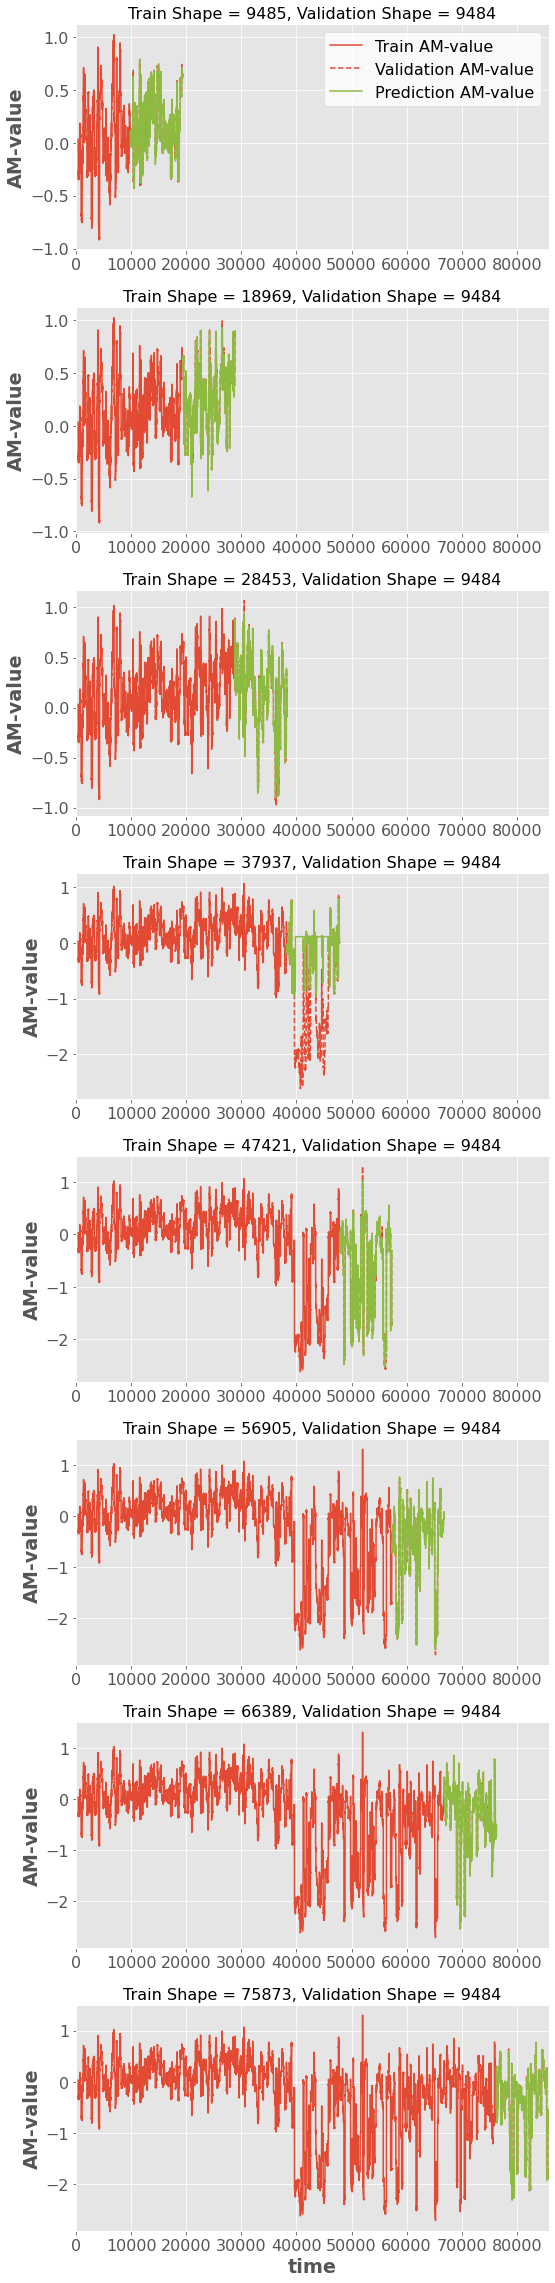

In [532]:
import time

t0 = time.time()

fig, ax = plt.subplots(n_splits, 1, figsize=(8,4*n_splits))
for i, (train_index, test_index) in enumerate(tscv.split(df_train_enc_lag)):
    df_valid_train, df_valid_test = df_train_enc_lag.iloc[train_index], df_train_enc_lag.iloc[test_index]
    model = RandomForestRegressor().fit(df_valid_train.drop(columns=response_col),
                                        df_valid_train[response_col[0]])  # train model
    # Prediction loop
    predictions = model.predict(df_valid_test.drop(columns=response_col))[:,None]

    # Plot
    plot_ts(ax[i], df_valid_train, df_valid_test, predictions, xlim=df_train_enc_lag.index[-1], response_cols=response_col)
ax[0].legend(facecolor='w')
ax[i].set_xlabel('time')
fig.tight_layout()

t1 = time.time()

total = t1-t0
print(total)

In [ ]:
df_train_enc = pd.DataFrame(AM_value_200_window, columns = ['AM-value'])
response_col = ['AM-value']
df_train_enc_lag = lag_df(df_train_enc, lag, response_col).replace(np.inf, np.nan).dropna()

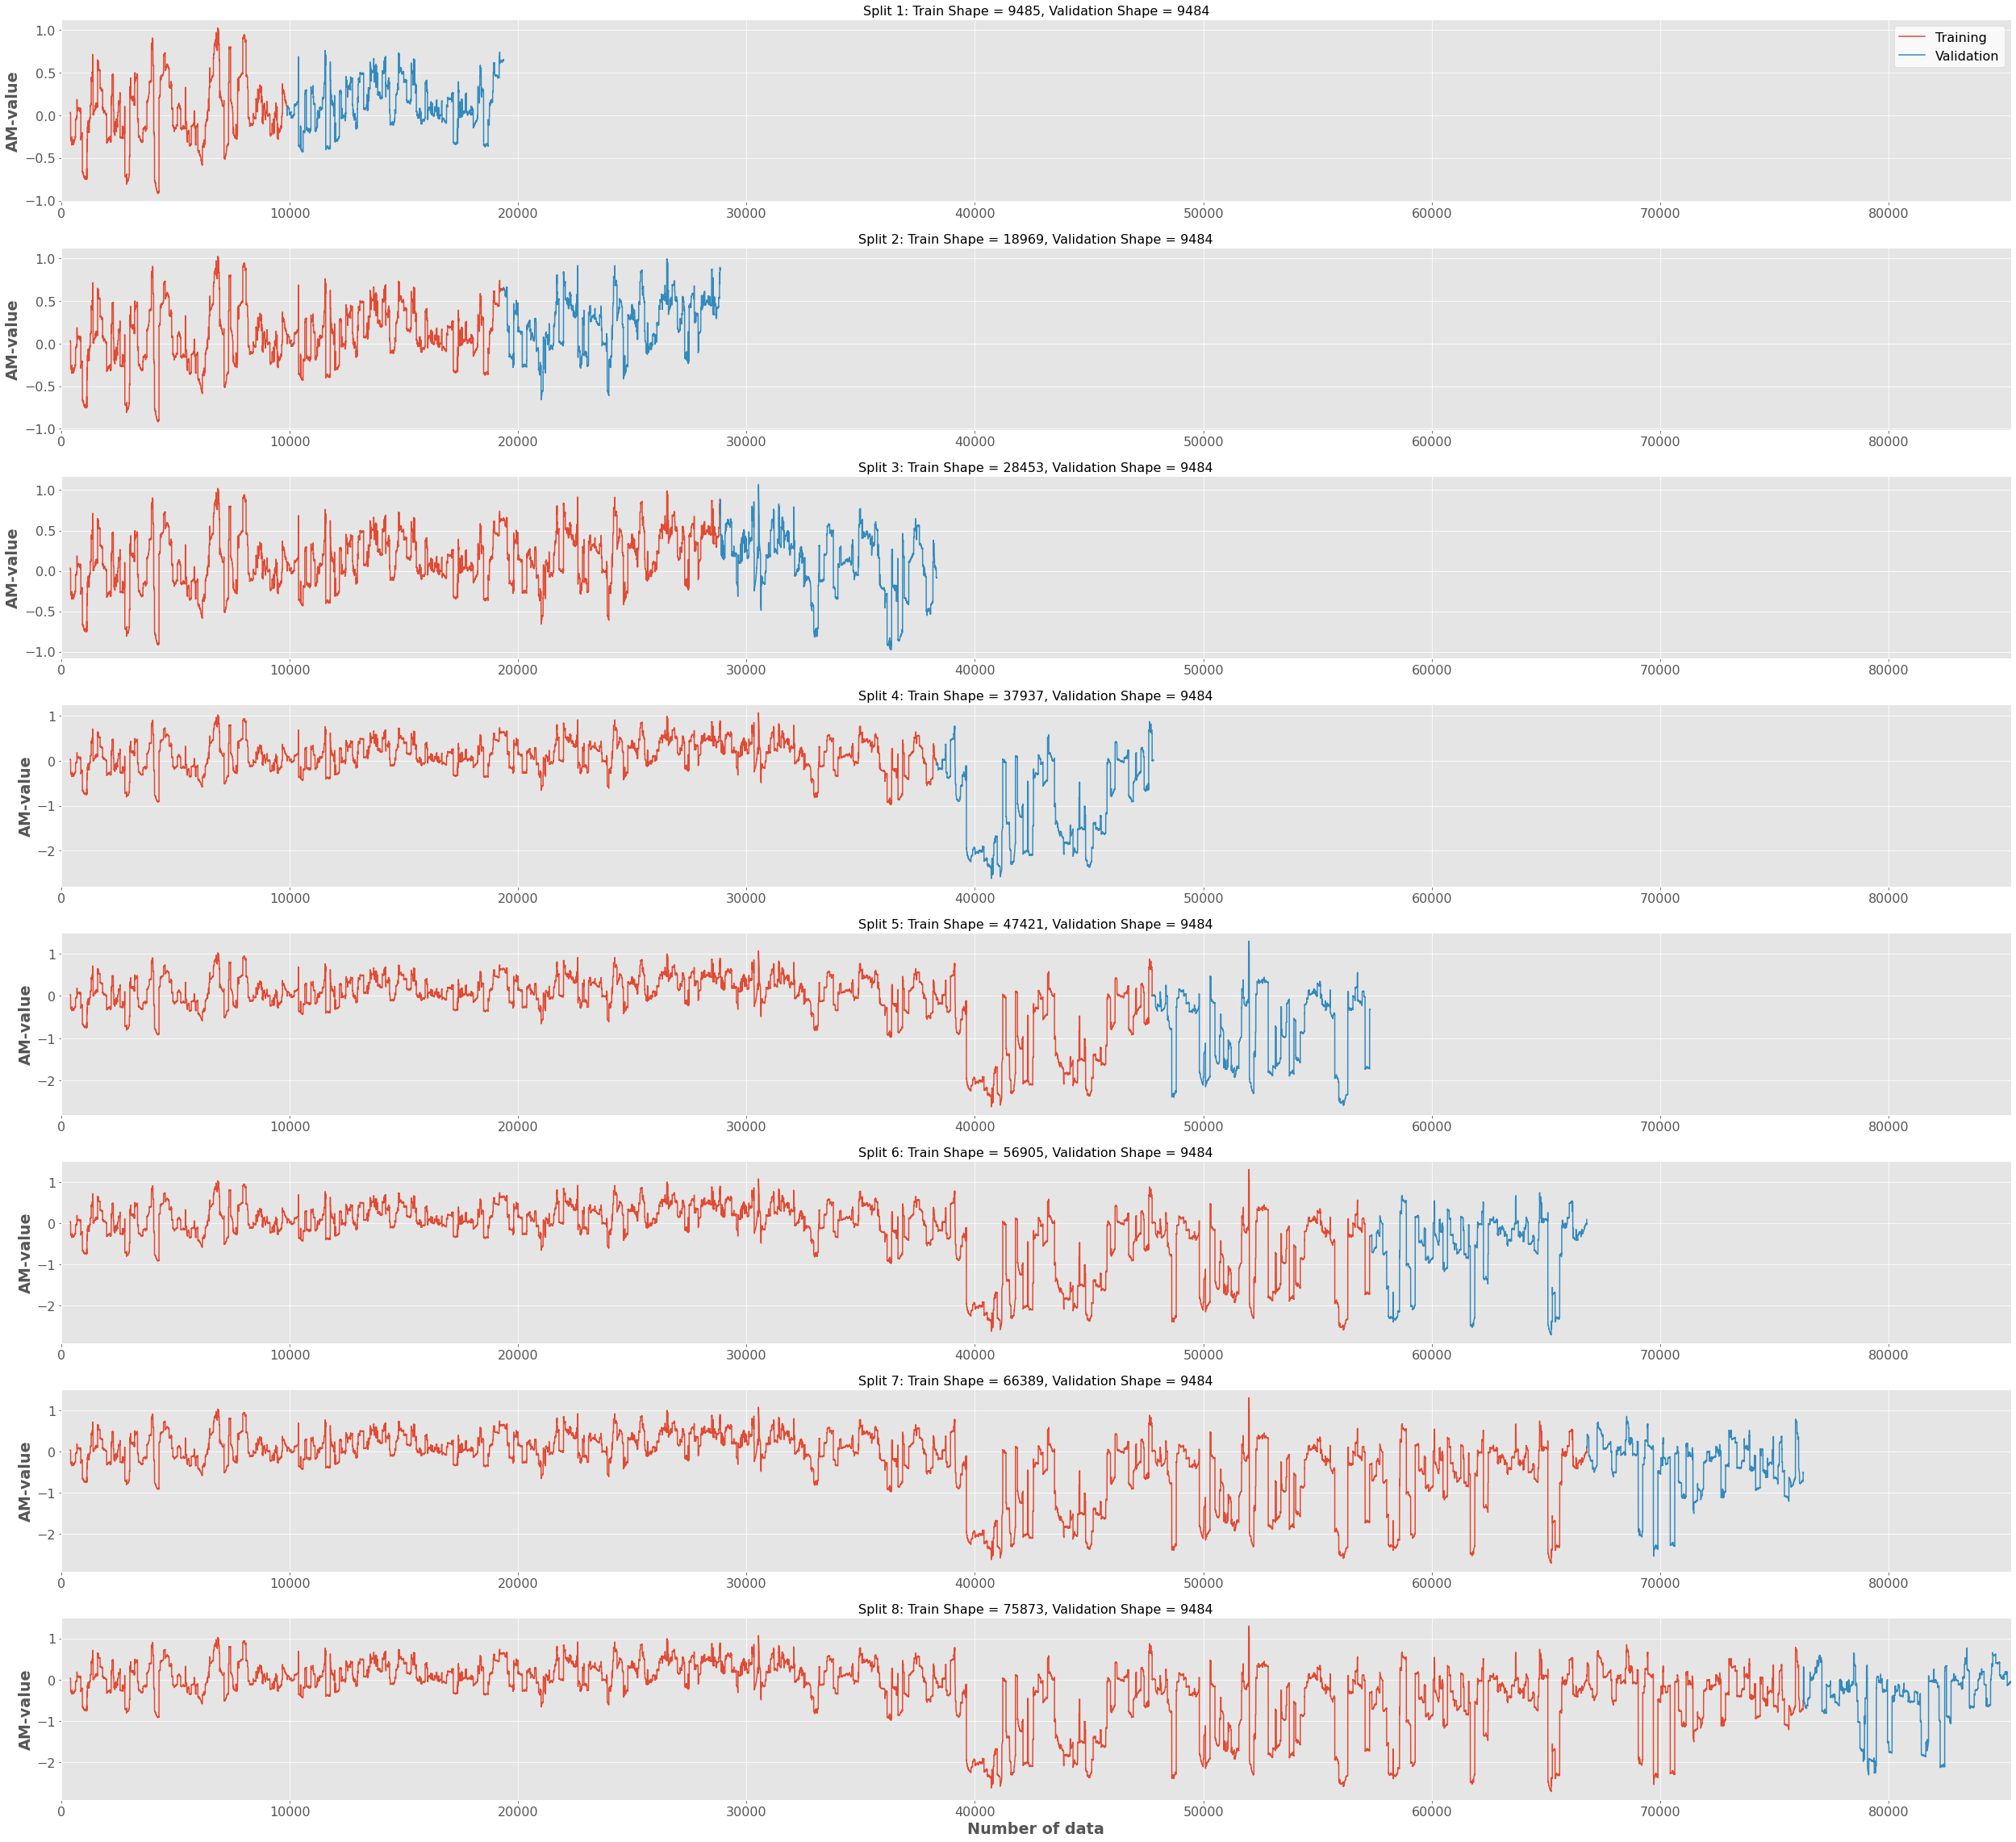

In [540]:
n_splits = 8
fig, ax = plt.subplots(n_splits, 1, figsize=(35,4*n_splits))
tscv = TimeSeriesSplit(n_splits=n_splits)
for i, (train_index, test_index) in enumerate(tscv.split(df_train_enc_lag)):
    df_valid_train, df_valid_test = df_train_enc_lag.iloc[train_index], df_train_enc_lag.iloc[test_index]
    ax[i].plot(df_valid_train['AM-value'], label = 'Training')
    ax[i].plot(df_valid_test['AM-value'], label = 'Validation')
    ax[i].set_xlim(0, len(df_train_enc_lag))
    ax[i].set_title(f"Split {i+1}: Train Shape = {len(train_index)}, Validation Shape = {len(test_index)}",
                    fontsize=16)
    ax[i].set_ylabel('AM-value')
ax[0].legend(facecolor='w')
ax[i].set_xlabel('Number of data')
fig.tight_layout()
save_results_to = 'D:/Phase_1_UBC/Conferences/GRL/b-value_dependency/Synthetic_catalogs/'
# plt.savefig(save_results_to + 'AM_CV_Split_catalog_Dataset_B.png',bbox_inches = "tight", dpi=100)

4762.30029129982


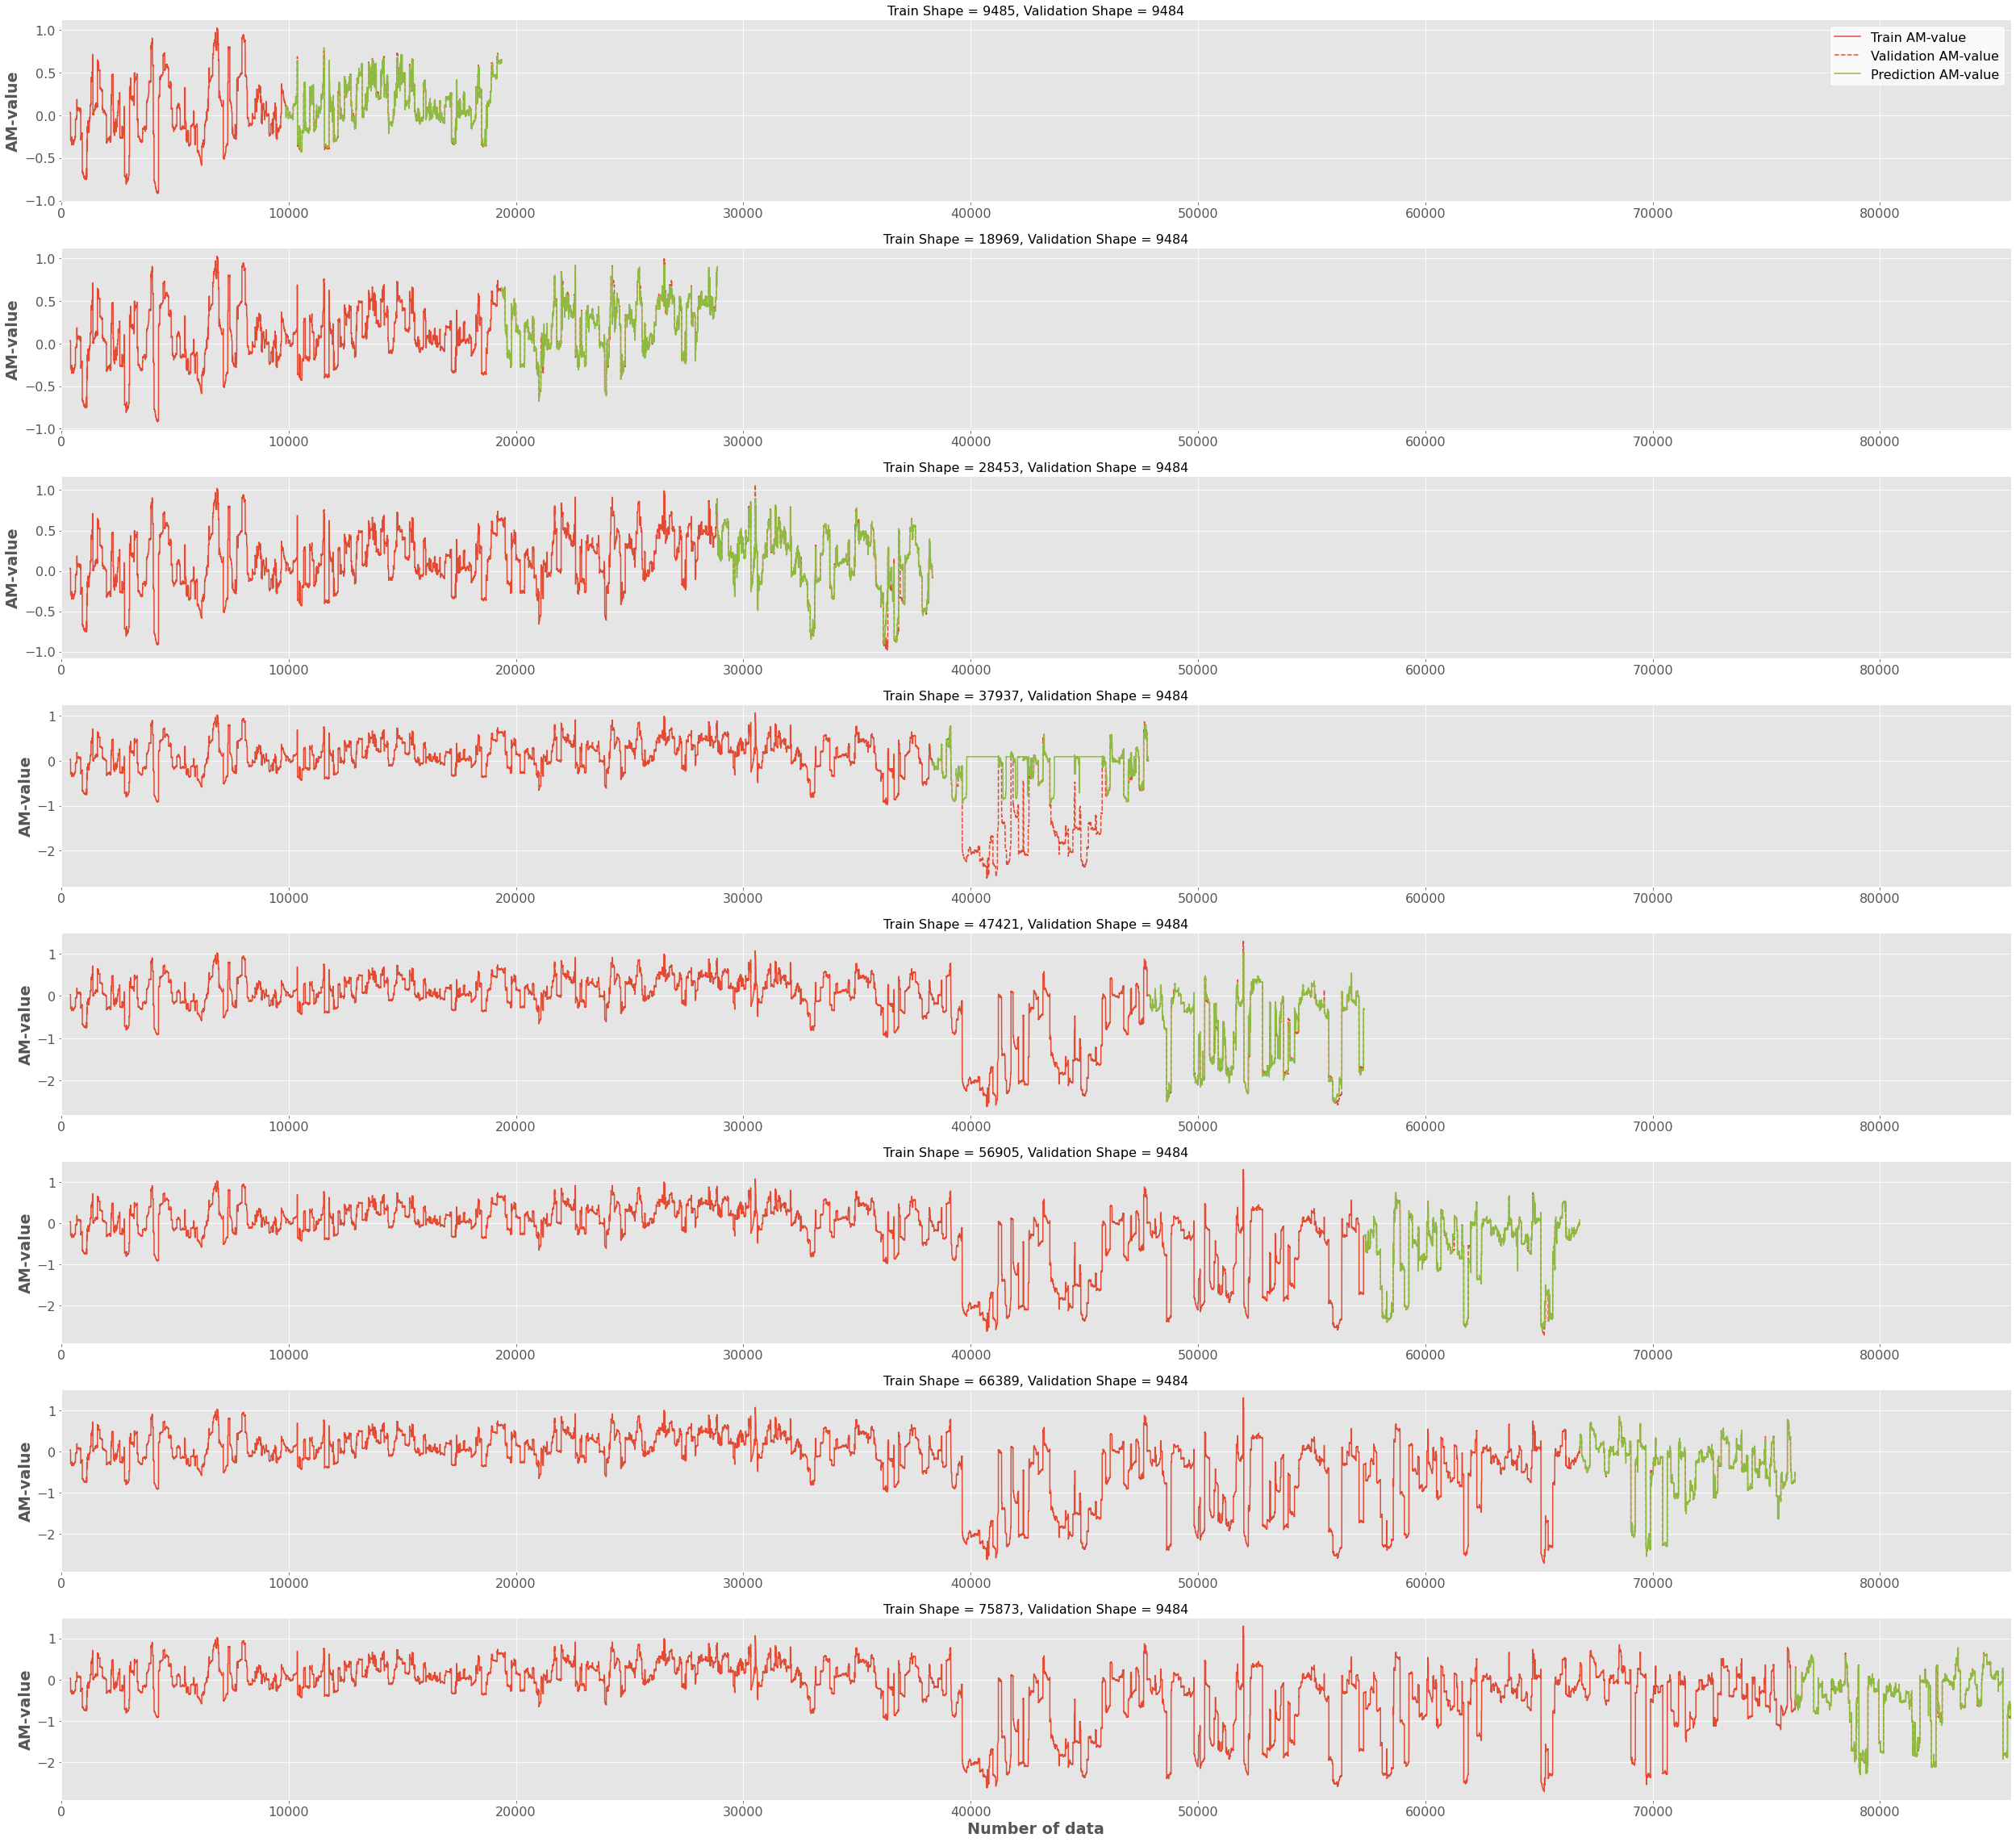

In [544]:
import time

t0 = time.time()

fig, ax = plt.subplots(n_splits, 1, figsize=(35,4*n_splits))
for i, (train_index, test_index) in enumerate(tscv.split(df_train_enc_lag)):
    df_valid_train, df_valid_test = df_train_enc_lag.iloc[train_index], df_train_enc_lag.iloc[test_index]
    model = RandomForestRegressor().fit(df_valid_train.drop(columns=response_col),
                                        df_valid_train[response_col[0]])  # train model
    # Prediction loop
    predictions = model.predict(df_valid_test.drop(columns=response_col))[:,None]

    # Plot
    plot_ts(ax[i], df_valid_train, df_valid_test, predictions, xlim=df_train_enc_lag.index[-1], response_cols=response_col)
ax[0].legend(facecolor='w')
ax[i].set_xlabel('Number of data')
fig.tight_layout()

t1 = time.time()

total = t1-t0
print(total)
save_results_to = 'D:/Phase_1_UBC/Conferences/GRL/b-value_dependency/Synthetic_catalogs/'
plt.savefig(save_results_to + 'AM_CV_prediction_catalog_Dataset_B.png',bbox_inches = "tight", dpi=100)

### Forcasting more into the future

11573.989839553833


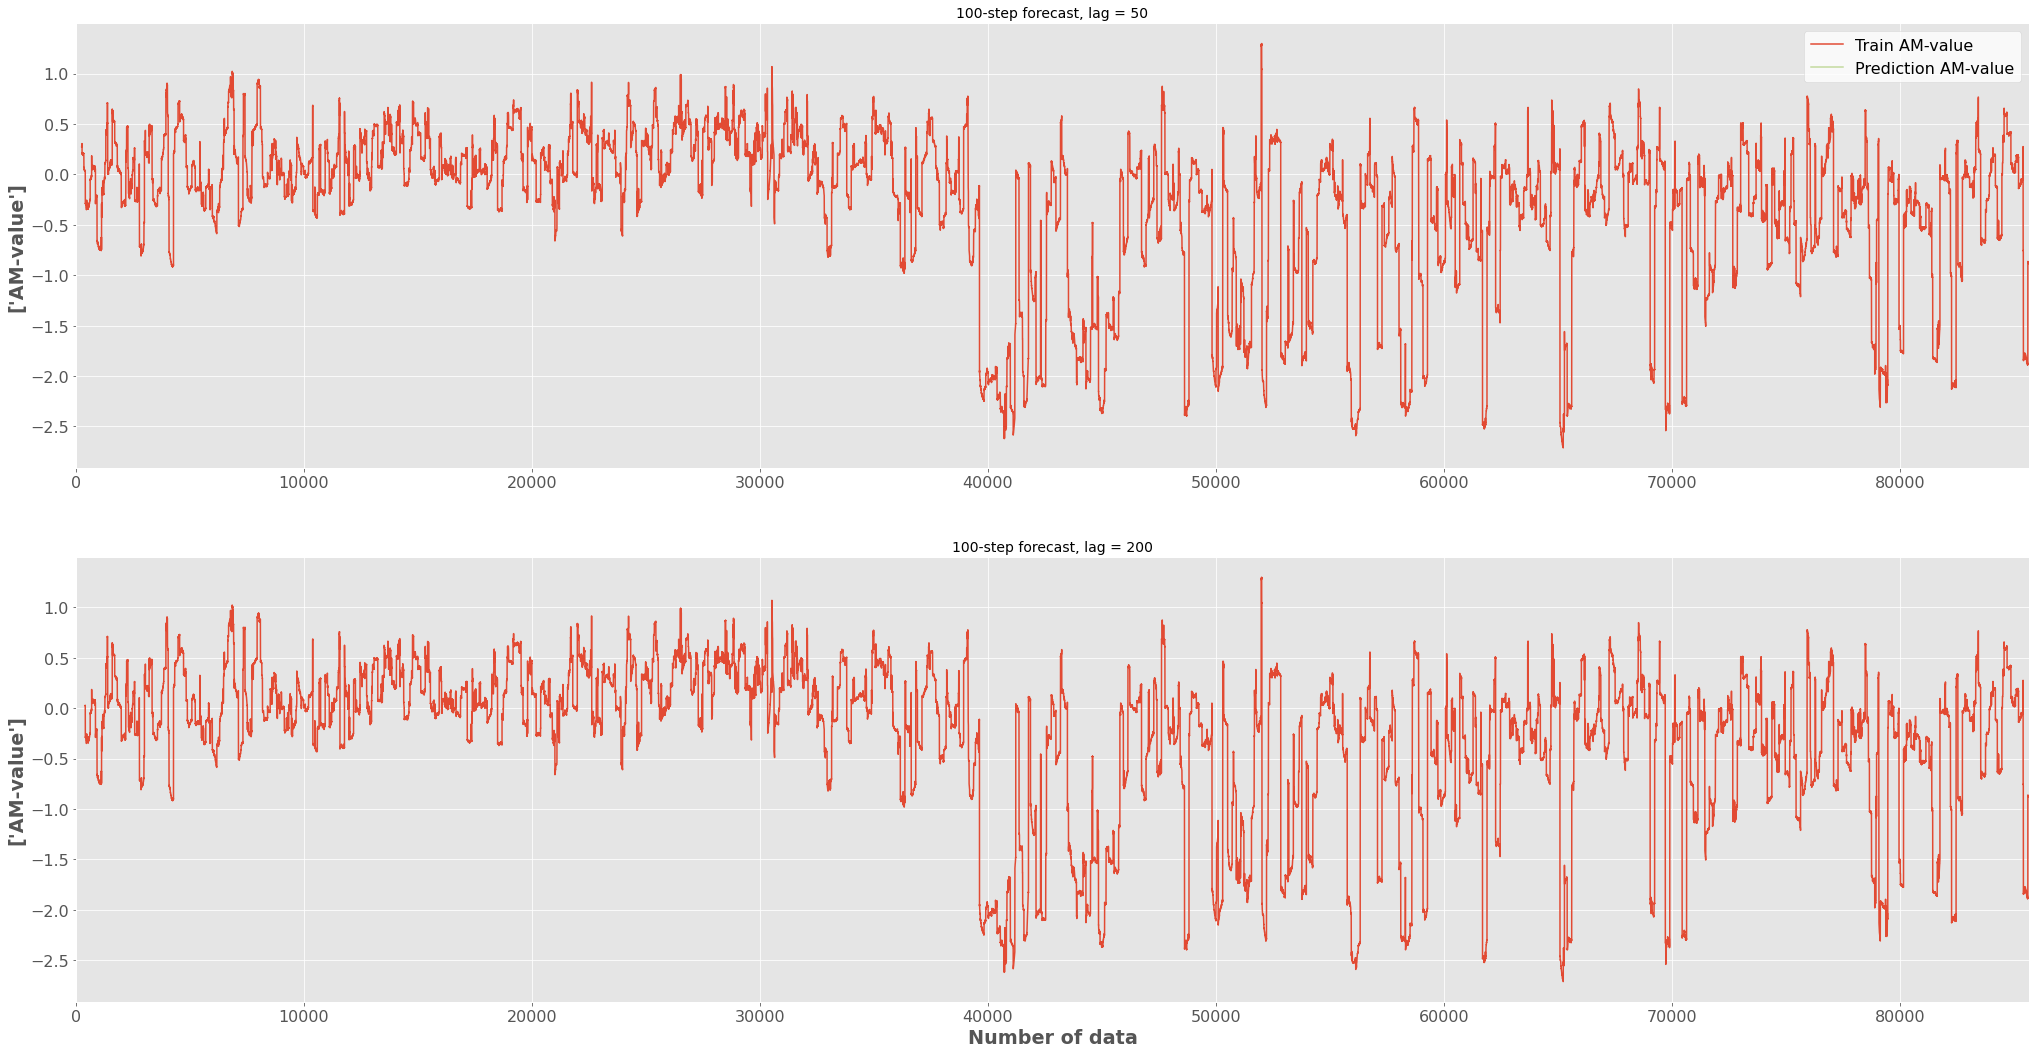

In [576]:
import time

t0 = time.time()
# Variable params
n = 1000 ## number of steps predicted into the future
lag = [50, 200] ### according to 100, 2200, 400 previous data points only of AM-value
fig, ax = plt.subplots(len(lag), 1, figsize=(35,18))
response_col = ['AM-value']
df_train_enc = pd.DataFrame(AM_value_200_window, columns = ['AM-value'])

# df_train_enc_lag = lag_df(df_train_enc, lag, response_col).replace(np.inf, np.nan).dropna()

# Calc loop
for k, l in enumerate(lag):

    df_lag = lag_df(df_train_enc, l, response_col).replace(np.inf, np.nan).dropna()
    df_start = df_lag.to_numpy()[0, 0]
    df_end = df_lag.to_numpy()[-1, 0]
    df_lag = df_lag.diff().dropna()
    model = RandomForestRegressor().fit(df_lag.drop(columns=response_col), df_lag[response_col[0]])  # train model
    # Prediction loop
    input_data = df_lag.iloc[-1, :l*df_train_enc.shape[1]].to_numpy()  # starting data for first prediction
    predictions = ts_predict(input_data, model, n)

    # Plot
    plot_forecast(ax[k], df_lag[response_col].cumsum() + df_start,
                  np.atleast_2d(np.cumsum(predictions) + df_end).T,
                  xlim=len(df_lag)+l,
                  response_cols=response_col)
    ax[k].set_title(ax[k].get_title() + f', lag = {l}', fontsize=14)
    
ax[0].legend(facecolor='w')    
ax[k].set_xlabel('Number of data');
t1 = time.time()

total = t1-t0
print(total)
save_results_to = 'D:/Phase_1_UBC/Conferences/GRL/b-value_dependency/Synthetic_catalogs/'
plt.savefig(save_results_to + 'AM_CV_prediction_1000data_inFuture_catalog_Dataset_B.png',bbox_inches = "tight", dpi=100)

In [580]:
predictions

array([[ 0.6432111 ,  0.6419343 ,  0.64349522, ...,  0.64451768,
         0.64296619,  0.64086179],
       [ 0.64468363,  0.64959357,  0.64514009, ...,  0.64779691,
         0.65001891,  0.64905881],
       [ 0.64771791,  0.64895203,  0.64836507, ...,  0.64702671,
         0.6482477 ,  0.65177579],
       ...,
       [ 0.9714537 , -0.53396799, -0.49708474, ...,  0.94512909,
         1.16721432,  1.00312755],
       [ 1.03903977,  1.11023088,  1.1340783 , ...,  0.61191587,
         0.94766523,  1.03972848],
       [ 1.05184494,  0.9792467 ,  0.99555918, ...,  1.17614179,
         0.78694245,  1.0273978 ]])

In [ ]:
# n_splits = 8
# fig, ax = plt.subplots(n_splits, 1, figsize=(35,4*n_splits))
# tscv = TimeSeriesSplit(n_splits=n_splits)
# for i, (train_index, test_index) in enumerate(tscv.split(df_train_enc_lag)):
#     df_valid_train, df_valid_test = df_train_enc_lag.iloc[train_index], df_train_enc_lag.iloc[test_index]
#     ax[i].plot(df_valid_train['AM-value'], label = 'Training')
#     ax[i].plot(df_valid_test['AM-value'], label = 'Validation')
#     ax[i].set_xlim(0, len(df_train_enc_lag))
#     ax[i].set_title(f"Split {i+1}: Train Shape = {len(train_index)}, Validation Shape = {len(test_index)}",
#                     fontsize=16)
#     ax[i].set_ylabel('AM-value')
# ax[0].legend(facecolor='w')
# ax[i].set_xlabel('Number of data')
# fig.tight_layout()
# save_results_to = 'D:/Phase_1_UBC/Conferences/GRL/b-value_dependency/Synthetic_catalogs/'
# # plt.savefig(save_results_to + 'AM_CV_Split_catalog_Dataset_B.png',bbox_inches = "tight", dpi=100)

In [592]:
l = 1000
df_train_enc = pd.DataFrame(AM_value_200_window, columns = ['AM-value'])
response_col = ['AM-value']
df_train_enc_lag = lag_df(df_train_enc, l, response_col).replace(np.inf, np.nan).dropna()
df_train_enc_lag

AM-value  AM-value-1  AM-value-2  AM-value-3  AM-value-4  AM-value-5  \
1199  -0.193445   -0.195384   -0.196350   -0.137478   -0.137478   -0.135172   
1200  -0.194900   -0.193445   -0.195384   -0.196350   -0.137478   -0.137478   
1201  -0.197314   -0.194900   -0.193445   -0.195384   -0.196350   -0.137478   
...         ...         ...         ...         ...         ...         ...   
85753 -0.883229   -0.885949   -0.886760   -0.888101   -0.886088   -0.887556   
85754 -0.876825   -0.883229   -0.885949   -0.886760   -0.888101   -0.886088   
85755 -0.867652   -0.876825   -0.883229   -0.885949   -0.886760   -0.888101   

       AM-value-6  AM-value-7  AM-value-8  AM-value-9  ...  AM-value-991  \
1199    -0.135733   -0.134172   -0.129918   -0.127775  ...      0.273492   
1200    -0.135172   -0.135733   -0.134172   -0.129918  ...      0.274645   
1201    -0.137478   -0.135172   -0.135733   -0.134172  ...      0.274645   
...           ...         ...         ...         ...  ...           ...   
85753   -0.891525   -0.885558   -0.884221   -0.883042  ...      0.403860   
85754   -0.887556   -0.891525   -0.885558   -0.884221  ...      0.400962   
85755   -0.886088   -0.887556   -0.891525   -0.885558  ...      0.400962   

       AM-value-992  AM-value-993  AM-value-994  AM-value-995  AM-value-996  \
1199       0.274040      0.271310      0.269595      0.266877      0.263100   
1200       0.273492      0.274040      0.271310      0.269595      0.266877   
1201       0.274645      0.273492      0.274040      0.271310      0.269595   
...             ...           ...           ...           ...           ...   
85753      0.407079      0.407079      0.407079      0.408622      0.410742   
85754      0.403860      0.407079      0.407079      0.407079      0.408622   
85755      0.400962      0.403860      0.407079      0.407079      0.407079   

       AM-value-997  AM-value-998  AM-value-999  AM-value-1000  
1199       0.260957      0.258293      0.255645       0.252488  
1200       0.263100      0.260957      0.258293       0.255645  
1201       0.266877      0.263100      0.260957       0.258293  
...             ...           ...           ...            ...  
85753      0.409203      0.409203      0.406310       0.406142  
85754      0.410742      0.409203      0.409203       0.406310  
85755      0.408622      0.410742      0.409203       0.409203  

[84557 rows x 1001 columns]

IndexError: index 3 is out of bounds for axis 0 with size 3

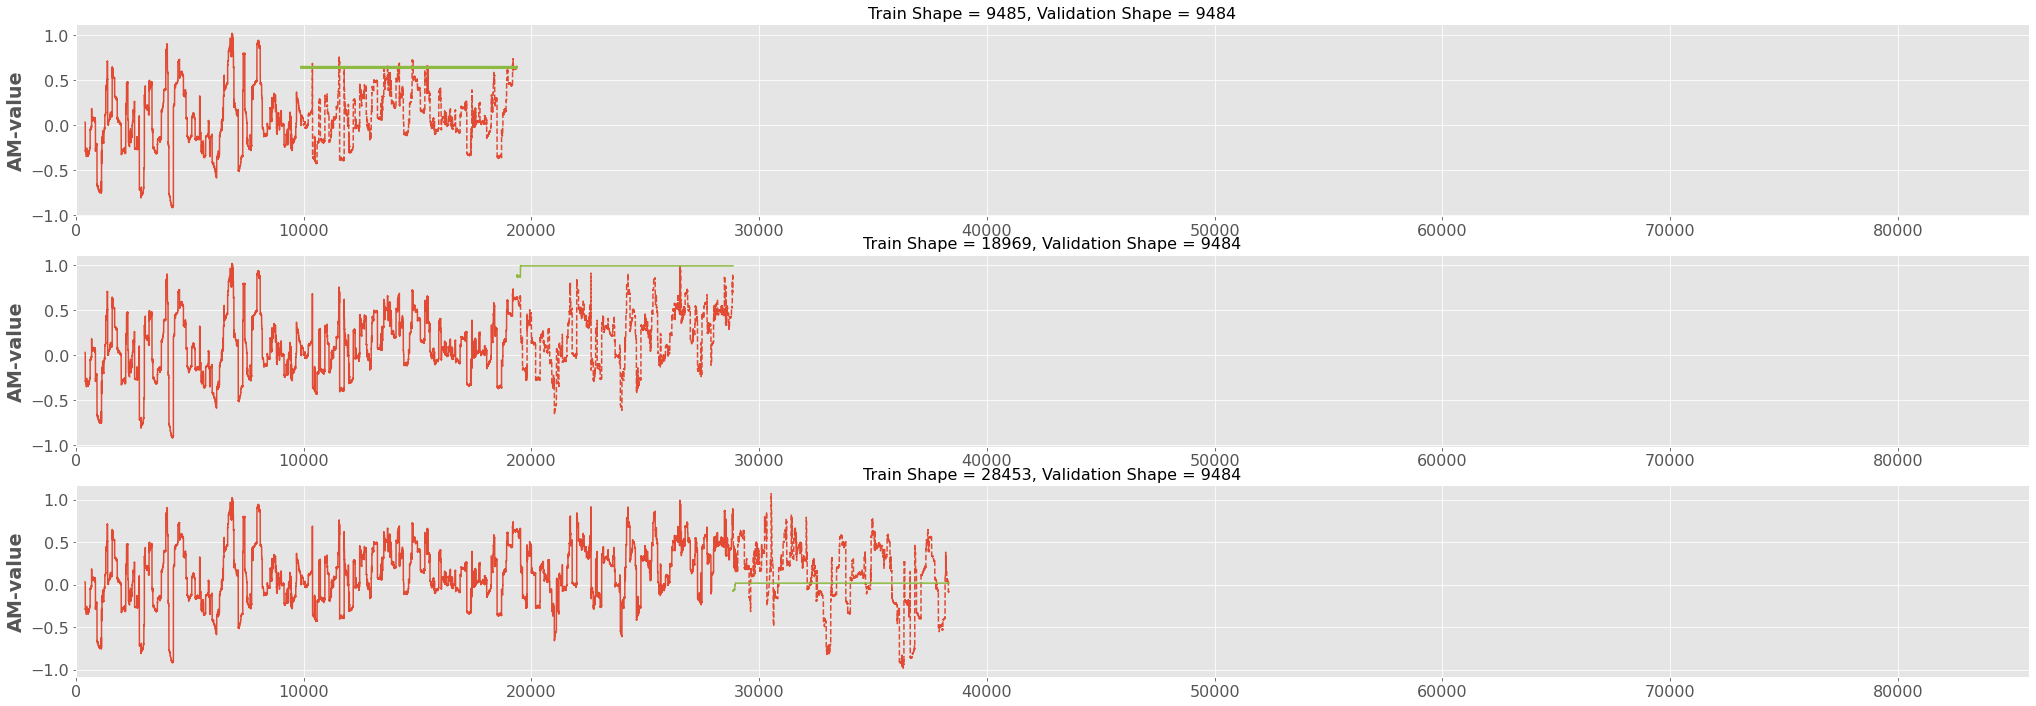

In [589]:
import time

t0 = time.time()
n = 9484
n_splits = 4
response_col = ['AM-value']
l = 1000
fig, ax = plt.subplots(n_splits, 1, figsize=(35,4*n_splits))
for i, (train_index, test_index) in enumerate(tscv.split(df_train_enc_lag)):
    df_valid_train, df_valid_test = df_train_enc_lag.iloc[train_index], df_train_enc_lag.iloc[test_index]
    model = RandomForestRegressor().fit(df_valid_train.drop(columns=response_col),
                                        df_valid_train[response_col[0]])  # train model
    # Prediction loop
    # predictions = model.predict(df_valid_test.drop(columns=response_col))[:,None]
    # Prediction loop
    input_data = df_valid_test.drop(columns=response_col).iloc[-1, :l*df_valid_test.shape[1]].to_numpy()  #df_lag.iloc[-1, :l*df_train_enc.shape[1]].to_numpy()  # starting data for first prediction
    predictions = ts_predict(input_data, model, n)[:,None]

    # Plot
    plot_ts(ax[i], df_valid_train, df_valid_test, predictions, xlim=df_train_enc_lag.index[-1], response_cols=response_col)
ax[0].legend(facecolor='w')
ax[i].set_xlabel('Number of data')
fig.tight_layout()

t1 = time.time()

total = t1-t0
print(total)
save_results_to = 'D:/Phase_1_UBC/Conferences/GRL/b-value_dependency/Synthetic_catalogs/'
plt.savefig(save_results_to + 'AM_prediction_4_CV_1000__catalog_Dataset_B.png',bbox_inches = "tight", dpi=330)

In [590]:
i

3

In [ ]:
# # Variable params
# n = 1000 ## number of steps predicted into the future
# lag = [50, 200] ### according to 100, 2200, 400 previous data points only of AM-value
# fig, ax = plt.subplots(len(lag), 1, figsize=(35,18))
# response_col = ['AM-value']
# df_train_enc = pd.DataFrame(AM_value_200_window, columns = ['AM-value'])

# # df_train_enc_lag = lag_df(df_train_enc, lag, response_col).replace(np.inf, np.nan).dropna()

# # Calc loop
# for k, l in enumerate(lag):

#     df_lag = lag_df(df_train_enc, l, response_col).replace(np.inf, np.nan).dropna()
#     df_start = df_lag.to_numpy()[0, 0]
#     df_end = df_lag.to_numpy()[-1, 0]
#     df_lag = df_lag.diff().dropna()
#     model = RandomForestRegressor().fit(df_lag.drop(columns=response_col), df_lag[response_col[0]])  # train model
#     # Prediction loop
#     input_data = df_lag.iloc[-1, :l*df_train_enc.shape[1]].to_numpy()  # starting data for first prediction
#     predictions = ts_predict(input_data, model, n)

#     # Plot
#     plot_forecast(ax[k], df_lag[response_col].cumsum() + df_start,
#                   np.atleast_2d(np.cumsum(predictions) + df_end).T,
#                   xlim=len(df_lag)+l,
#                   response_cols=response_col)
#     ax[k].set_title(ax[k].get_title() + f', lag = {l}', fontsize=14)
    
# ax[0].legend(facecolor='w')    
# ax[k].set_xlabel('Number of data');

In [548]:
# df_train_enc = pd.DataFrame(AM_value_200_window, columns = ['AM-value'])
# response_col = ['AM-value']
# df_train_enc_lag = lag_df(df_train_enc, lag, response_col).replace(np.inf, np.nan).dropna()

In [549]:
df_train_enc_lag

AM-value  AM-value-1  AM-value-2  AM-value-3  AM-value-4  AM-value-5  \
399    0.032437    0.034240    0.032511    0.032511    0.034015    0.036535   
400    0.024906    0.032437    0.034240    0.032511    0.032511    0.034015   
401    0.023574    0.024906    0.032437    0.034240    0.032511    0.032511   
...         ...         ...         ...         ...         ...         ...   
85753 -0.883229   -0.885949   -0.886760   -0.888101   -0.886088   -0.887556   
85754 -0.876825   -0.883229   -0.885949   -0.886760   -0.888101   -0.886088   
85755 -0.867652   -0.876825   -0.883229   -0.885949   -0.886760   -0.888101   

       AM-value-6  AM-value-7  AM-value-8  AM-value-9  ...  AM-value-191  \
399      0.038560    0.039320    0.040839    0.040839  ...      0.273492   
400      0.036535    0.038560    0.039320    0.040839  ...      0.274645   
401      0.034015    0.036535    0.038560    0.039320  ...      0.274645   
...           ...         ...         ...         ...  ...           ...   
85753   -0.891525   -0.885558   -0.884221   -0.883042  ...     -1.864150   
85754   -0.887556   -0.891525   -0.885558   -0.884221  ...     -1.870019   
85755   -0.886088   -0.887556   -0.891525   -0.885558  ...     -1.871405   

       AM-value-192  AM-value-193  AM-value-194  AM-value-195  AM-value-196  \
399        0.274040      0.271310      0.269595      0.266877      0.263100   
400        0.273492      0.274040      0.271310      0.269595      0.266877   
401        0.274645      0.273492      0.274040      0.271310      0.269595   
...             ...           ...           ...           ...           ...   
85753     -1.866839     -1.864741     -1.862660     -1.858519     -1.859706   
85754     -1.864150     -1.866839     -1.864741     -1.862660     -1.858519   
85755     -1.870019     -1.864150     -1.866839     -1.864741     -1.862660   

       AM-value-197  AM-value-198  AM-value-199  AM-value-200  
399        0.260957      0.258293      0.255645      0.252488  
400        0.263100      0.260957      0.258293      0.255645  
401        0.266877      0.263100      0.260957      0.258293  
...             ...           ...           ...           ...  
85753     -1.854592     -1.845435     -1.843581     -1.842520  
85754     -1.859706     -1.854592     -1.845435     -1.843581  
85755     -1.858519     -1.859706     -1.854592     -1.845435  

[85357 rows x 201 columns]

1311.7225732803345


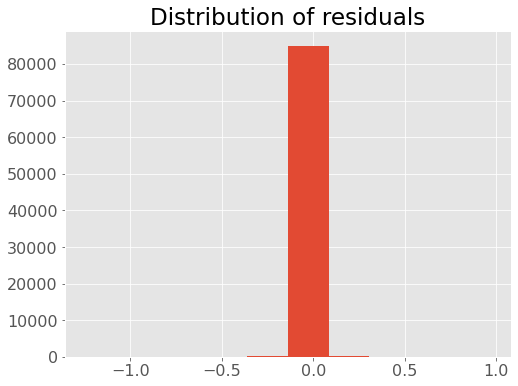

In [550]:
t0 = time.time()
model = RandomForestRegressor().fit(df_train_enc_lag.drop(columns='AM-value'),
                                    df_train_enc_lag['AM-value'])
resid = (df_train_enc_lag['AM-value'] - model.predict(df_train_enc_lag.drop(columns='AM-value'))).to_numpy()
plt.hist(resid)
plt.title('Distribution of residuals');
t1 = time.time()

total = t1-t0
print(total)

In [577]:
import time
t0 = time.time()
steps =10000  # number of steps to forecast
sims = 1000  # number of simulations
lag = 200 # the number of lagged data
df_lag = df_train_enc_lag
df = df_train_enc
# Prediction loop
predictions = np.zeros(shape=(steps, sims))
for sim in range(sims):
    input_data = df_lag.iloc[-1, :lag*df.shape[1]].to_numpy()
    
    for step in range(steps):
        p = model.predict(input_data.reshape(1, -1))  # raw prediction
        r = resid[np.random.randint(0, len(resid), 1)[0]]  # bootstrapped residual
        predictions[step, sim] = p + r
        input_data = np.append(predictions[step, sim],
                               input_data[:lag-1])  # new input data
t1 = time.time()

total = t1-t0
print(total)

46961.63046383858


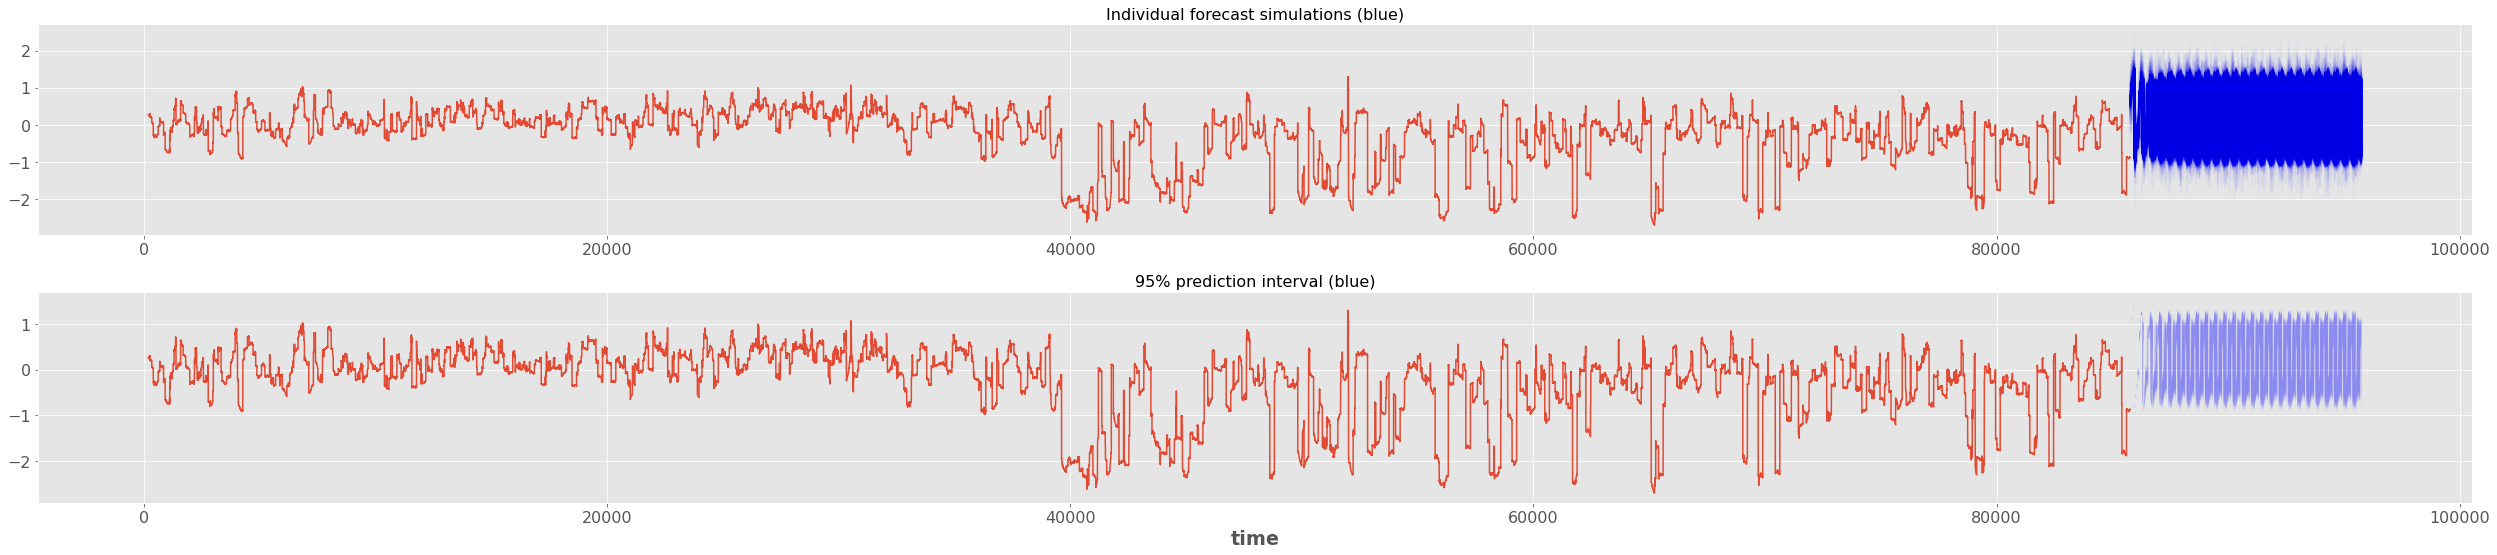

In [578]:
# Plot
fig, ax = plt.subplots(2, 1, figsize=(35,8))
x = np.arange(len(df), len(df)+steps)
ax[0].plot(df['AM-value'], label='Observations')
ax[0].plot(x, 
           predictions,
           '-b', alpha=0.03);
ax[0].set_title('Individual forecast simulations (blue)', fontsize=16)
p5 = np.percentile(predictions, 5, axis=1)
p95 = np.percentile(predictions, 95, axis=1)
ax[1].plot(df['AM-value'], label='Observations')
ax[1].fill_between(x, p5, p95, fc='b', alpha=0.4)
ax[1].set_xlabel('time')
ax[1].set_title('95% prediction interval (blue)', fontsize=16)
fig.tight_layout()
# ax[1].set_xlim(80500)
save_results_to = 'D:/Phase_1_UBC/Conferences/GRL/b-value_dependency/Synthetic_catalogs/'
plt.savefig(save_results_to + 'AM_CV_prediction_10000data_inFuture_confidence_interval_catalog_Dataset_B.png',bbox_inches = "tight", dpi=400)

In [ ]:
b_value

# TODO:
- The next step to analyze the data for the paper is:
- Apply Autoregressor (AR) to `max_mag_200_window` and `b_value_200_window` specifically on the `cross_validation` and see which one gives a better feature to predict the events into the future.

In [ ]:
# b_value_200_window
# max_mag_200_window

In [594]:
df_train_enc_b_val = pd.DataFrame(b_value_200_window, columns = ['b-value']);
df_train_enc_mg_val = pd.DataFrame(max_mag_200_window, columns = ['LME']);

In [595]:
lag = 200;
response_col = ['b-value']
df_train_enc_lag_b_val = lag_df(df_train_enc_b_val, lag, response_col).replace(np.inf, np.nan).dropna()
df_train_enc_lag_b_val

b-value  b-value-1  b-value-2  b-value-3  b-value-4  b-value-5  \
399    0.855927   0.859488   0.856073   0.856073   0.859044   0.864041   
400    0.841212   0.855927   0.859488   0.856073   0.856073   0.859044   
401    0.838638   0.841212   0.855927   0.859488   0.856073   0.856073   
...         ...        ...        ...        ...        ...        ...   
85753  0.825603   0.820447   0.818917   0.816393   0.820185   0.817417   
85754  0.837867   0.825603   0.820447   0.818917   0.816393   0.820185   
85755  0.855753   0.837867   0.825603   0.820447   0.818917   0.816393   

       b-value-6  b-value-7  b-value-8  b-value-9  ...  b-value-191  \
399     0.868081   0.869600   0.872648   0.872648  ...     0.940789   
400     0.864041   0.868081   0.869600   0.872648  ...     0.943289   
401     0.859044   0.864041   0.868081   0.869600  ...     0.943289   
...          ...        ...        ...        ...  ...          ...   
85753   0.809981   0.821187   0.823720   0.825959  ...     0.862680   
85754   0.817417   0.809981   0.821187   0.823720  ...     0.851101   
85755   0.820185   0.817417   0.809981   0.821187  ...     0.848389   

       b-value-192  b-value-193  b-value-194  b-value-195  b-value-196  \
399       0.941975     0.936073     0.932384     0.926567     0.918545   
400       0.940789     0.941975     0.936073     0.932384     0.926567   
401       0.943289     0.940789     0.941975     0.936073     0.932384   
...            ...          ...          ...          ...          ...   
85753     0.857355     0.861508     0.865645     0.873940     0.871553   
85754     0.862680     0.857355     0.861508     0.865645     0.873940   
85755     0.851101     0.862680     0.857355     0.861508     0.865645   

       b-value-197  b-value-198  b-value-199  b-value-200  
399       0.914023     0.908432     0.902910     0.896371  
400       0.918545     0.914023     0.908432     0.902910  
401       0.926567     0.918545     0.914023     0.908432  
...            ...          ...          ...          ...  
85753     0.881878     0.900668     0.904522     0.906734  
85754     0.871553     0.881878     0.900668     0.904522  
85755     0.873940     0.871553     0.881878     0.900668  

[85357 rows x 201 columns]

In [596]:
lag = 200;
response_col = ['LME']
df_train_enc_lag_mg_val = lag_df(df_train_enc_mg_val, lag, response_col).replace(np.inf, np.nan).dropna()
df_train_enc_lag_mg_val

LME  LME-1  LME-2  LME-3  LME-4  LME-5  LME-6  LME-7  LME-8  LME-9  \
399   -0.1   -0.1   -0.1   -0.1   -0.1   -0.1   -0.1   -0.1   -0.1   -0.1   
400   -0.1   -0.1   -0.1   -0.1   -0.1   -0.1   -0.1   -0.1   -0.1   -0.1   
401   -0.1   -0.1   -0.1   -0.1   -0.1   -0.1   -0.1   -0.1   -0.1   -0.1   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
85753  0.8    0.8    0.8    0.8    0.8    0.8    0.8    0.8    0.8    0.8   
85754  0.8    0.8    0.8    0.8    0.8    0.8    0.8    0.8    0.8    0.8   
85755  0.8    0.8    0.8    0.8    0.8    0.8    0.8    0.8    0.8    0.8   

       ...  LME-191  LME-192  LME-193  LME-194  LME-195  LME-196  LME-197  \
399    ...     -0.3     -0.3     -0.3     -0.3     -0.3     -0.3     -0.3   
400    ...     -0.3     -0.3     -0.3     -0.3     -0.3     -0.3     -0.3   
401    ...     -0.3     -0.3     -0.3     -0.3     -0.3     -0.3     -0.3   
...    ...      ...      ...      ...      ...      ...      ...      ...   
85753  ...      1.8      1.8      1.8      1.8      1.8      1.8      1.8   
85754  ...      1.8      1.8      1.8      1.8      1.8      1.8      1.8   
85755  ...      1.8      1.8      1.8      1.8      1.8      1.8      1.8   

       LME-198  LME-199  LME-200  
399       -0.3     -0.3     -0.3  
400       -0.3     -0.3     -0.3  
401       -0.3     -0.3     -0.3  
...        ...      ...      ...  
85753      1.8      1.8      1.8  
85754      1.8      1.8      1.8  
85755      1.8      1.8      1.8  

[85357 rows x 201 columns]

5833.270025014877


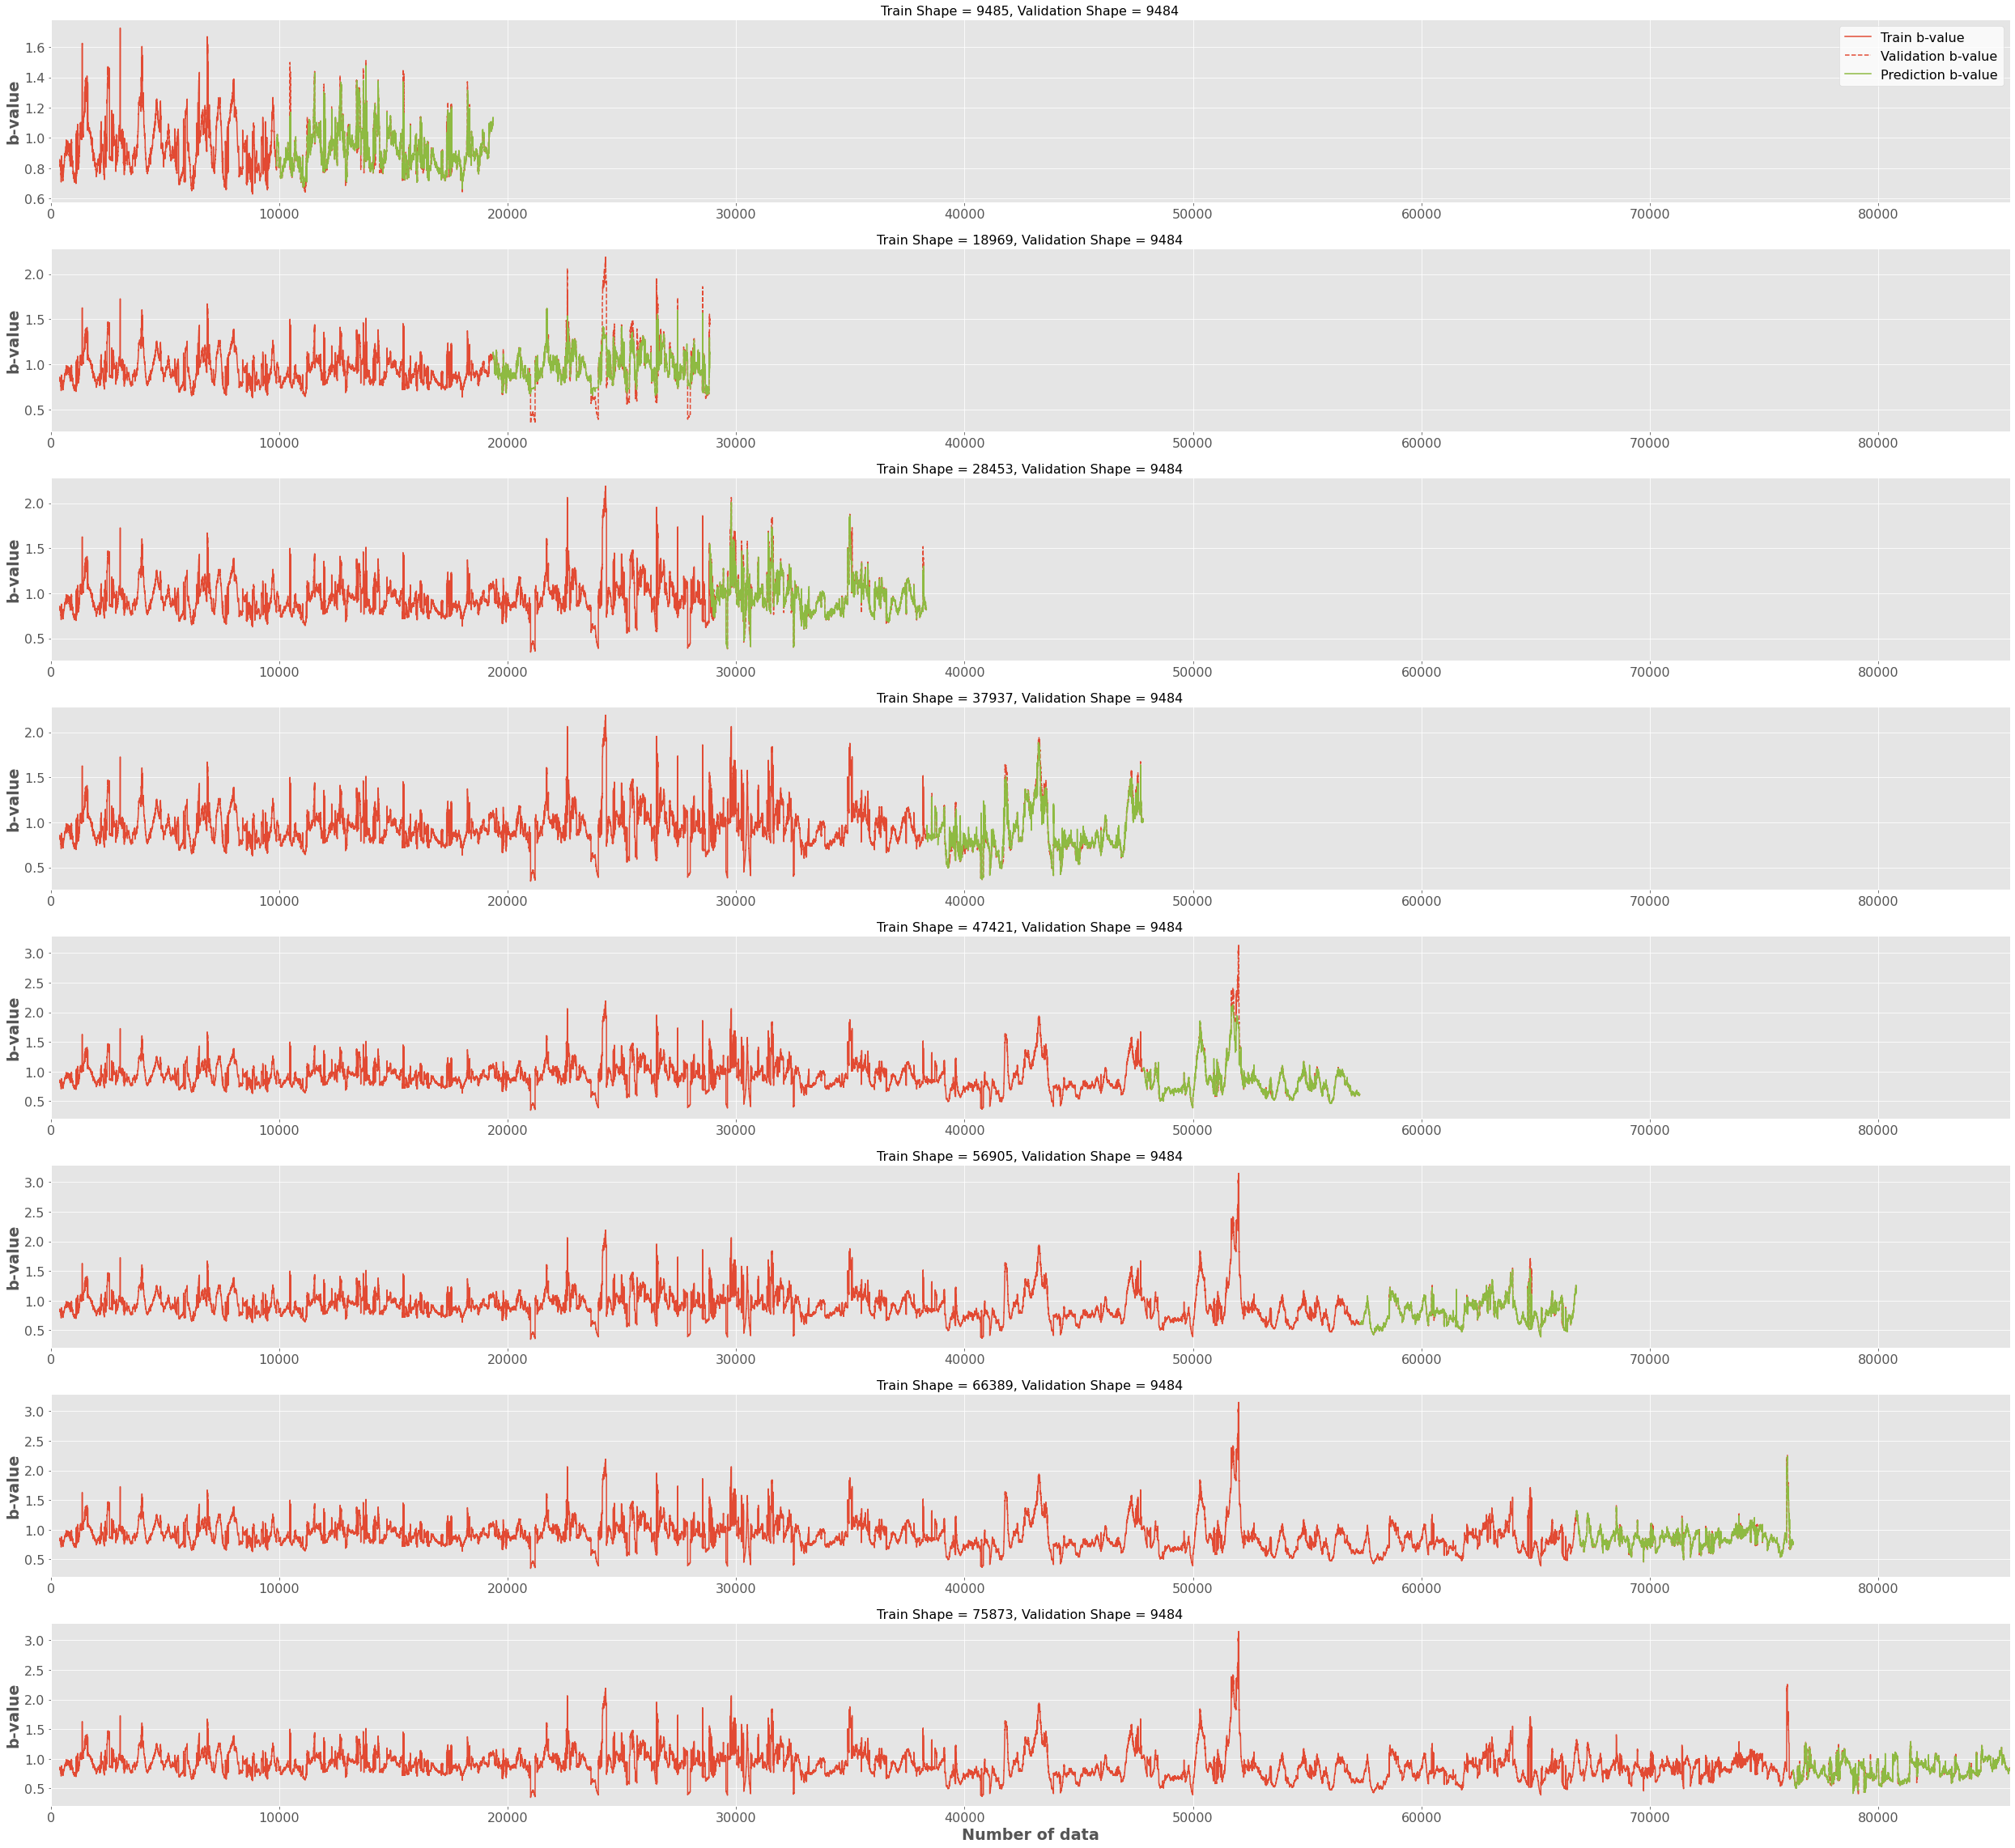

In [597]:
## b-value
import time

t0 = time.time()
response_col = ['b-value']
n_splits = 8
df_train_enc_lag = df_train_enc_lag_b_val
fig, ax = plt.subplots(n_splits, 1, figsize=(35,4*n_splits))
for i, (train_index, test_index) in enumerate(tscv.split(df_train_enc_lag)):
    df_valid_train, df_valid_test = df_train_enc_lag.iloc[train_index], df_train_enc_lag.iloc[test_index]
    model = RandomForestRegressor().fit(df_valid_train.drop(columns=response_col),
                                        df_valid_train[response_col[0]])  # train model
    # Prediction loop
    predictions = model.predict(df_valid_test.drop(columns=response_col))[:,None]

    # Plot
    plot_ts(ax[i], df_valid_train, df_valid_test, predictions, xlim=df_train_enc_lag.index[-1], response_cols=response_col)
ax[0].legend(facecolor='w')
ax[i].set_xlabel('Number of data')
fig.tight_layout()

t1 = time.time()

total = t1-t0
print(total)
save_results_to = 'D:/Phase_1_UBC/Conferences/GRL/b-value_dependency/Synthetic_catalogs/'
plt.savefig(save_results_to + 'b-val_CV_prediction_catalog_Dataset_B.png',bbox_inches = "tight", dpi=100)

590.957409620285


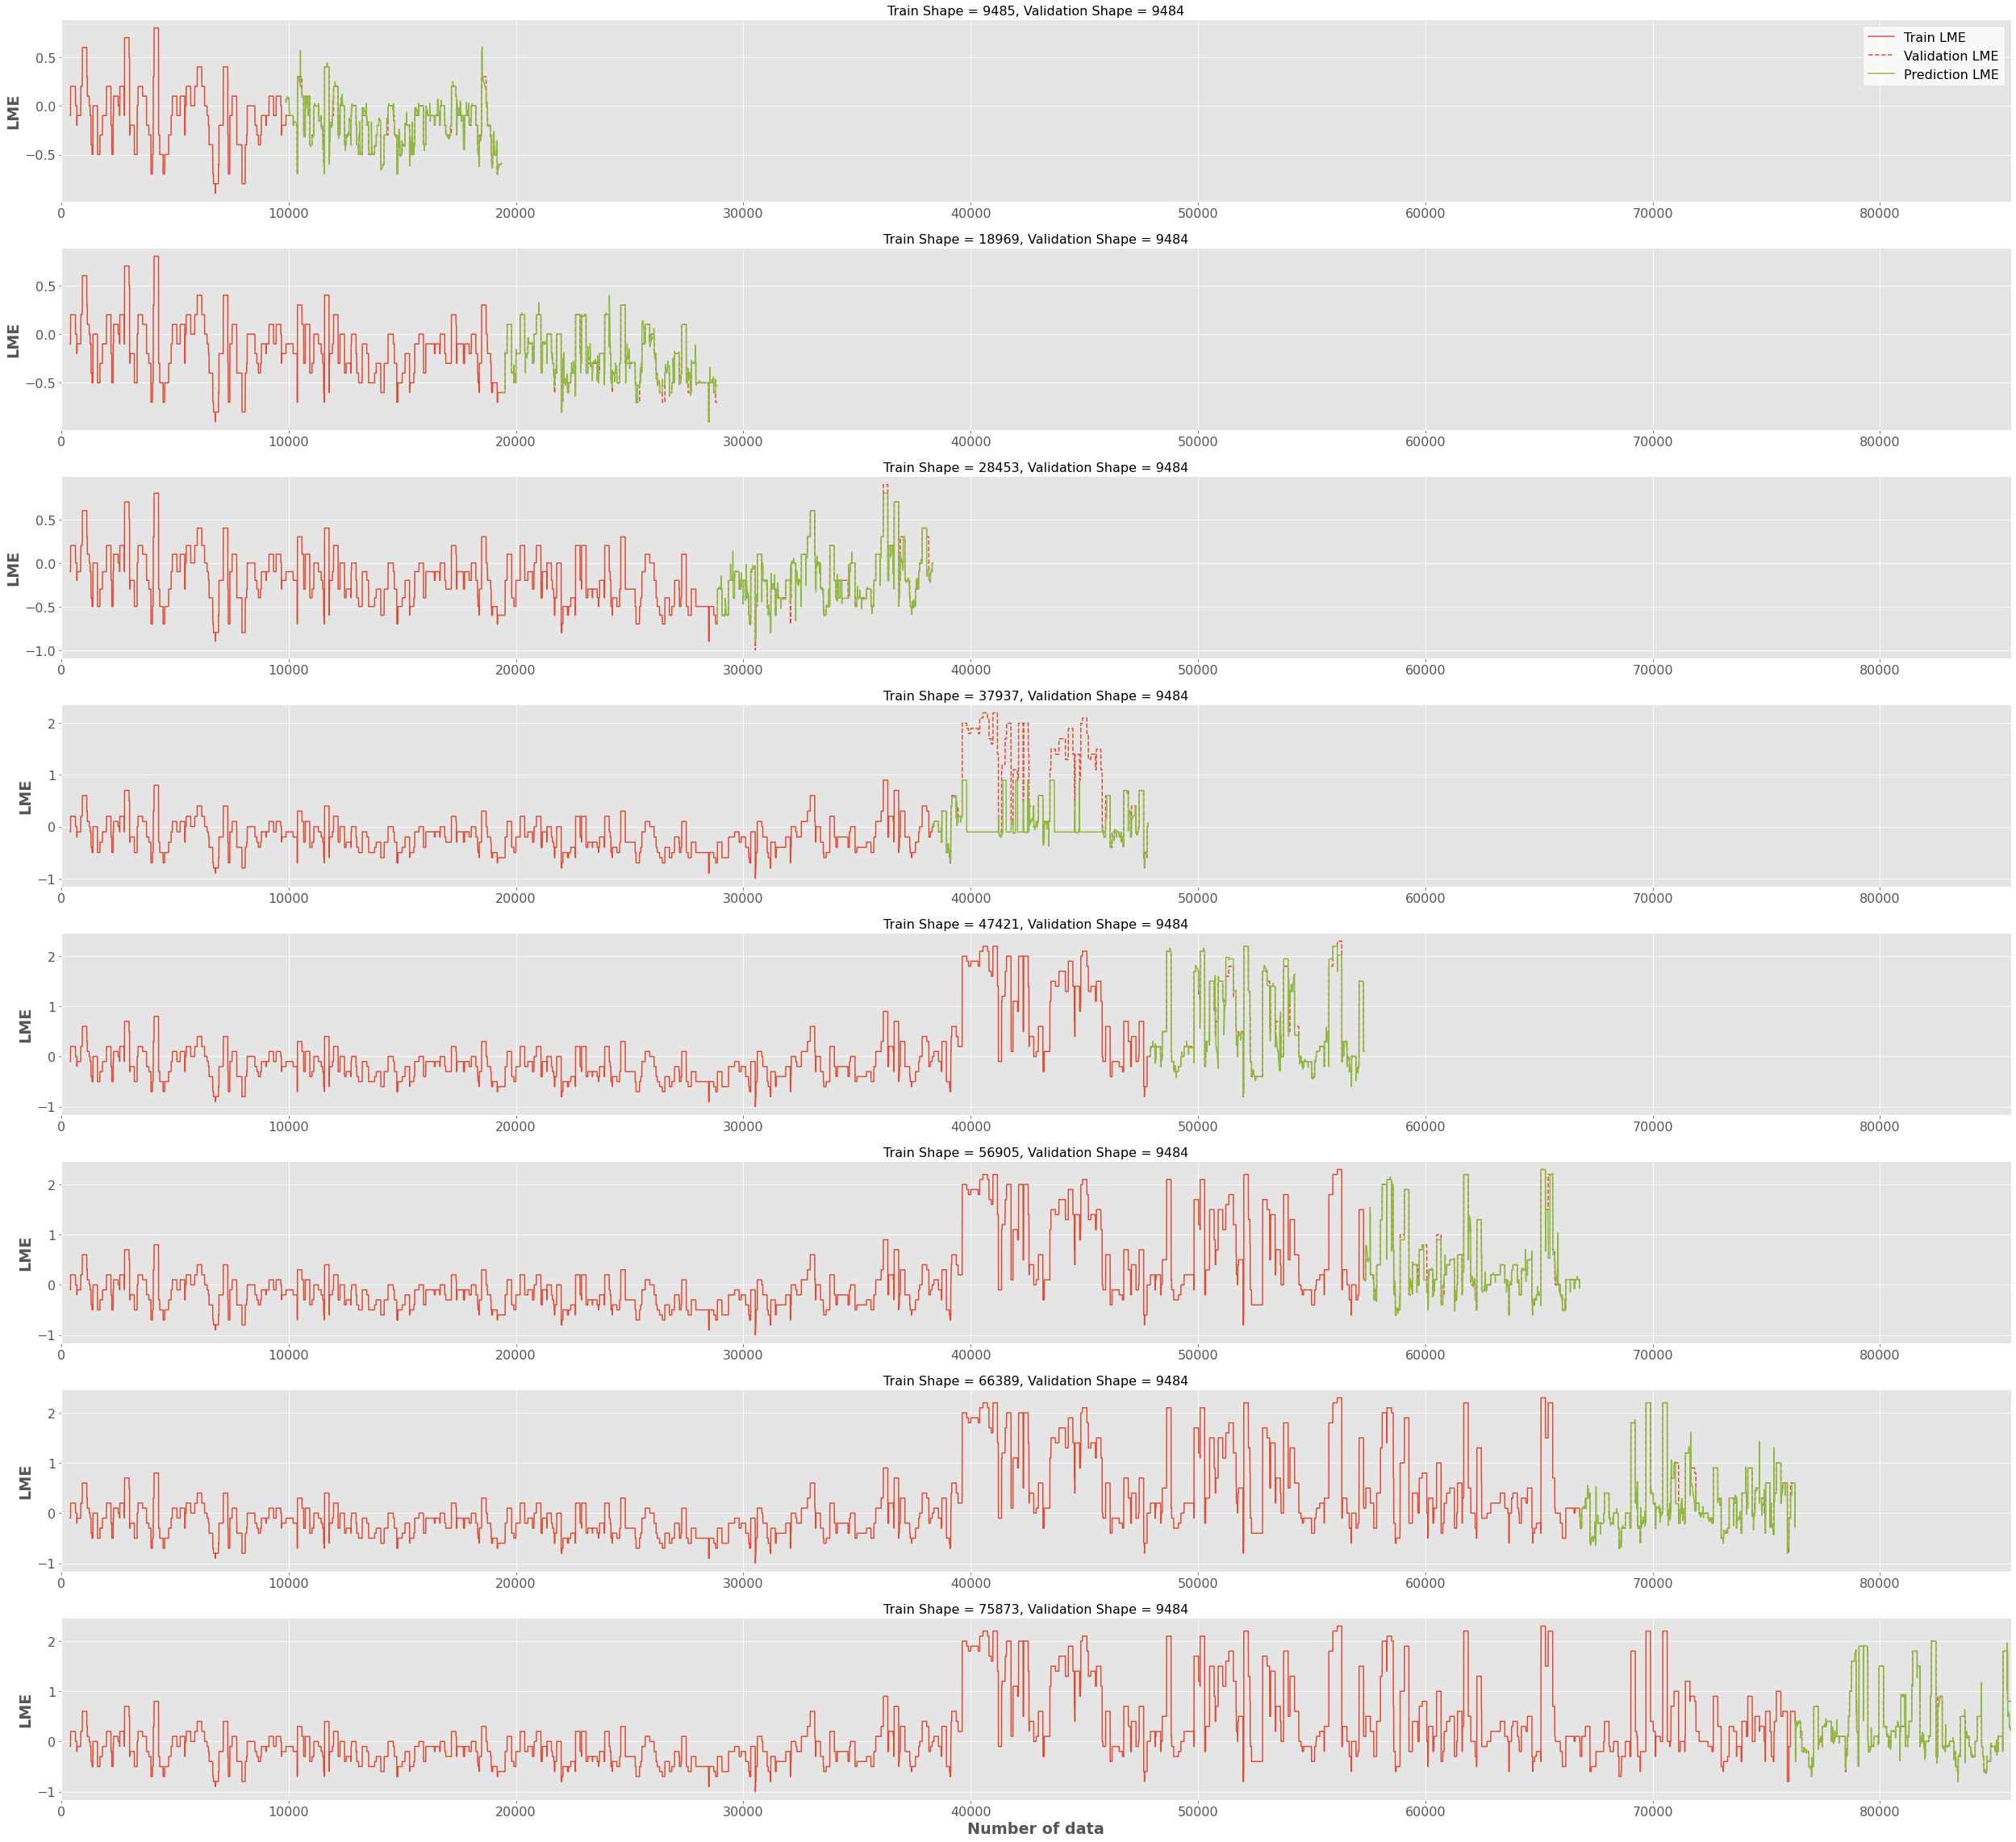

In [598]:
## b-value
import time

t0 = time.time()
response_col = ['LME']
n_splits = 8
df_train_enc_lag = df_train_enc_lag_mg_val
fig, ax = plt.subplots(n_splits, 1, figsize=(35,4*n_splits))
for i, (train_index, test_index) in enumerate(tscv.split(df_train_enc_lag)):
    df_valid_train, df_valid_test = df_train_enc_lag.iloc[train_index], df_train_enc_lag.iloc[test_index]
    model = RandomForestRegressor().fit(df_valid_train.drop(columns=response_col),
                                        df_valid_train[response_col[0]])  # train model
    # Prediction loop
    predictions = model.predict(df_valid_test.drop(columns=response_col))[:,None]

    # Plot
    plot_ts(ax[i], df_valid_train, df_valid_test, predictions, xlim=df_train_enc_lag.index[-1], response_cols=response_col)
ax[0].legend(facecolor='w')
ax[i].set_xlabel('Number of data')
fig.tight_layout()

t1 = time.time()

total = t1-t0
print(total)
save_results_to = 'D:/Phase_1_UBC/Conferences/GRL/b-value_dependency/Synthetic_catalogs/'
plt.savefig(save_results_to + 'LME_CV_prediction_catalog_Dataset_B.png',bbox_inches = "tight", dpi=100)

## Plotting ACF and PACF
- Assuming that the distribution of each variable fits a Gaussian (bell curve) distribution. The Pearson's correlation coefficient could be used to analyze the correlation between lagged value and the target in time-series analyses. The Pearson's correlation coefficient is a number between -1 and 1 that describes a negative or positive correlation respectively. A value of zero indicates no correlation.
- Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.
- A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram, or an autocorrelation plot.
- A partial autocorrelation function or PACF is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.
    - The autocorrelation for an observation and an observation at a prior time step is comprised of both the direct correlation and indirect correlations. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time steps. It is these indirect correlations that the partial autocorrelation function seeks to remove. 

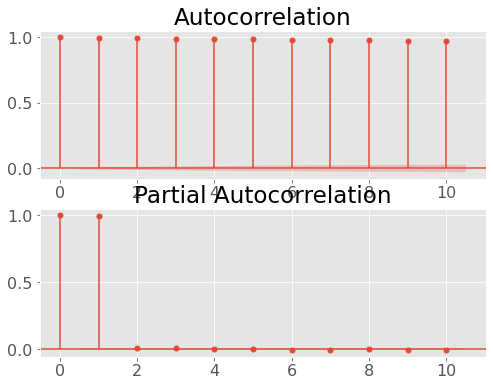

In [604]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
### AM value
series = df_train_enc.replace(np.inf, np.nan).dropna()
#plots
plt.figure()
lags = 10
#acf
axis = plt.subplot(2, 1, 1)
plot_acf(series, ax=axis, lags=lags)
#pacf
axis = plt.subplot(2, 1, 2)
plot_pacf(series, ax=axis, lags=lags)
#showplot
plt.show()

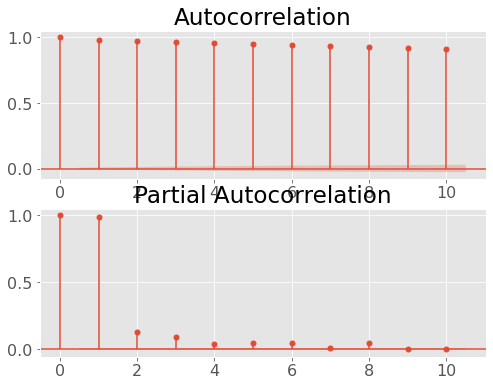

In [605]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
### b value
series = df_train_enc_b_val.replace(np.inf, np.nan).dropna()
#plots
plt.figure()
lags = 10
#acf
axis = plt.subplot(2, 1, 1)
plot_acf(series, ax=axis, lags=lags)
#pacf
axis = plt.subplot(2, 1, 2)
plot_pacf(series, ax=axis, lags=lags)
#showplot
plt.show()

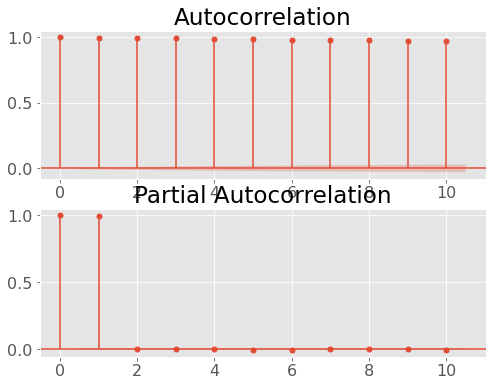

In [606]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
### Max mag
series = df_train_enc_mg_val.replace(np.inf, np.nan).dropna()
#plots
plt.figure()
lags = 10
#acf
axis = plt.subplot(2, 1, 1)
plot_acf(series, ax=axis, lags=lags)
#pacf
axis = plt.subplot(2, 1, 2)
plot_pacf(series, ax=axis, lags=lags)
#showplot
plt.show()

In [23]:
from pmdarima import auto_arima